In [1]:
import pandas as pd
import numpy as np
import re
from IPython.display import display
pd.options.display.max_colwidth=100
pd.options.display.float_format="{:.2f}".format
pd.set_option("display.max_columns", None)
import warnings
warnings.simplefilter('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as pl
%pip install chart_studio
import chart_studio.plotly as py
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
sns.set_theme(style='darkgrid')
import tensorflow as tf
np.set_printoptions(precision=3, suppress=True)
from sklearn import datasets
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import auc,roc_curve,classification_report,confusion_matrix,mean_absolute_error,mean_squared_error,root_mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import string
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
%matplotlib inline

Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


In [2]:
# Load the datasets

# ============================================================
# DATA PATH CONFIGURATION - UPDATE THIS FOR YOUR ENVIRONMENT
# ============================================================
# For Google Colab: DATA_PATH = '/content/drive/MyDrive/'
# For local:        DATA_PATH = '/path/to/your/data/'
DATA_PATH = '/Users/amandachung/Downloads/'  # <-- CHANGE THIS

intakes_df = pd.read_csv(DATA_PATH + 'Austin_Animal_Center_Intakes.csv')
outcomes_df = pd.read_csv(DATA_PATH + 'Austin_Animal_Center_Outcomes.csv')

print("Intakes DataFrame:")
print(intakes_df.head())
print("\nOutcomes DataFrame:")
print(outcomes_df.head())

Intakes DataFrame:
  Animal ID    Name                DateTime     MonthYear  \
0   A521520    Nina  10/01/2013 07:51:00 AM  October 2013   
1   A664235     NaN  10/01/2013 08:33:00 AM  October 2013   
2   A664236     NaN  10/01/2013 08:33:00 AM  October 2013   
3   A664237     NaN  10/01/2013 08:33:00 AM  October 2013   
4   A664233  Stevie  10/01/2013 08:53:00 AM  October 2013   

                   Found Location Intake Type Intake Condition Animal Type  \
0         Norht Ec in Austin (TX)       Stray           Normal         Dog   
1             Abia in Austin (TX)       Stray           Normal         Cat   
2             Abia in Austin (TX)       Stray           Normal         Cat   
3             Abia in Austin (TX)       Stray           Normal         Cat   
4  7405 Springtime in Austin (TX)       Stray          Injured         Dog   

  Sex upon Intake Age upon Intake                         Breed         Color  
0   Spayed Female         7 years  Border Terrier/Border Collie  

In [3]:
print("Unique values for columns in intakes_df:")
for col in intakes_df.columns:
    print(f"Unique values for column: {col}")
    unique_values = intakes_df[col].unique()
    if len(unique_values) > 50:
        print(unique_values[:50])
        print(f"... and {len(unique_values) - 50} more unique values.")
    else:
        print(unique_values)
    print("-" * 50)

print("\nUnique values for columns in outcomes_df:")
for col in outcomes_df.columns:
    print(f"Unique values for column: {col}")
    unique_values = outcomes_df[col].unique()
    if len(unique_values) > 50:
        print(unique_values[:50])
        print(f"... and {len(unique_values) - 50} more unique values.")
    else:
        print(unique_values)
    print("-" * 50)

Unique values for columns in intakes_df:
Unique values for column: Animal ID
['A521520' 'A664235' 'A664236' 'A664237' 'A664233' 'A664238' 'A664234'
 'A664256' 'A664257' 'A664266' 'A664258' 'A648744' 'A664260' 'A664261'
 'A651630' 'A664259' 'A664269' 'A664262' 'A664263' 'A664264' 'A664265'
 'A664267' 'A664268' 'A664271' 'A664272' 'A664273' 'A639030' 'A664253'
 'A664274' 'A658012' 'A636021' 'A664275' 'A664277' 'A664280' 'A660220'
 'A634503' 'A664281' 'A664282' 'A664283' 'A664284' 'A664285' 'A664286'
 'A664287' 'A664288' 'A659642' 'A664289' 'A664292' 'A664293' 'A664294'
 'A664295']
... and 156237 more unique values.
--------------------------------------------------
Unique values for column: Name
['Nina' nan 'Stevie' '*Donnie' 'Pippin' 'Sylvio' 'Claire' 'Heather'
 '*Petunia' '*Bismark' '*Mason' '*Dixon' '*Asti' '*Kochka' '*Grace'
 'Buffy' 'Cate' 'Moose' 'Estrella' 'Lucio' 'Sera' 'Mcdermot' '*Pogo'
 'Coco' 'Jade' 'Otter' 'Juliet' 'Sugar' 'Daisy' '*Trevor' '*Romeo'
 '*Juliet' '*Paris' '*Mer

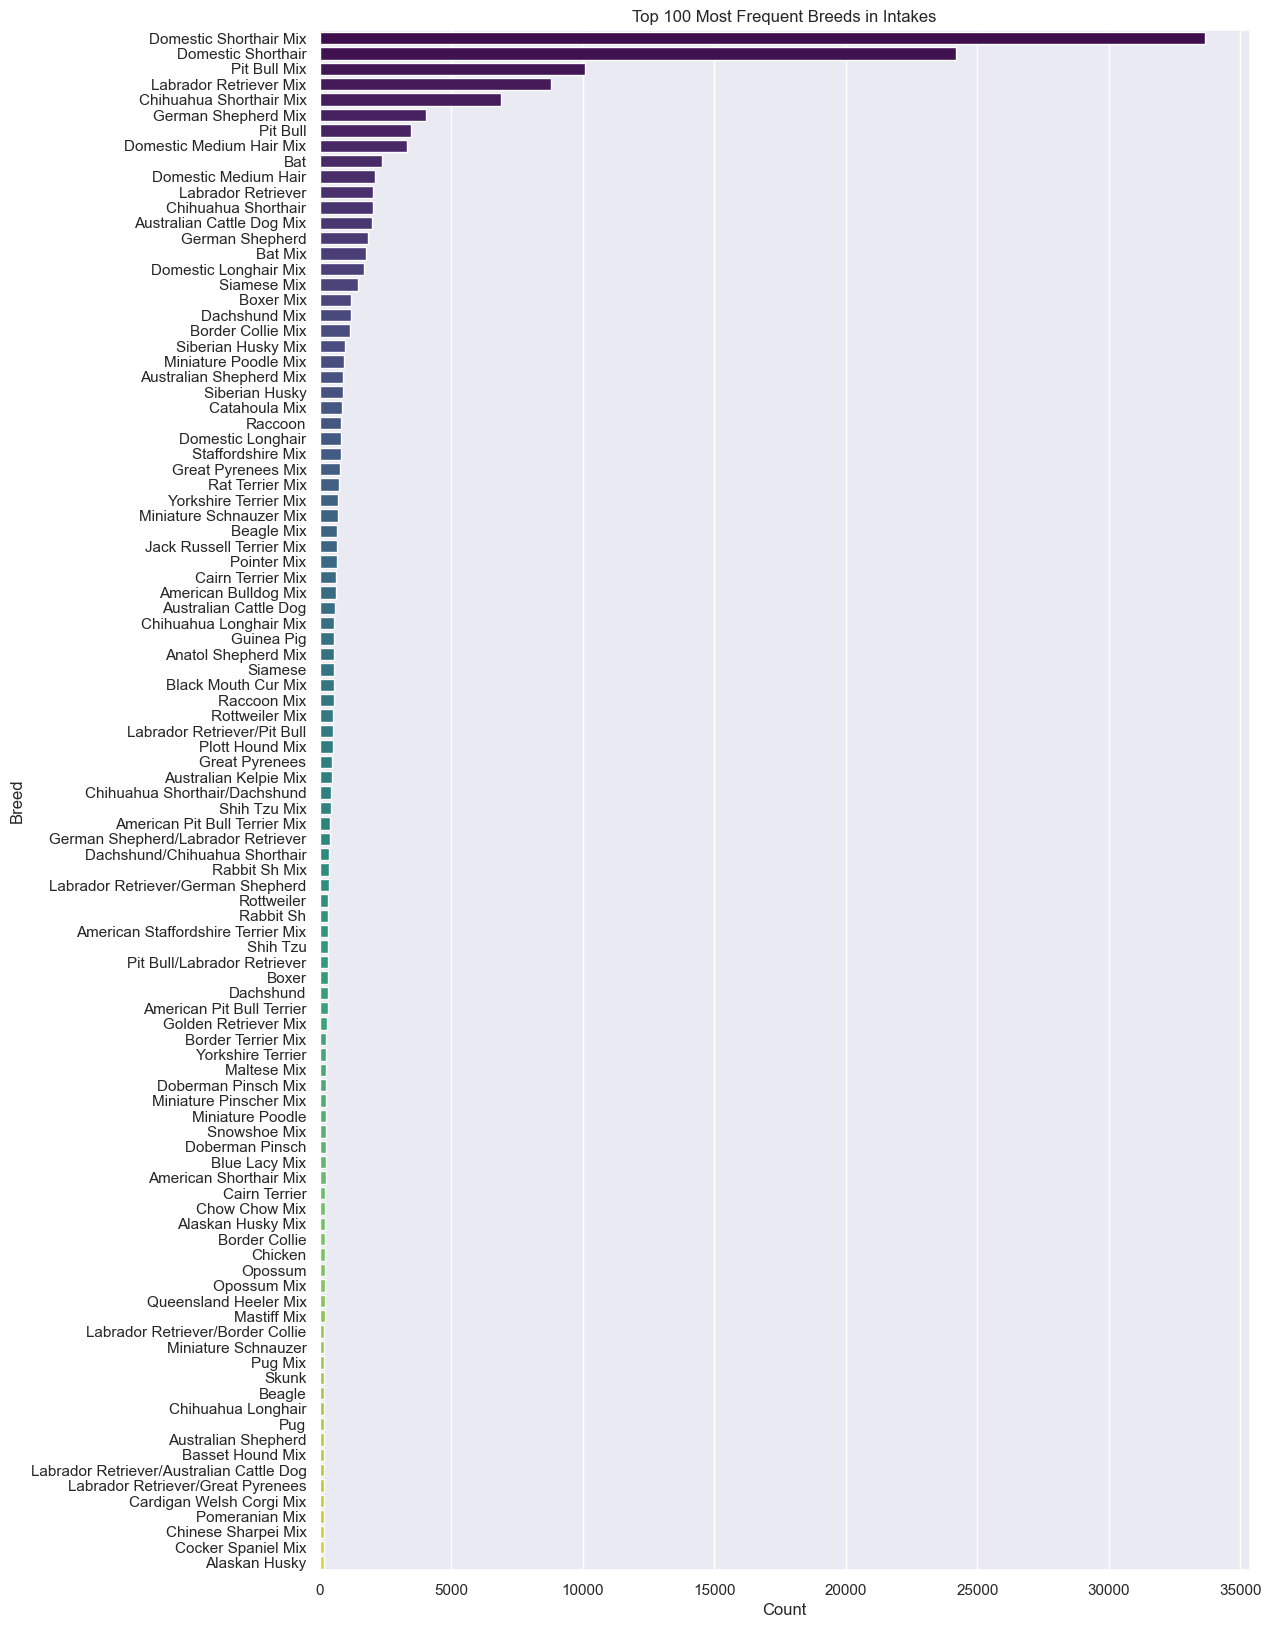

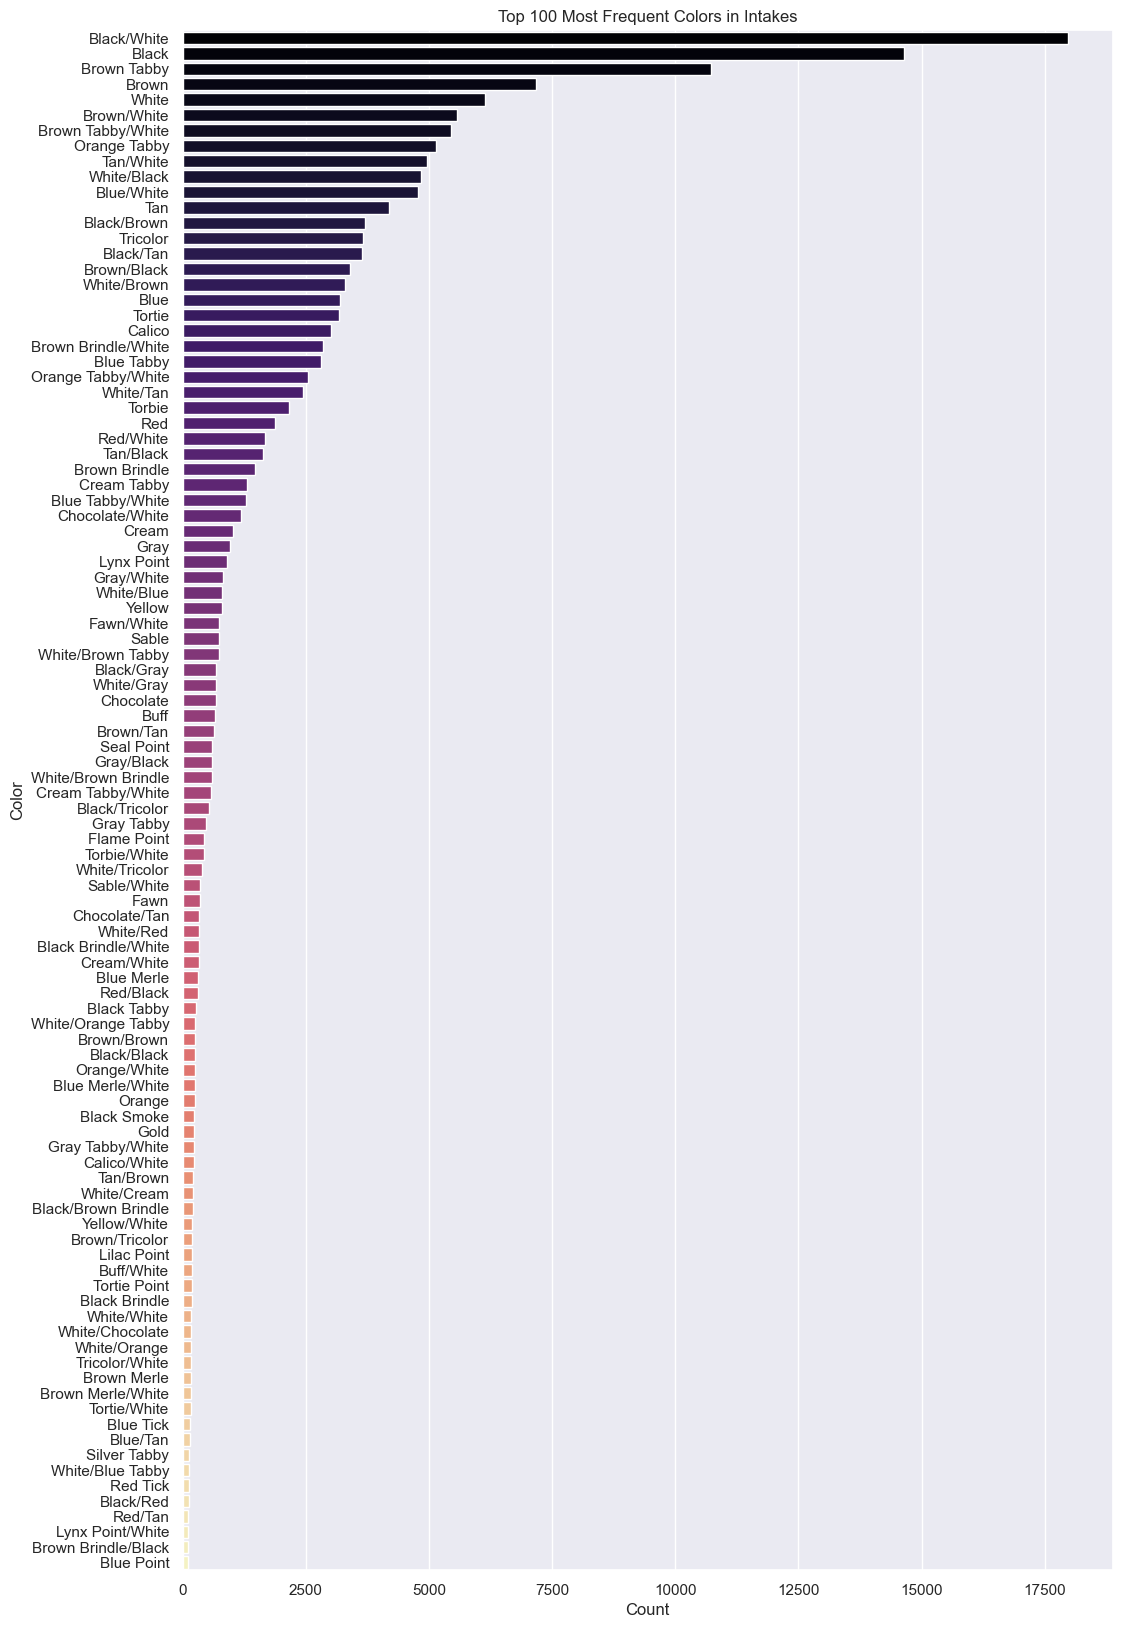

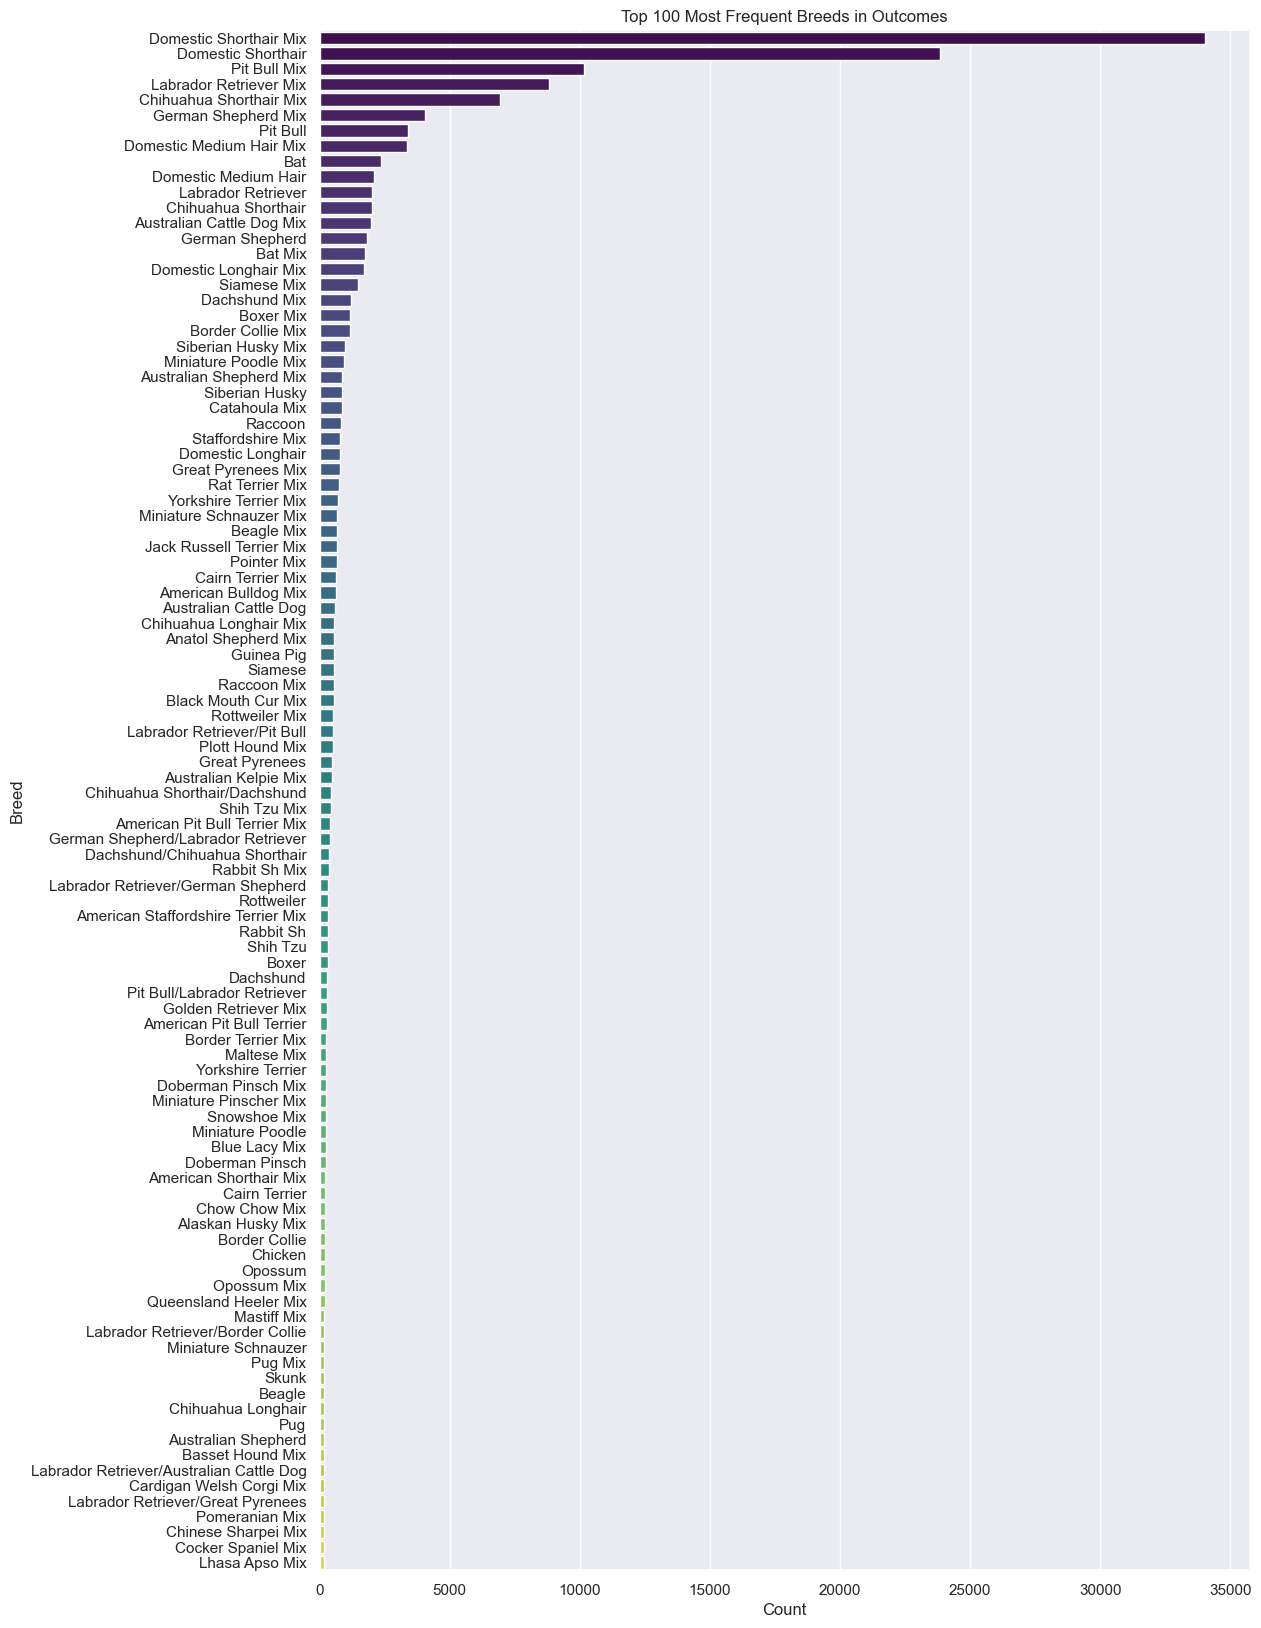

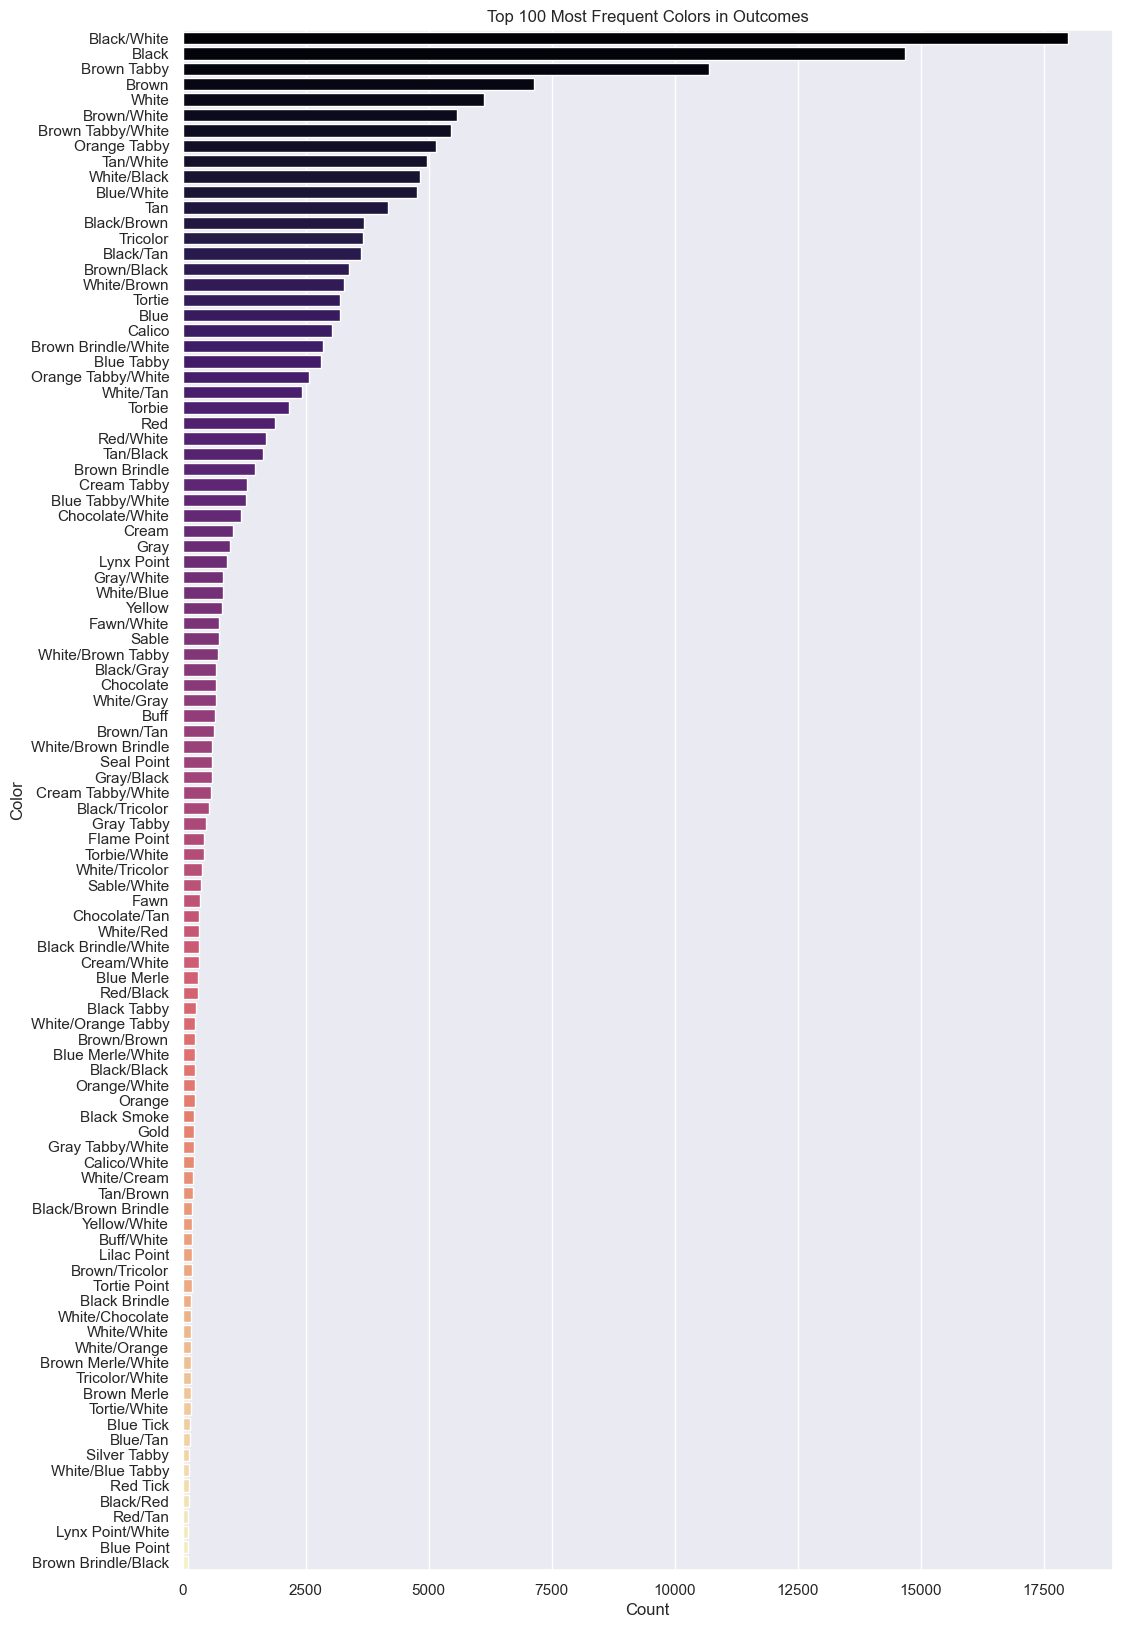

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the top 100 most frequent breeds in intakes_df and sort them
top_intake_breeds = intakes_df['Breed'].value_counts().nlargest(100).index
# Plot the count of top breeds in intakes_df with flipped axes
plt.figure(figsize=(12, 20)) # Adjust figure size for better readability with more bars
sns.countplot(data=intakes_df, y='Breed', order=top_intake_breeds, palette='viridis')
plt.title('Top 100 Most Frequent Breeds in Intakes')
plt.xlabel('Count')
plt.ylabel('Breed')
plt.show()

# Get the top 100 most frequent colors in intakes_df and sort them
top_intake_colors = intakes_df['Color'].value_counts().nlargest(100).index
# Plot the count of top colors in intakes_df with flipped axes
plt.figure(figsize=(12, 20)) # Adjust figure size
sns.countplot(data=intakes_df, y='Color', order=top_intake_colors, palette='magma')
plt.title('Top 100 Most Frequent Colors in Intakes')
plt.xlabel('Count')
plt.ylabel('Color')
plt.show()

# Get the top 100 most frequent breeds in outcomes_df and sort them
top_outcome_breeds = outcomes_df['Breed'].value_counts().nlargest(100).index
# Plot the count of top breeds in outcomes_df with flipped axes
plt.figure(figsize=(12, 20)) # Adjust figure size
sns.countplot(data=outcomes_df, y='Breed', order=top_outcome_breeds, palette='viridis')
plt.title('Top 100 Most Frequent Breeds in Outcomes')
plt.xlabel('Count')
plt.ylabel('Breed')
plt.show()

# Get the top 100 most frequent colors in outcomes_df and sort them
top_outcome_colors = outcomes_df['Color'].value_counts().nlargest(100).index
# Plot the count of top colors in outcomes_df with flipped axes
plt.figure(figsize=(12, 20)) # Adjust figure size
sns.countplot(data=outcomes_df, y='Color', order=top_outcome_colors, palette='magma')
plt.title('Top 100 Most Frequent Colors in Outcomes')
plt.xlabel('Count')
plt.ylabel('Color')
plt.show()

# Handling Duplicates

In [5]:
# Number of duplicate rows in intakes_df
num_duplicates_intakes = intakes_df.duplicated().sum()
print(f"Number of duplicate rows in intakes_df: {num_duplicates_intakes}")

# Number of duplicate rows in outcomes_df
num_duplicates_outcomes = outcomes_df.duplicated().sum()
print(f"Number of duplicate rows in outcomes_df: {num_duplicates_outcomes}")

Number of duplicate rows in intakes_df: 36
Number of duplicate rows in outcomes_df: 26


In [6]:
# Drop exact duplicate rows from intakes_df
intakes_df = intakes_df.drop_duplicates()
print(f"Number of rows in intakes_df after dropping duplicates: {len(intakes_df)}")

# Drop exact duplicate rows from outcomes_df
outcomes_df = outcomes_df.drop_duplicates()
print(f"Number of rows in outcomes_df after dropping duplicates: {len(outcomes_df)}")

Number of rows in intakes_df after dropping duplicates: 173776


Number of rows in outcomes_df after dropping duplicates: 173749


In [7]:
# Count the occurrences of each 'Animal ID' in dfs
intake_id_counts = intakes_df['Animal ID'].value_counts()
outcome_id_counts = outcomes_df['Animal ID'].value_counts()

# Filter for IDs that appear more than once
duplicate_intake_ids = intake_id_counts[intake_id_counts > 1]
duplicate_outcome_ids = outcome_id_counts[outcome_id_counts > 1]

print("Number of duplicate 'Animal ID's in intakes_df:")
print(len(duplicate_intake_ids))

print("\n'Animal ID's with multiple intakes:")
print(duplicate_intake_ids.head())

print("Number of duplicate 'Animal ID's in outcomes_df:")
print(len(duplicate_outcome_ids))

print("\n'Animal ID's with multiple outcomes:")
print(duplicate_outcome_ids.head())

Number of duplicate 'Animal ID's in intakes_df:
13461

'Animal ID's with multiple intakes:
Animal ID
A721033    33
A718223    14
A718877    12
A705625    12
A706536    11
Name: count, dtype: int64
Number of duplicate 'Animal ID's in outcomes_df:
13486

'Animal ID's with multiple outcomes:
Animal ID
A721033    33
A718223    14
A718877    12
A706536    11
A705625    11
Name: count, dtype: int64


Shows inconsistency in Intake and Outake Data:

In [8]:
# Count entries for each Animal ID in intakes_df
intake_counts = intakes_df['Animal ID'].value_counts().reset_index()
intake_counts.columns = ['Animal ID', 'Intake_Count']

# Count entries for each Animal ID in outcomes_df
outcome_counts = outcomes_df['Animal ID'].value_counts().reset_index()
outcome_counts.columns = ['Animal ID', 'Outcome_Count']

# Merge the counts
merged_counts = pd.merge(intake_counts, outcome_counts, on='Animal ID', how='outer').fillna(0)

# Convert counts to integer type
merged_counts['Intake_Count'] = merged_counts['Intake_Count'].astype(int)
merged_counts['Outcome_Count'] = merged_counts['Outcome_Count'].astype(int)


# Filter for Animal IDs where the counts do not match
mismatched_counts = merged_counts[merged_counts['Intake_Count'] != merged_counts['Outcome_Count']]

print("Animal IDs with mismatched intake and outcome entry counts:")
display(mismatched_counts)

print(f"\nNumber of Animal IDs with mismatched counts: {len(mismatched_counts)}")

Animal IDs with mismatched intake and outcome entry counts:


,Animal ID,Intake_Count,Outcome_Count
48,A275975,0,1
125,A335950,0,1
179,A362137,0,1
437,A465501,0,1
512,A483240,1,2
...,...,...,...
157095,A929709,1,0
157097,A929711,1,0
157098,A929717,1,0
157099,A929724,1,0



Number of Animal IDs with mismatched counts: 1907


Example of animal that has multiple Intakes and Outakes.

In [9]:
# Filter intakes_df for Animal ID 'A721033'
intakes_A721033 = intakes_df[intakes_df['Animal ID'] == 'A721033']

print("Entries for Animal ID A721033 in intakes_df:")
display(intakes_A721033)

# Filter outcomes_df for Animal ID 'A721033'
outcomes_A721033 = outcomes_df[outcomes_df['Animal ID'] == 'A721033']

print("\nEntries for Animal ID A721033 in outcomes_df:")
display(outcomes_A721033)

Entries for Animal ID A721033 in intakes_df:


,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
43498,A721033,Lil Bit,02/20/2016 10:44:00 AM,February 2016,2508 E Riverside Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,9 months,Rat Terrier Mix,Tricolor/Brown Brindle
51001,A721033,Lil Bit,07/10/2016 11:53:00 AM,July 2016,6317 E Ben White Blvd in Austin (TX),Stray,Normal,Dog,Neutered Male,1 year,Rat Terrier Mix,Tricolor/Brown Brindle
53835,A721033,Lil Bit,09/03/2016 02:30:00 PM,September 2016,6010 E Riverside in Austin (TX),Public Assist,Normal,Dog,Neutered Male,1 year,Rat Terrier Mix,Tricolor/Brown Brindle
56121,A721033,Lil Bit,10/20/2016 10:47:00 PM,October 2016,6200 E. Ben White Blvd in Austin (TX),Public Assist,Normal,Dog,Neutered Male,1 year,Rat Terrier Mix,Tricolor/Brown Brindle
58575,A721033,Lil Bit,12/15/2016 10:07:00 AM,December 2016,S Pleasant Valley Rd And E Riverside Dr in Austin (TX),Public Assist,Normal,Dog,Neutered Male,1 year,Rat Terrier Mix,Tricolor/Brown Brindle
59568,A721033,Lil Bit,01/09/2017 02:26:00 PM,January 2017,6210 E Ben White Blvd in Austin (TX),Stray,Injured,Dog,Neutered Male,1 year,Rat Terrier Mix,Tricolor/Brown Brindle
60211,A721033,Lil Bit,01/26/2017 06:55:00 AM,January 2017,901 W Ben White Blvd in Austin (TX),Public Assist,Normal,Dog,Neutered Male,1 year,Rat Terrier Mix,Tricolor/Brown Brindle
60407,A721033,Lil Bit,01/30/2017 11:05:00 PM,January 2017,6210 E Ben White in Austin (TX),Public Assist,Normal,Dog,Neutered Male,1 year,Rat Terrier Mix,Tricolor/Brown Brindle
60647,A721033,Lil Bit,02/06/2017 10:13:00 AM,February 2017,6210 E Ben White in Austin (TX),Public Assist,Normal,Dog,Neutered Male,1 year,Rat Terrier Mix,Tricolor/Brown Brindle
62261,A721033,Lil Bit,03/15/2017 09:24:00 AM,March 2017,E Ben White Blvd & Montopolis Dr in Austin (TX),Public Assist,Normal,Dog,Neutered Male,1 year,Rat Terrier Mix,Tricolor/Brown Brindle



Entries for Animal ID A721033 in outcomes_df:


,Animal ID,Date of Birth,Name,DateTime,MonthYear,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
45568,A721033,2015-05-20,Lil Bit,2016-02-20T16:18:00,02-2016,Return to Owner,NaN,Dog,Neutered Male,9 months,Rat Terrier Mix,Tricolor/Brown Brindle
52371,A721033,2015-05-20,Lil Bit,2016-07-11T17:44:00,07-2016,Return to Owner,NaN,Dog,Neutered Male,1 year,Rat Terrier Mix,Tricolor/Brown Brindle
55434,A721033,2015-05-20,Lil Bit,2016-09-12T13:40:00,09-2016,Return to Owner,NaN,Dog,Neutered Male,1 year,Rat Terrier Mix,Tricolor/Brown Brindle
57306,A721033,2015-05-20,Lil Bit,2016-10-21T18:55:00,10-2016,Return to Owner,NaN,Dog,Neutered Male,1 year,Rat Terrier Mix,Tricolor/Brown Brindle
59742,A721033,2015-05-20,Lil Bit,2016-12-16T11:32:00,12-2016,Return to Owner,NaN,Dog,Neutered Male,1 year,Rat Terrier Mix,Tricolor/Brown Brindle
60834,A721033,2015-05-20,Lil Bit,2017-01-10T16:20:00,01-2017,Return to Owner,NaN,Dog,Neutered Male,1 year,Rat Terrier Mix,Tricolor/Brown Brindle
61554,A721033,2015-05-20,Lil Bit,2017-01-28T15:22:00,01-2017,Return to Owner,NaN,Dog,Neutered Male,1 year,Rat Terrier Mix,Tricolor/Brown Brindle
61789,A721033,2015-05-20,Lil Bit,2017-02-02T11:19:00,02-2017,Return to Owner,NaN,Dog,Neutered Male,1 year,Rat Terrier Mix,Tricolor/Brown Brindle
62014,A721033,2015-05-20,Lil Bit,2017-02-07T17:26:00,02-2017,Return to Owner,NaN,Dog,Neutered Male,1 year,Rat Terrier Mix,Tricolor/Brown Brindle
63623,A721033,2015-05-20,Lil Bit,2017-03-16T12:50:00,03-2017,Return to Owner,NaN,Dog,Neutered Male,1 year,Rat Terrier Mix,Tricolor/Brown Brindle


Example of animal that shows up in Outcomes but not Intakes.

In [10]:
# Filter intakes_df for Animal ID 'A721033'
intakes_A275975 = intakes_df[intakes_df['Animal ID'] == 'A275975']

print("Entries for Animal ID A275975 in intakes_df:")
display(intakes_A275975)

# Filter outcomes_df for Animal ID 'A275975'
outcomes_A275975 = outcomes_df[outcomes_df['Animal ID'] == 'A275975']

print("\nEntries for Animal ID A275975 in outcomes_df:")
display(outcomes_A275975)

Entries for Animal ID A275975 in intakes_df:


,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color



Entries for Animal ID A275975 in outcomes_df:


,Animal ID,Date of Birth,Name,DateTime,MonthYear,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
2951,A275975,2002-03-12,Squeakers,2013-10-12T11:27:00,10-2013,Adoption,NaN,Cat,Spayed Female,11 years,Domestic Shorthair Mix,Black


Drop the entries from the outcomes data that did not have a corresponding intake record:

In [11]:
# Get the list of Animal IDs present in intakes_df
intake_animal_ids = intakes_df['Animal ID'].unique()

# Filter outcomes_df to keep only rows where 'Animal ID' is in intake_animal_ids
outcomes_df_filtered = outcomes_df[outcomes_df['Animal ID'].isin(intake_animal_ids)].copy()

print(f"Number of rows in outcomes_df before filtering: {len(outcomes_df)}")
print(f"Number of rows in outcomes_df after filtering: {len(outcomes_df_filtered)}")

print("\nFirst 5 rows of filtered outcomes_df:")
display(outcomes_df_filtered.head())

Number of rows in outcomes_df before filtering: 173749
Number of rows in outcomes_df after filtering: 172935

First 5 rows of filtered outcomes_df:


,Animal ID,Date of Birth,Name,DateTime,MonthYear,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A668305,2012-12-01,NaN,2013-12-02T00:00:00-05:00,12-2013,Transfer,Partner,Other,Unknown,1 year,Turtle Mix,Brown/Yellow
1,A673335,2012-02-22,NaN,2014-02-22T00:00:00-05:00,02-2014,Euthanasia,Suffering,Other,Unknown,2 years,Raccoon,Black/Gray
2,A675999,2013-04-03,NaN,2014-04-07T00:00:00-05:00,04-2014,Transfer,Partner,Other,Unknown,1 year,Turtle Mix,Green
3,A679066,2014-04-16,NaN,2014-05-16T00:00:00-05:00,05-2014,NaN,NaN,Other,Unknown,4 weeks,Rabbit Sh,Brown
4,A680855,2014-05-25,NaN,2014-06-10T00:00:00-05:00,06-2014,Transfer,Partner,Bird,Unknown,2 weeks,Duck,Yellow/Black


Example of animal that has more outcomes than intakes.

In [12]:
# Filter intakes_df for Animal ID 'A483240'
intakes_A483240 = intakes_df[intakes_df['Animal ID'] == 'A483240']

print("Entries for Animal ID A483240 in intakes_df:")
display(intakes_A483240)

# Filter outcomes_df for Animal ID 'A483240'
outcomes_A483240 = outcomes_df[outcomes_df['Animal ID'] == 'A483240']

print("\nEntries for Animal ID A483240 in outcomes_df:")
display(outcomes_A483240)

Entries for Animal ID A483240 in intakes_df:


,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
2892,A483240,Frassina,11/30/2013 02:30:00 PM,November 2013,Outside Jurisdiction,Owner Surrender,Normal,Cat,Spayed Female,6 years,Domestic Longhair/Persian,Blue Cream



Entries for Animal ID A483240 in outcomes_df:


,Animal ID,Date of Birth,Name,DateTime,MonthYear,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
4745,A483240,2007-06-17,Frassina,2013-11-16T15:58:00,11-2013,Adoption,NaN,Cat,Spayed Female,6 years,Domestic Longhair/Persian,Blue Cream
5511,A483240,2007-06-17,Frassina,2013-12-04T13:33:00,12-2013,Adoption,Foster,Cat,Spayed Female,6 years,Domestic Longhair/Persian,Blue Cream


# Reconciliation
Create episodes for each animal by pairing consecutive intake and outcome records from `intakes_df` and `outcomes_df_filtered`, handling potential mismatches, and store the results in a new structure.

Ensure the 'DateTime' columns in both `intakes_df` and `outcomes_df_filtered` are in datetime format and sort the dataframes by 'Animal ID' and 'DateTime'.


In [13]:
intakes_df['DateTime'] = pd.to_datetime(intakes_df['DateTime'])
outcomes_df_filtered['DateTime'] = pd.to_datetime(outcomes_df_filtered['DateTime'], format='mixed', utc=True).dt.tz_convert(None)

intakes_df = intakes_df.sort_values(by=['Animal ID', 'DateTime'])
outcomes_df_filtered = outcomes_df_filtered.sort_values(by=['Animal ID', 'DateTime'])

print("Intakes DataFrame after sorting:")
display(intakes_df.head())
print("\nOutcomes DataFrame after sorting:")
display(outcomes_df_filtered.head())

Intakes DataFrame after sorting:


,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
6926,A006100,Scamp,2014-03-07 14:26:00,March 2014,8700 Research in Austin (TX),Public Assist,Normal,Dog,Neutered Male,6 years,Spinone Italiano Mix,Yellow/White
22374,A006100,Scamp,2014-12-19 10:21:00,December 2014,8700 Research Blvd in Austin (TX),Public Assist,Normal,Dog,Neutered Male,7 years,Spinone Italiano Mix,Yellow/White
75925,A006100,Scamp,2017-12-07 14:07:00,December 2017,Colony Creek And Hunters Trace in Austin (TX),Stray,Normal,Dog,Neutered Male,10 years,Spinone Italiano Mix,Yellow/White
8236,A047759,Oreo,2014-04-02 15:55:00,April 2014,Austin (TX),Owner Surrender,Normal,Dog,Neutered Male,10 years,Dachshund,Tricolor
2309,A134067,Bandit,2013-11-16 09:02:00,November 2013,12034 Research Blvd in Austin (TX),Public Assist,Injured,Dog,Neutered Male,16 years,Shetland Sheepdog,Brown/White



Outcomes DataFrame after sorting:


,Animal ID,Date of Birth,Name,DateTime,MonthYear,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
9637,A006100,2007-07-09,Scamp,2014-03-08 17:10:00,03-2014,Return to Owner,NaN,Dog,Neutered Male,6 years,Spinone Italiano Mix,Yellow/White
25064,A006100,2007-07-09,Scamp,2014-12-20 16:35:00,12-2014,Return to Owner,NaN,Dog,Neutered Male,7 years,Spinone Italiano Mix,Yellow/White
1891,A006100,2007-07-09,Scamp,2017-12-07 05:00:00,12-2017,Return to Owner,NaN,Dog,Neutered Male,10 years,Spinone Italiano Mix,Yellow/White
11094,A047759,2004-04-02,Oreo,2014-04-07 15:12:00,04-2014,Transfer,Partner,Dog,Neutered Male,10 years,Dachshund,Tricolor
4709,A134067,1997-10-16,Bandit,2013-11-16 11:54:00,11-2013,Return to Owner,NaN,Dog,Neutered Male,16 years,Shetland Sheepdog,Brown/White


## Visit creation

Iterate through each animal's records, pairing consecutive intake and outcome records as visits. Handle cases with mismatched numbers of intakes and outcomes.


In [14]:
# Group the dataframes by 'Animal ID' and initialize an empty list to store visits
grouped_intakes = intakes_df.groupby('Animal ID')
grouped_outcomes = outcomes_df_filtered.groupby('Animal ID')

visits = []
unmatched_intakes = []
unmatched_outcomes = []

In [15]:
# Iterate through each animal ID and pair consecutive intake and outcome records to create visits, handling unmatched records
for animal_id, intake_group in grouped_intakes:
    intake_records = intake_group.to_dict('records')
    outcome_records = grouped_outcomes.get_group(animal_id).to_dict('records') if animal_id in grouped_outcomes.groups else []

    used_outcomes_indices = set()

    for intake in intake_records:
        matched_outcome = None
        for i, outcome in enumerate(outcome_records):
            if i not in used_outcomes_indices and outcome['DateTime'] >= intake['DateTime']:
                matched_outcome = outcome
                used_outcomes_indices.add(i)
                break

        if matched_outcome:
            visit = {
                'Animal ID': animal_id,
                'Intake': intake,
                'Outcome': matched_outcome
            }
            visits.append(visit)
        else:
            unmatched_intakes.append(intake)

    for i, outcome in enumerate(outcome_records):
        if i not in used_outcomes_indices:
            unmatched_outcomes.append(outcome)

print(f"Number of visits created: {len(visits)}")
print(f"Number of unmatched intakes: {len(unmatched_intakes)}")
print(f"Number of unmatched outcomes: {len(unmatched_outcomes)}")

Number of visits created: 172171
Number of unmatched intakes: 1605
Number of unmatched outcomes: 764


### Store visits

Store the created visits in a new structure


In [16]:
# Create a list of dictionaries from the episodes and calculate the duration of stay, then convert it to a dataframe

visit_list = []

for visit in visits:
    intake_details = visit['Intake']
    outcome_details = visit['Outcome']

    # Extract relevant information from intake and outcome records
    visit_data = {
        'Animal ID': visit['Animal ID'],
        'Intake_DateTime': intake_details['DateTime'],
        'Intake_Type': intake_details['Intake Type'],
        'Intake_Condition': intake_details['Intake Condition'],
        'Intake_Animal_Type': intake_details['Animal Type'],
        'Intake_Sex': intake_details['Sex upon Intake'],
        'Intake_Age': intake_details['Age upon Intake'],
        'Intake_Breed': intake_details['Breed'],
        'Intake_Color': intake_details['Color'],
        'Outcome_DateTime': outcome_details['DateTime'] if outcome_details else None,
        'Outcome_Type': outcome_details['Outcome Type'] if outcome_details else None,
        'Outcome_Subtype': outcome_details['Outcome Subtype'] if outcome_details else None,
        'Outcome_Animal_Type': outcome_details['Animal Type'] if outcome_details else None,
        'Outcome_Sex': outcome_details['Sex upon Outcome'] if outcome_details else None,
        'Outcome_Age': outcome_details['Age upon Outcome'] if outcome_details else None,
        'Outcome_Breed': outcome_details['Breed'] if outcome_details else None,
        'Outcome_Color': outcome_details['Color'] if outcome_details else None,
    }

    # Calculate duration of stay
    if visit_data['Outcome_DateTime'] is not None:
        visit_data['duration_of_stay'] = (visit_data['Outcome_DateTime'] - visit_data['Intake_DateTime']).total_seconds() / (24 * 3600) # Duration in days
    else:
        visit_data['duration_of_stay'] = None

    visit_list.append(visit_data)

# Convert the list of dictionaries to a DataFrame
visits_df = pd.DataFrame(visit_list)

# Display the first few rows and information of the new DataFrame
print("Visits DataFrame:")
display(visits_df.head())
print("\nVisits DataFrame Info:")
visits_df.info()

Visits DataFrame:


,Animal ID,Intake_DateTime,Intake_Type,Intake_Condition,Intake_Animal_Type,Intake_Sex,Intake_Age,Intake_Breed,Intake_Color,Outcome_DateTime,Outcome_Type,Outcome_Subtype,Outcome_Animal_Type,Outcome_Sex,Outcome_Age,Outcome_Breed,Outcome_Color,duration_of_stay
0,A006100,2014-03-07 14:26:00,Public Assist,Normal,Dog,Neutered Male,6 years,Spinone Italiano Mix,Yellow/White,2014-03-08 17:10:00,Return to Owner,NaN,Dog,Neutered Male,6 years,Spinone Italiano Mix,Yellow/White,1.11
1,A006100,2014-12-19 10:21:00,Public Assist,Normal,Dog,Neutered Male,7 years,Spinone Italiano Mix,Yellow/White,2014-12-20 16:35:00,Return to Owner,NaN,Dog,Neutered Male,7 years,Spinone Italiano Mix,Yellow/White,1.26
2,A047759,2014-04-02 15:55:00,Owner Surrender,Normal,Dog,Neutered Male,10 years,Dachshund,Tricolor,2014-04-07 15:12:00,Transfer,Partner,Dog,Neutered Male,10 years,Dachshund,Tricolor,4.97
3,A134067,2013-11-16 09:02:00,Public Assist,Injured,Dog,Neutered Male,16 years,Shetland Sheepdog,Brown/White,2013-11-16 11:54:00,Return to Owner,NaN,Dog,Neutered Male,16 years,Shetland Sheepdog,Brown/White,0.12
4,A141142,2013-11-16 14:46:00,Stray,Aged,Dog,Spayed Female,15 years,Labrador Retriever/Pit Bull,Black/White,2013-11-17 11:40:00,Return to Owner,NaN,Dog,Spayed Female,15 years,Labrador Retriever/Pit Bull,Black/White,0.87



Visits DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172171 entries, 0 to 172170
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Animal ID            172171 non-null  object        
 1   Intake_DateTime      172171 non-null  datetime64[ns]
 2   Intake_Type          172171 non-null  object        
 3   Intake_Condition     172171 non-null  object        
 4   Intake_Animal_Type   172171 non-null  object        
 5   Intake_Sex           172170 non-null  object        
 6   Intake_Age           172171 non-null  object        
 7   Intake_Breed         172171 non-null  object        
 8   Intake_Color         172171 non-null  object        
 9   Outcome_DateTime     172171 non-null  datetime64[ns]
 10  Outcome_Type         172129 non-null  object        
 11  Outcome_Subtype      78613 non-null   object        
 12  Outcome_Animal_Type  172171 non-null  object    

Example of animal that was supposed to have 3 episodes but only has 2 because the time for the last outcome was likely entered wrong.

In [17]:
# Filter the sorted intakes_df for Animal ID 'A006100'
intakes_A006100_sorted = intakes_df[intakes_df['Animal ID'] == 'A006100']

print("Entries for Animal ID A006100 in sorted intakes_df:")
display(intakes_A006100_sorted)

# Filter the sorted outcomes_df_filtered for Animal ID 'A006100'
outcomes_A006100_sorted = outcomes_df_filtered[outcomes_df_filtered['Animal ID'] == 'A006100']

print("\nEntries for Animal ID A006100 in sorted outcomes_df_filtered:")
display(outcomes_A006100_sorted)

Entries for Animal ID A006100 in sorted intakes_df:


,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
6926,A006100,Scamp,2014-03-07 14:26:00,March 2014,8700 Research in Austin (TX),Public Assist,Normal,Dog,Neutered Male,6 years,Spinone Italiano Mix,Yellow/White
22374,A006100,Scamp,2014-12-19 10:21:00,December 2014,8700 Research Blvd in Austin (TX),Public Assist,Normal,Dog,Neutered Male,7 years,Spinone Italiano Mix,Yellow/White
75925,A006100,Scamp,2017-12-07 14:07:00,December 2017,Colony Creek And Hunters Trace in Austin (TX),Stray,Normal,Dog,Neutered Male,10 years,Spinone Italiano Mix,Yellow/White



Entries for Animal ID A006100 in sorted outcomes_df_filtered:


,Animal ID,Date of Birth,Name,DateTime,MonthYear,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
9637,A006100,2007-07-09,Scamp,2014-03-08 17:10:00,03-2014,Return to Owner,NaN,Dog,Neutered Male,6 years,Spinone Italiano Mix,Yellow/White
25064,A006100,2007-07-09,Scamp,2014-12-20 16:35:00,12-2014,Return to Owner,NaN,Dog,Neutered Male,7 years,Spinone Italiano Mix,Yellow/White
1891,A006100,2007-07-09,Scamp,2017-12-07 05:00:00,12-2017,Return to Owner,NaN,Dog,Neutered Male,10 years,Spinone Italiano Mix,Yellow/White


### Identify remaining mismatches



In [18]:
# Create DataFrames from unmatched lists
unmatched_intakes_df = pd.DataFrame(unmatched_intakes)
unmatched_outcomes_df = pd.DataFrame(unmatched_outcomes)

# Display the number of records in each DataFrame
print(f"Number of unmatched intake records: {len(unmatched_intakes_df)}")
print(f"Number of unmatched outcome records: {len(unmatched_outcomes_df)}")

# Display the first 5 rows of each DataFrame
print("\nFirst 5 rows of unmatched intakes:")
display(unmatched_intakes_df.head())

print("\nFirst 5 rows of unmatched outcomes:")
display(unmatched_outcomes_df.head())

Number of unmatched intake records: 1605
Number of unmatched outcome records: 764

First 5 rows of unmatched intakes:


,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
0,A006100,Scamp,2017-12-07 14:07:00,December 2017,Colony Creek And Hunters Trace in Austin (TX),Stray,Normal,Dog,Neutered Male,10 years,Spinone Italiano Mix,Yellow/White
1,A531969,Black,2015-11-13 12:18:00,November 2015,Outside Jurisdiction,Owner Surrender,Normal,Dog,Neutered Male,7 years,Pit Bull Mix,Black/White
2,A533243,Choco,2017-02-24 11:52:00,February 2017,Riverside Dr And Montopolis Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,8 years,Labrador Retriever/Pit Bull,Chocolate
3,A554047,Mega,2016-07-05 18:48:00,July 2016,5205 Holmont Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,6 years,Pit Bull Mix,Brown/White
4,A587232,Rosie,2022-02-01 08:24:00,February 2022,Springdale Road And East 7Th Street in Austin (TX),Stray,Sick,Dog,Spayed Female,12 years,Chihuahua Shorthair Mix,Black/White



First 5 rows of unmatched outcomes:


,Animal ID,Date of Birth,Name,DateTime,MonthYear,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A006100,2007-07-09,Scamp,2017-12-07 05:00:00,12-2017,Return to Owner,NaN,Dog,Neutered Male,10 years,Spinone Italiano Mix,Yellow/White
1,A483240,2007-06-17,Frassina,2013-11-16 15:58:00,11-2013,Adoption,NaN,Cat,Spayed Female,6 years,Domestic Longhair/Persian,Blue Cream
2,A531739,2008-02-29,Bentley,2013-11-30 13:31:00,11-2013,Adoption,NaN,Dog,Neutered Male,5 years,Pointer Mix,White/Tan
3,A531969,2008-03-06,Black,2015-11-13 05:00:00,11-2015,Return to Owner,NaN,Dog,Neutered Male,7 years,Pit Bull Mix,Black/White
4,A533243,2008-07-15,Choco,2016-12-20 05:00:00,12-2016,Return to Owner,NaN,Dog,Neutered Male,8 years,Labrador Retriever/Pit Bull,Chocolate


In [19]:
# Find Animal IDs that exist in both unmatched_intakes_df and unmatched_outcomes_df
animal_ids_in_both_unmatched = pd.merge(unmatched_intakes_df['Animal ID'], unmatched_outcomes_df['Animal ID'], on='Animal ID', how='inner')['Animal ID'].unique()

print("Animal IDs that appear in both unmatched intakes and unmatched outcomes:")
print(animal_ids_in_both_unmatched)
print(f"\nNumber of Animal IDs in both unmatched dataframes: {len(animal_ids_in_both_unmatched)}")

Animal IDs that appear in both unmatched intakes and unmatched outcomes:
['A006100' 'A531969' 'A533243' 'A554047' 'A587232' 'A621011' 'A624094'
 'A647489' 'A657016' 'A659667' 'A665649' 'A672396' 'A672696' 'A673335'
 'A674638' 'A675125' 'A675480' 'A676345' 'A678461' 'A678823' 'A678824'
 'A679066' 'A679180' 'A679181' 'A679182' 'A679215' 'A679217' 'A679222'
 'A679230' 'A679305' 'A679357' 'A679361' 'A679408' 'A679940' 'A679980'
 'A680032' 'A680057' 'A680058' 'A680106' 'A680138' 'A680141' 'A680144'
 'A680319' 'A680504' 'A680744' 'A681049' 'A681851' 'A681854' 'A681856'
 'A681857' 'A681858' 'A681860' 'A681862' 'A681863' 'A681864' 'A683591'
 'A683693' 'A684858' 'A697081' 'A699447' 'A699599' 'A699601' 'A699767'
 'A699768' 'A699769' 'A699770' 'A699771' 'A699779' 'A699780' 'A699781'
 'A699782' 'A699783' 'A699790' 'A699791' 'A699792' 'A700792' 'A701542'
 'A702081' 'A702777' 'A702786' 'A703445' 'A705624' 'A705626' 'A705627'
 'A705628' 'A705629' 'A705630' 'A705631' 'A705632' 'A705633' 'A705636'
 'A7

In [20]:
# Take a sample of Animal IDs that appear in both unmatched lists
sample_animal_ids = np.random.choice(animal_ids_in_both_unmatched, size=10, replace=False)

print("Investigating sample Animal IDs with entries in both unmatched lists:")
for animal_id in sample_animal_ids:
    print(f"\n--- Entries for Animal ID: {animal_id} ---")

    # Display entries from the sorted intakes_df
    print("\nIntake entries:")
    display(intakes_df[intakes_df['Animal ID'] == animal_id])

    # Display entries from the sorted outcomes_df_filtered
    print("\nOutcome entries:")
    display(outcomes_df_filtered[outcomes_df_filtered['Animal ID'] == animal_id])

Investigating sample Animal IDs with entries in both unmatched lists:

--- Entries for Animal ID: A711724 ---

Intake entries:


,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
36256,A711724,NaN,2015-09-11 12:44:00,September 2015,1054 Springdale Rd in Austin (TX),Stray,Normal,Cat,Intact Male,2 weeks,Domestic Shorthair Mix,Brown Tabby



Outcome entries:


,Animal ID,Date of Birth,Name,DateTime,MonthYear,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
242,A711724,2015-08-28,NaN,2015-09-11 05:00:00,09-2015,Transfer,Partner,Cat,Intact Male,2 weeks,Domestic Shorthair Mix,Brown Tabby



--- Entries for Animal ID: A802017 ---

Intake entries:


,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
106158,A802017,NaN,2019-08-13 08:38:00,August 2019,6816 in Austin (TX),Stray,Injured,Cat,Intact Female,1 year,Domestic Shorthair,Black



Outcome entries:


,Animal ID,Date of Birth,Name,DateTime,MonthYear,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
100138,A802017,2018-02-13,NaN,2019-08-13 05:00:00,08-2019,Died,At Vet,Cat,Intact Female,1 year,Domestic Shorthair,Black



--- Entries for Animal ID: A751908 ---

Intake entries:


,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
67300,A751908,NaN,2017-06-15 12:40:00,June 2017,E William Cannon Dr And S Pleasant Valley Rd in Austin (TX),Stray,Normal,Other,Intact Male,1 year,Lop-Amer Fuzzy Mix,White/Brown



Outcome entries:


,Animal ID,Date of Birth,Name,DateTime,MonthYear,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
1595,A751908,2016-06-15,NaN,2017-06-15 05:00:00,06-2017,Died,In Kennel,Other,Intact Male,1 year,Lop-Amer Fuzzy Mix,White/Brown



--- Entries for Animal ID: A772143 ---

Intake entries:


,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
82395,A772143,Lila,2018-05-15 11:06:00,May 2018,Del Valle (TX),Owner Surrender,Normal,Dog,Intact Female,8 months,Chihuahua Shorthair Mix,White/Brown



Outcome entries:


,Animal ID,Date of Birth,Name,DateTime,MonthYear,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
82770,A772143,2017-08-15,Lila,2018-05-15,05-2018,Transfer,Partner,Dog,Intact Female,8 months,Chihuahua Shorthair Mix,White/Brown



--- Entries for Animal ID: A815755 ---

Intake entries:


,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
116691,A815755,NaN,2020-03-24 21:11:00,March 2020,1600 Toomey Rd in Austin (TX),Wildlife,Normal,Other,Unknown,1 year,Bat,Brown



Outcome entries:


,Animal ID,Date of Birth,Name,DateTime,MonthYear,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
117835,A815755,2019-03-24,NaN,2020-03-24 09:49:00,03-2020,Disposal,NaN,Other,Unknown,1 year,Bat,Brown



--- Entries for Animal ID: A771770 ---

Intake entries:


,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
82129,A771770,NaN,2018-05-09 21:20:00,May 2018,5401 Loadstone Cv in Austin (TX),Stray,Injured,Cat,Unknown,3 months,Domestic Shorthair Mix,Gray Tabby/White



Outcome entries:


,Animal ID,Date of Birth,Name,DateTime,MonthYear,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
82556,A771770,2018-01-09,NaN,2018-05-09 20:29:00,05-2018,Euthanasia,At Vet,Cat,Unknown,3 months,Domestic Shorthair Mix,Gray Tabby/White



--- Entries for Animal ID: A773899 ---

Intake entries:


,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
83821,A773899,Babs,2018-06-07 11:35:00,June 2018,Austin (TX),Owner Surrender,Normal,Dog,Spayed Female,4 years,Shih Tzu,White/Black



Outcome entries:


,Animal ID,Date of Birth,Name,DateTime,MonthYear,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
2075,A773899,2014-06-07,Babs,2018-06-07 05:00:00,06-2018,Transfer,Partner,Dog,Spayed Female,4 years,Shih Tzu,White/Black



--- Entries for Animal ID: A705630 ---

Intake entries:


,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
31496,A705630,NaN,2015-06-19 17:17:00,June 2015,1812 Miles Ave in Austin (TX),Owner Surrender,Sick,Dog,Unknown,1 month,Boxer Mix,Black



Outcome entries:


,Animal ID,Date of Birth,Name,DateTime,MonthYear,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
119,A705630,2015-04-19,NaN,2015-06-19 05:00:00,06-2015,Transfer,Partner,Dog,Unknown,1 month,Boxer Mix,Black



--- Entries for Animal ID: A906110 ---

Intake entries:


,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
163376,A906110,NaN,2024-05-29 14:27:00,May 2024,Travis (TX),Stray,Sick,Dog,Intact Female,3 months,Labrador Retriever,Brown



Outcome entries:


,Animal ID,Date of Birth,Name,DateTime,MonthYear,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
163225,A906110,2024-01-29,NaN,2024-05-29 12:13:00,05-2024,Transfer,Partner,Dog,Intact Female,3 months,Labrador Retriever,Brown



--- Entries for Animal ID: A801721 ---

Intake entries:


,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
107757,A801721,Sparky,2019-09-09 09:04:00,September 2019,Salt Springs And Ringsby in Austin (TX),Stray,Injured,Dog,Intact Male,6 years,Jack Russell Terrier,Black



Outcome entries:


,Animal ID,Date of Birth,Name,DateTime,MonthYear,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
100155,A801721,2013-08-08,Sparky,2019-09-09 05:00:00,09-2019,Died,At Vet,Dog,Intact Male,6 years,Jack Russell Terrier,Black


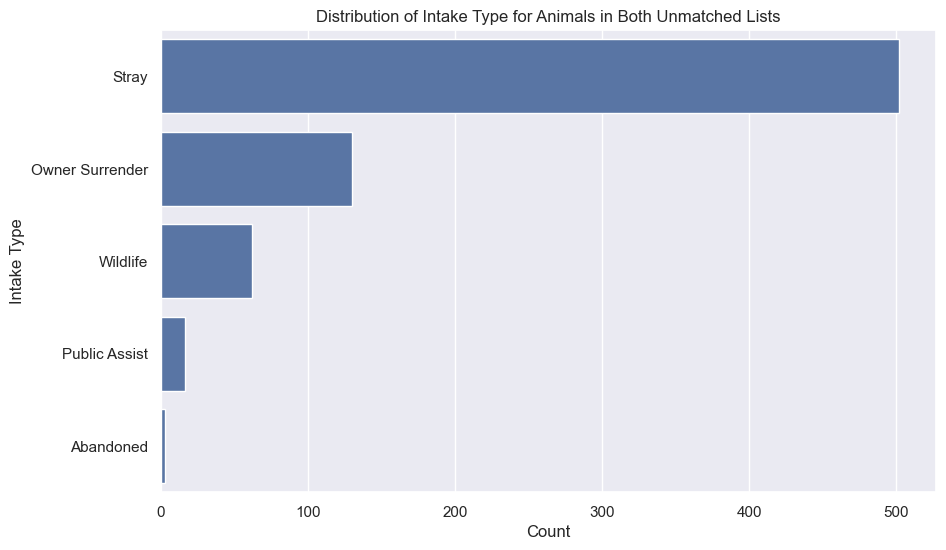

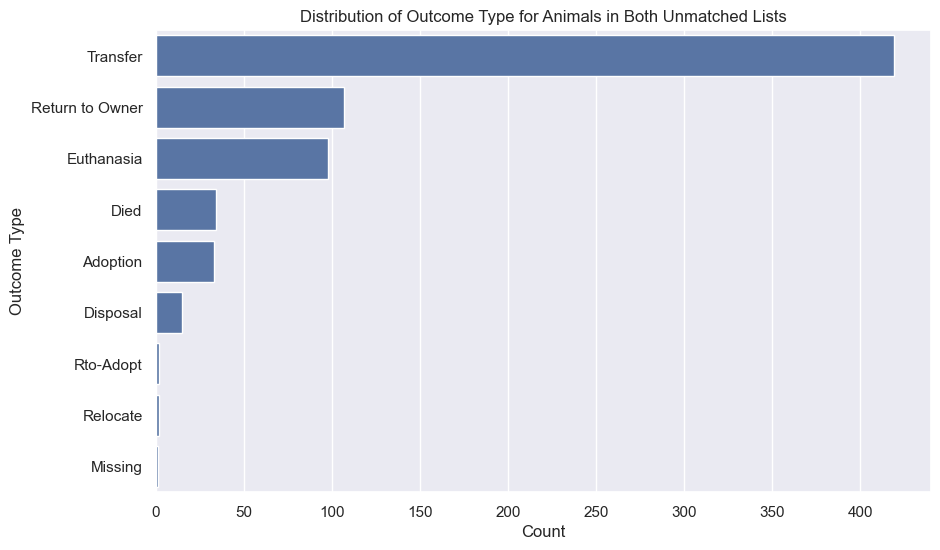

In [21]:
# Filter the original intakes and outcomes dataframes for the animal IDs found in both unmatched lists
intakes_in_both_unmatched = intakes_df[intakes_df['Animal ID'].isin(animal_ids_in_both_unmatched)]
outcomes_in_both_unmatched = outcomes_df_filtered[outcomes_df_filtered['Animal ID'].isin(animal_ids_in_both_unmatched)]

# Visualize the distribution of Intake Type for these animals
plt.figure(figsize=(10, 6))
sns.countplot(data=intakes_in_both_unmatched, y='Intake Type', order=intakes_in_both_unmatched['Intake Type'].value_counts().index)
plt.title('Distribution of Intake Type for Animals in Both Unmatched Lists')
plt.xlabel('Count')
plt.ylabel('Intake Type')
plt.show()

# Visualize the distribution of Outcome Type for these animals
plt.figure(figsize=(10, 6))
sns.countplot(data=outcomes_in_both_unmatched, y='Outcome Type', order=outcomes_in_both_unmatched['Outcome Type'].value_counts().index)
plt.title('Distribution of Outcome Type for Animals in Both Unmatched Lists')
plt.xlabel('Count')
plt.ylabel('Outcome Type')
plt.show()

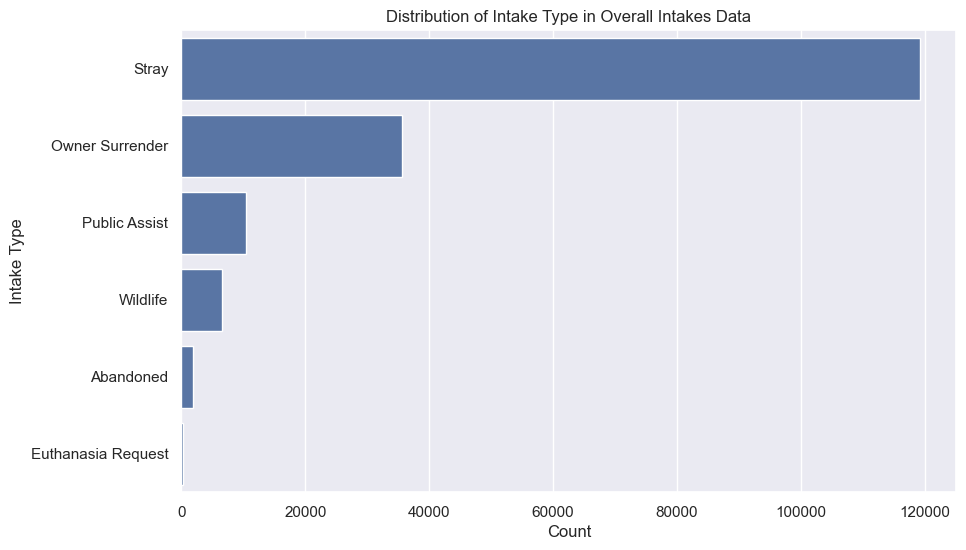

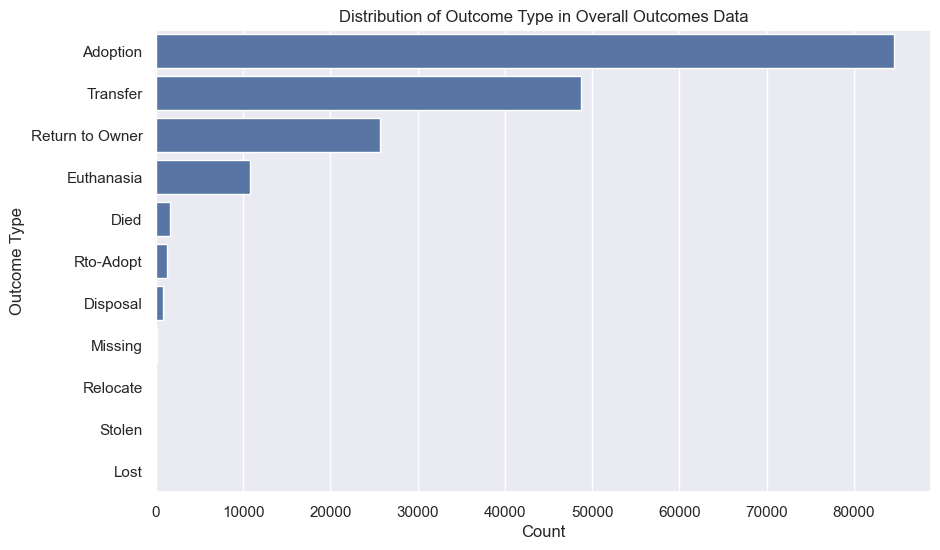

In [22]:
# Visualize the distribution of Intake Type for the overall intakes_df
plt.figure(figsize=(10, 6))
sns.countplot(data=intakes_df, y='Intake Type', order=intakes_df['Intake Type'].value_counts().index)
plt.title('Distribution of Intake Type in Overall Intakes Data')
plt.xlabel('Count')
plt.ylabel('Intake Type')
plt.show()

# Visualize the distribution of Outcome Type for the overall outcomes_df
plt.figure(figsize=(10, 6))
sns.countplot(data=outcomes_df, y='Outcome Type', order=outcomes_df['Outcome Type'].value_counts().index)
plt.title('Distribution of Outcome Type in Overall Outcomes Data')
plt.xlabel('Count')
plt.ylabel('Outcome Type')
plt.show()

# Addressing Outliers:



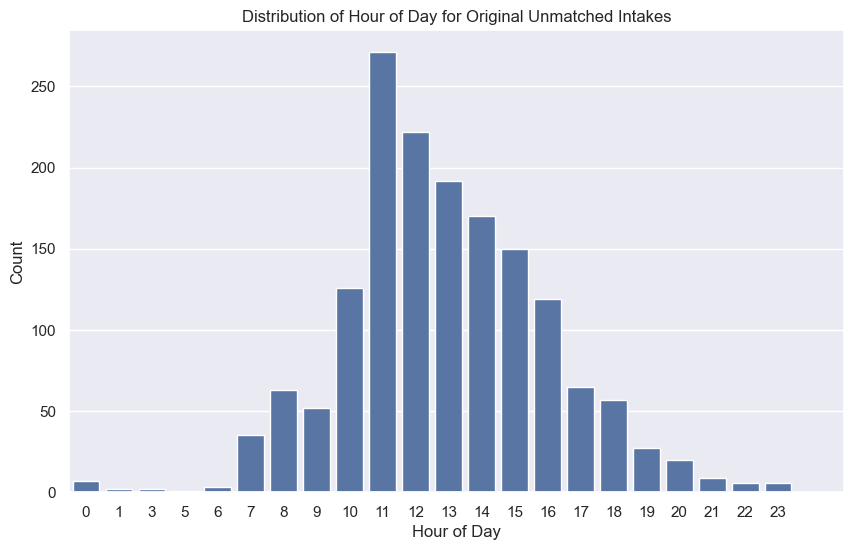

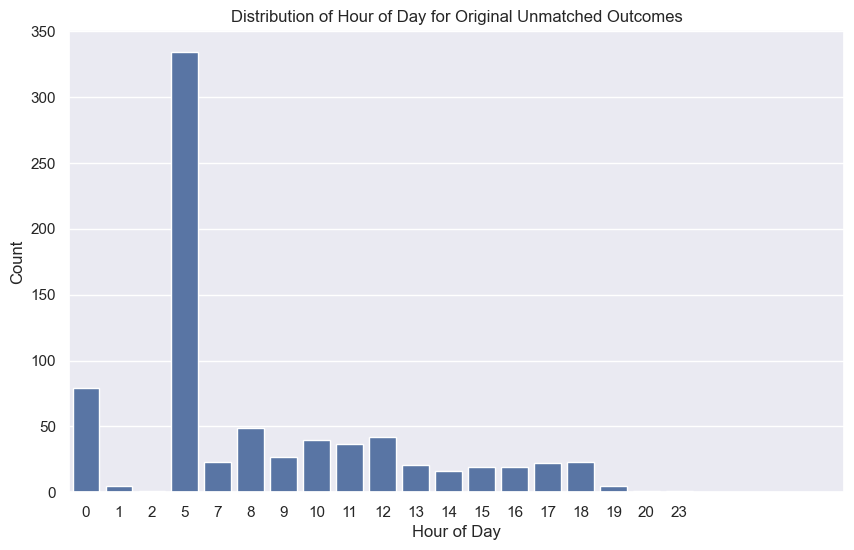

In [23]:
# Extract the hour of the day for the original unmatched intakes and outcomes
unmatched_intakes_df['Hour'] = unmatched_intakes_df['DateTime'].dt.hour
unmatched_outcomes_df['Hour'] = unmatched_outcomes_df['DateTime'].dt.hour

# Visualize the distribution of the hour of the day for original unmatched intakes
plt.figure(figsize=(10, 6))
sns.countplot(data=unmatched_intakes_df, x='Hour', order=sorted(unmatched_intakes_df['Hour'].unique()))
plt.title('Distribution of Hour of Day for Original Unmatched Intakes')
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.xticks(np.arange(0, 24))
plt.show()

# Visualize the distribution of the hour of the day for original unmatched outcomes
plt.figure(figsize=(10, 6))
sns.countplot(data=unmatched_outcomes_df, x='Hour', order=sorted(unmatched_outcomes_df['Hour'].unique()))
plt.title('Distribution of Hour of Day for Original Unmatched Outcomes')
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.xticks(np.arange(0, 24))
plt.show()

Based on observed data, I hypothesize that there are missing episodes due to incorrectly labeled times for outcomes. In the data, there are 638 unique Animal IDs that have at least one entry in both the unmatched_intakes_df and the unmatched_outcomes_df. Some can be resolved if we fix the outcome times for the cases where the outcome times are before the intake times.

I'm going to identify all mismatched outcome entries that have a corresponding mismatched intake Animal ID with a defaulted time of 5 am and change them to 11:59 pm.

In [24]:
# Filter unmatched outcomes for the Animal IDs that are also in unmatched intakes
unmatched_outcomes_in_both = unmatched_outcomes_df[unmatched_outcomes_df['Animal ID'].isin(animal_ids_in_both_unmatched)].copy()

# Extract the time component and check for '05:00:00'
time_05_00_00_count = (unmatched_outcomes_in_both['DateTime'].dt.time == pd.to_datetime('05:00:00').time()).sum()

print(f"Number of unmatched outcome records with time 05:00:00 for animals in both unmatched lists: {time_05_00_00_count}")

# Optionally, display some of these records
if time_05_00_00_count > 0:
    print("\nSample of unmatched outcome records with time 05:00:00 (first 5):")
    display(unmatched_outcomes_in_both[unmatched_outcomes_in_both['DateTime'].dt.time == pd.to_datetime('05:00:00').time()].head())

Number of unmatched outcome records with time 05:00:00 for animals in both unmatched lists: 332

Sample of unmatched outcome records with time 05:00:00 (first 5):


,Animal ID,Date of Birth,Name,DateTime,MonthYear,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color,Hour
0,A006100,2007-07-09,Scamp,2017-12-07 05:00:00,12-2017,Return to Owner,NaN,Dog,Neutered Male,10 years,Spinone Italiano Mix,Yellow/White,5
3,A531969,2008-03-06,Black,2015-11-13 05:00:00,11-2015,Return to Owner,NaN,Dog,Neutered Male,7 years,Pit Bull Mix,Black/White,5
4,A533243,2008-07-15,Choco,2016-12-20 05:00:00,12-2016,Return to Owner,NaN,Dog,Neutered Male,8 years,Labrador Retriever/Pit Bull,Chocolate,5
5,A554047,2009-07-08,Mega,2016-05-14 05:00:00,05-2016,Return to Owner,NaN,Dog,Neutered Male,6 years,Pit Bull Mix,Brown/White,5
8,A587232,2009-10-19,Rosie,2022-02-01 05:00:00,02-2022,Return to Owner,Field,Dog,Spayed Female,12 years,Chihuahua Shorthair Mix,Black/White,5


In [25]:
# Create a copy of the outcomes_df_filtered DataFrame
outcomes_df_adjusted = outcomes_df_filtered.copy()

# Identify the indices of the outcome records with time 05:00:00 in the copied DataFrame
indices_to_modify_adjusted = outcomes_df_adjusted[outcomes_df_adjusted['DateTime'].dt.time == pd.to_datetime('05:00:00').time()].index

# Change the time component of the 'DateTime' column to 23:59:00 for these records in the copied DataFrame
outcomes_df_adjusted.loc[indices_to_modify_adjusted, 'DateTime'] = outcomes_df_adjusted.loc[indices_to_modify_adjusted, 'DateTime'].apply(lambda dt: dt.replace(hour=23, minute=59, second=0))

print("Outcomes DataFrame with adjusted timestamps (first 5 with original 05:00:00 time):")
display(outcomes_df_adjusted.loc[indices_to_modify_adjusted].head())

Outcomes DataFrame with adjusted timestamps (first 5 with original 05:00:00 time):


,Animal ID,Date of Birth,Name,DateTime,MonthYear,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
1891,A006100,2007-07-09,Scamp,2017-12-07 23:59:00,12-2017,Return to Owner,NaN,Dog,Neutered Male,10 years,Spinone Italiano Mix,Yellow/White
300,A433746,2006-04-09,Evette,2015-11-04 23:59:00,11-2015,Transfer,Partner,Dog,Spayed Female,9 years,Australian Shepherd Mix,White/Brown
2080,A458233,2006-01-12,Cinnamon,2018-06-08 23:59:00,06-2018,Euthanasia,At Vet,Dog,Spayed Female,12 years,Beagle Mix,Tricolor
72,A459161,2006-01-27,Dugan,2015-04-19 23:59:00,04-2015,Return to Owner,NaN,Dog,Neutered Male,9 years,Shih Tzu Mix,Black/White
1603,A465637,2007-01-11,*Commander,2017-06-20 23:59:00,06-2017,Transfer,Partner,Dog,Neutered Male,10 years,Pit Bull,Chocolate/White


### Replicate Visit Creation with Adjusted Data


Replicate the episode creation logic using the original `intakes_df` and the `outcomes_df_adjusted` DataFrame.

In [26]:
grouped_intakes_new = intakes_df.groupby('Animal ID')
grouped_outcomes_adjusted = outcomes_df_adjusted.groupby('Animal ID')

visits_adjusted = []
unmatched_intakes_adjusted = []
unmatched_outcomes_adjusted = []

for animal_id, intake_group in grouped_intakes_new:
    intake_records = intake_group.to_dict('records')
    outcome_records = grouped_outcomes_adjusted.get_group(animal_id).to_dict('records') if animal_id in grouped_outcomes_adjusted.groups else []

    used_outcomes_indices = set()

    for intake in intake_records:
        matched_outcome = None
        # Find the first outcome after the intake date that hasn't been used
        for i, outcome in enumerate(outcome_records):
            if i not in used_outcomes_indices and outcome['DateTime'] >= intake['DateTime']:
                matched_outcome = outcome
                used_outcomes_indices.add(i)
                break

        if matched_outcome:
            visit = {
                'Animal ID': animal_id,
                'Intake': intake,
                'Outcome': matched_outcome
            }
            visits_adjusted.append(visit)
        else:
            unmatched_intakes_adjusted.append(intake)

    # Check for any outcomes that were not matched with an intake
    for i, outcome in enumerate(outcome_records):
        if i not in used_outcomes_indices:
            unmatched_outcomes_adjusted.append(outcome)

print(f"Number of episodes created with adjusted data: {len(visits_adjusted)}")
print(f"Number of unmatched intakes with adjusted data: {len(unmatched_intakes_adjusted)}")
print(f"Number of unmatched outcomes with adjusted data: {len(unmatched_outcomes_adjusted)}")

Number of episodes created with adjusted data: 172502
Number of unmatched intakes with adjusted data: 1274
Number of unmatched outcomes with adjusted data: 433


### Store Visits and Identify Remaining Mismatches (Adjusted Data)

In [27]:
# Store the created visits with adjusted data in a new DataFrame and identify any remaining mismatches
visit_list_adjusted = []

for visit in visits_adjusted:
    intake_details = visit['Intake']
    outcome_details = visit['Outcome']

    # Extract relevant information from intake and outcome records
    visit_data = {
        'Animal ID': visit['Animal ID'],
        'Intake_DateTime': intake_details['DateTime'],
        'Intake_Type': intake_details['Intake Type'],
        'Intake_Condition': intake_details['Intake Condition'],
        'Intake_Animal_Type': intake_details['Animal Type'],
        'Intake_Sex': intake_details['Sex upon Intake'],
        'Intake_Age': intake_details['Age upon Intake'],
        'Intake_Breed': intake_details['Breed'],
        'Intake_Color': intake_details['Color'],
        'Outcome_DateTime': outcome_details['DateTime'] if outcome_details else None,
        'Outcome_Type': outcome_details['Outcome Type'] if outcome_details else None,
        'Outcome_Subtype': outcome_details['Outcome Subtype'] if outcome_details else None,
        'Outcome_Animal_Type': outcome_details['Animal Type'] if outcome_details else None,
        'Outcome_Sex': outcome_details['Sex upon Outcome'] if outcome_details else None,
        'Outcome_Age': outcome_details['Age upon Outcome'] if outcome_details else None,
        'Outcome_Breed': outcome_details['Breed'] if outcome_details else None,
        'Outcome_Color': outcome_details['Color'] if outcome_details else None,
    }

    # Calculate duration of stay
    if visit_data['Outcome_DateTime'] is not None:
        visit_data['duration_of_stay'] = (visit_data['Outcome_DateTime'] - visit_data['Intake_DateTime']).total_seconds() / (24 * 3600)
    else:
        visit_data['duration_of_stay'] = None


    visit_list_adjusted.append(visit_data)

# Convert the list of dictionaries to a DataFrame
visits_df_adjusted = pd.DataFrame(visit_list_adjusted)

# Convert unmatched lists to DataFrames for easier analysis
unmatched_intakes_df_adjusted = pd.DataFrame(unmatched_intakes_adjusted)
unmatched_outcomes_df_adjusted = pd.DataFrame(unmatched_outcomes_adjusted)


print("Visits DataFrame with adjusted data:")
display(visits_df_adjusted.head())
print("\nNumber of unmatched intakes with adjusted data:")
display(len(unmatched_intakes_df_adjusted))
print("\nNumber of unmatched outcomes with adjusted data:")
display(len(unmatched_outcomes_df_adjusted))

Visits DataFrame with adjusted data:


,Animal ID,Intake_DateTime,Intake_Type,Intake_Condition,Intake_Animal_Type,Intake_Sex,Intake_Age,Intake_Breed,Intake_Color,Outcome_DateTime,Outcome_Type,Outcome_Subtype,Outcome_Animal_Type,Outcome_Sex,Outcome_Age,Outcome_Breed,Outcome_Color,duration_of_stay
0,A006100,2014-03-07 14:26:00,Public Assist,Normal,Dog,Neutered Male,6 years,Spinone Italiano Mix,Yellow/White,2014-03-08 17:10:00,Return to Owner,NaN,Dog,Neutered Male,6 years,Spinone Italiano Mix,Yellow/White,1.11
1,A006100,2014-12-19 10:21:00,Public Assist,Normal,Dog,Neutered Male,7 years,Spinone Italiano Mix,Yellow/White,2014-12-20 16:35:00,Return to Owner,NaN,Dog,Neutered Male,7 years,Spinone Italiano Mix,Yellow/White,1.26
2,A006100,2017-12-07 14:07:00,Stray,Normal,Dog,Neutered Male,10 years,Spinone Italiano Mix,Yellow/White,2017-12-07 23:59:00,Return to Owner,NaN,Dog,Neutered Male,10 years,Spinone Italiano Mix,Yellow/White,0.41
3,A047759,2014-04-02 15:55:00,Owner Surrender,Normal,Dog,Neutered Male,10 years,Dachshund,Tricolor,2014-04-07 15:12:00,Transfer,Partner,Dog,Neutered Male,10 years,Dachshund,Tricolor,4.97
4,A134067,2013-11-16 09:02:00,Public Assist,Injured,Dog,Neutered Male,16 years,Shetland Sheepdog,Brown/White,2013-11-16 11:54:00,Return to Owner,NaN,Dog,Neutered Male,16 years,Shetland Sheepdog,Brown/White,0.12



Number of unmatched intakes with adjusted data:


1274


Number of unmatched outcomes with adjusted data:


433

Reduction in Unmatched Intakes: 1605 - 1274 = 331
Reduction in Unmatched Outcomes: 764 - 433 = 331

Adjusting the 332 outcome timestamps from 05:00:00 to 23:59:00 resulted in 331 fewer unmatched intake records.

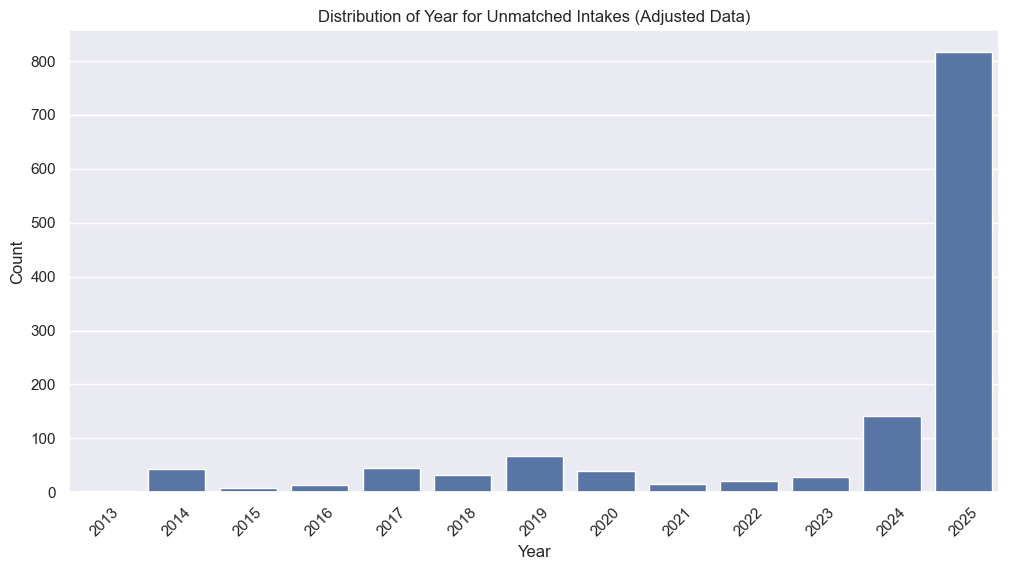

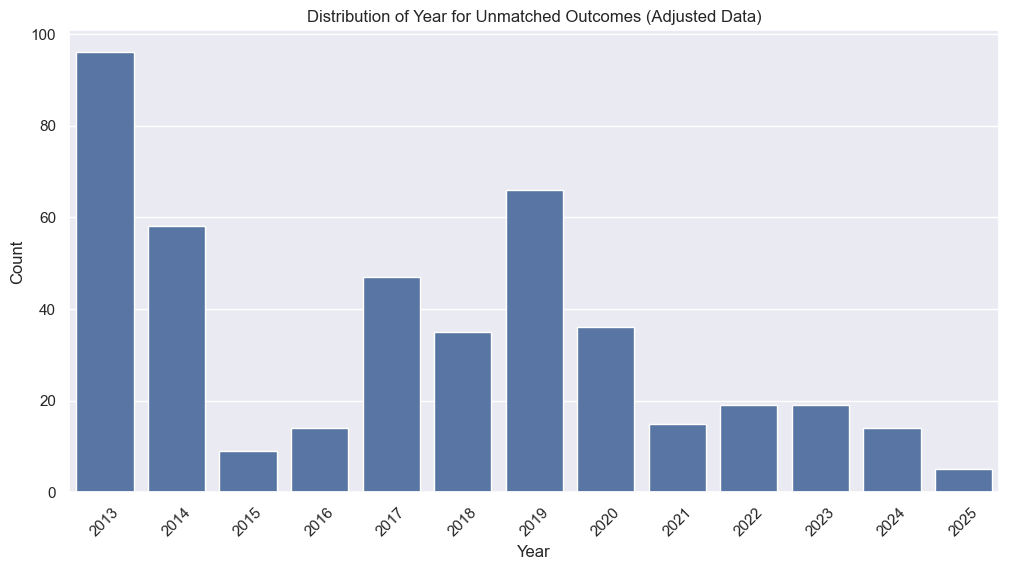

In [28]:
# Extract the year for unmatched intakes and outcomes
unmatched_intakes_df_adjusted['Year'] = unmatched_intakes_df_adjusted['DateTime'].dt.year
unmatched_outcomes_df_adjusted['Year'] = unmatched_outcomes_df_adjusted['DateTime'].dt.year

# Visualize the distribution of the year for unmatched intakes
plt.figure(figsize=(12, 6))
sns.countplot(data=unmatched_intakes_df_adjusted, x='Year', order=sorted(unmatched_intakes_df_adjusted['Year'].unique()))
plt.title('Distribution of Year for Unmatched Intakes (Adjusted Data)')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Visualize the distribution of the year for unmatched outcomes
plt.figure(figsize=(12, 6))
sns.countplot(data=unmatched_outcomes_df_adjusted, x='Year', order=sorted(unmatched_outcomes_df_adjusted['Year'].unique()))
plt.title('Distribution of Year for Unmatched Outcomes (Adjusted Data)')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [29]:
unmatched_outcomes_2013 = unmatched_outcomes_df_adjusted[unmatched_outcomes_df_adjusted['Year'] == 2013]
count_unmatched_outcomes_2013 = len(unmatched_outcomes_2013)

print(f"Number of unmatched outcomes from 2013 (adjusted data): {count_unmatched_outcomes_2013}")


unmatched_intakes_2025 = unmatched_intakes_df_adjusted[unmatched_intakes_df_adjusted['Year'] == 2025]
count_unmatched_intakes_2025 = len(unmatched_intakes_2025)

print(f"Number of unmatched intakes from 2025 (adjusted data): {count_unmatched_intakes_2025}")


total_unmatched_intakes_adjusted = len(unmatched_intakes_df_adjusted)
total_unmatched_outcomes_adjusted = len(unmatched_outcomes_df_adjusted)
total_unmatched_combined_adjusted = total_unmatched_intakes_adjusted + total_unmatched_outcomes_adjusted

print(f"Total unmatched intakes (adjusted data): {total_unmatched_intakes_adjusted}")
print(f"Total unmatched outcomes (adjusted data): {total_unmatched_outcomes_adjusted}")
print(f"Total unmatched combined (adjusted data): {total_unmatched_combined_adjusted}")


percentage_2013_outcomes = (count_unmatched_outcomes_2013 / total_unmatched_outcomes_adjusted) * 100 if total_unmatched_outcomes_adjusted > 0 else 0

print(f"\nPercentage of 2013 unmatched outcomes from total unmatched outcomes: {percentage_2013_outcomes:.2f}%")


percentage_2025_intakes = (count_unmatched_intakes_2025 / total_unmatched_intakes_adjusted) * 100 if total_unmatched_intakes_adjusted > 0 else 0
print(f"Percentage of 2025 unmatched intakes from total unmatched intakes: {percentage_2025_intakes:.2f}%")

percentage_combined_edge_cases = ((count_unmatched_outcomes_2013 + count_unmatched_intakes_2025) / total_unmatched_combined_adjusted) * 100 if total_unmatched_combined_adjusted > 0 else 0
print(f"Percentage of 2013 unmatched outcomes and 2025 unmatched intakes from total unmatched combined: {percentage_combined_edge_cases:.2f}%")

Number of unmatched outcomes from 2013 (adjusted data): 96
Number of unmatched intakes from 2025 (adjusted data): 816
Total unmatched intakes (adjusted data): 1274
Total unmatched outcomes (adjusted data): 433
Total unmatched combined (adjusted data): 1707

Percentage of 2013 unmatched outcomes from total unmatched outcomes: 22.17%
Percentage of 2025 unmatched intakes from total unmatched intakes: 64.05%
Percentage of 2013 unmatched outcomes and 2025 unmatched intakes from total unmatched combined: 53.43%


In [30]:
# Find Animal IDs that exist in both unmatched_intakes_df_adjusted and unmatched_outcomes_df_adjusted
animal_ids_in_both_unmatched_adjusted = pd.merge(unmatched_intakes_df_adjusted['Animal ID'], unmatched_outcomes_df_adjusted['Animal ID'], on='Animal ID', how='inner')['Animal ID'].unique()

print("Animal IDs that appear in both unmatched intakes and unmatched outcomes (adjusted data):")
print(animal_ids_in_both_unmatched_adjusted)
print(f"\nNumber of Animal IDs in both unmatched dataframes (adjusted data): {len(animal_ids_in_both_unmatched_adjusted)}")

# Take a sample of these Animal IDs
sample_animal_ids_adjusted = np.random.choice(animal_ids_in_both_unmatched_adjusted, size=10, replace=False)

print("\nInvestigating sample Animal IDs with entries in both unmatched lists (adjusted data):")
for animal_id in sample_animal_ids_adjusted:
    print(f"\n--- Entries for Animal ID: {animal_id} ---")

    # Display entries from the sorted intakes_df
    print("\nIntake entries:")
    display(intakes_df[intakes_df['Animal ID'] == animal_id])

    # Display entries from the outcomes_df_adjusted (with adjusted timestamps)
    print("\nOutcome entries:")
    display(outcomes_df_adjusted[outcomes_df_adjusted['Animal ID'] == animal_id])

Animal IDs that appear in both unmatched intakes and unmatched outcomes (adjusted data):
['A624094' 'A659667' 'A665649' 'A672696' 'A674638' 'A675125' 'A675480'
 'A676345' 'A678461' 'A678823' 'A678824' 'A679180' 'A679181' 'A679182'
 'A679215' 'A679217' 'A679222' 'A679305' 'A679357' 'A679361' 'A679408'
 'A679940' 'A679980' 'A680032' 'A680057' 'A680058' 'A680106' 'A680138'
 'A680141' 'A680144' 'A680319' 'A680504' 'A680744' 'A681049' 'A681851'
 'A681854' 'A681856' 'A681857' 'A681858' 'A681860' 'A681862' 'A681863'
 'A681864' 'A684858' 'A697081' 'A702081' 'A702786' 'A703445' 'A706446'
 'A711562' 'A711688' 'A716272' 'A717220' 'A718498' 'A718535' 'A721052'
 'A721112' 'A722153' 'A726746' 'A726749' 'A728301' 'A730626' 'A733964'
 'A734950' 'A737741' 'A738466' 'A738994' 'A739532' 'A742322' 'A742340'
 'A742708' 'A742796' 'A743544' 'A743548' 'A743708' 'A746851' 'A746983'
 'A747192' 'A747201' 'A747202' 'A748513' 'A751607' 'A753148' 'A755110'
 'A757613' 'A757614' 'A757615' 'A757616' 'A757618' 'A757652

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
71725,A757689,Blue,2017-09-05 11:54:00,September 2017,Maiden And Guadalupe in Austin (TX),Stray,Normal,Dog,Intact Male,3 years,German Shepherd Mix,Brown/Tan



Outcome entries:


,Animal ID,Date of Birth,Name,DateTime,MonthYear,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
72295,A757689,2014-09-05,Blue,2017-09-05 09:59:00,09-2017,Return to Owner,NaN,Dog,Intact Male,3 years,German Shepherd Mix,Brown/Tan



--- Entries for Animal ID: A817866 ---

Intake entries:


,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
117493,A817866,NaN,2020-05-27 15:18:00,May 2020,12231 Running Bird Lane in Austin (TX),Stray,Nursing,Cat,Intact Male,2 weeks,Domestic Shorthair,Blue Tabby



Outcome entries:


,Animal ID,Date of Birth,Name,DateTime,MonthYear,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
118768,A817866,2020-05-12,NaN,2020-05-27 07:16:00,05-2020,Transfer,Partner,Cat,Intact Male,2 weeks,Domestic Shorthair,Blue Tabby



--- Entries for Animal ID: A753148 ---

Intake entries:


,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
68298,A753148,Dandelion,2017-07-02 13:05:00,July 2017,2200 Manor Rd in Austin (TX),Stray,Normal,Cat,Intact Female,11 years,Domestic Shorthair Mix,Torbie
69277,A753148,Dandelion,2017-07-20 12:56:00,July 2017,2219 Manor Rd in Austin (TX),Stray,Normal,Cat,Intact Female,11 years,Domestic Shorthair Mix,Torbie
90710,A753148,Dandelion,2018-10-18 18:52:00,October 2018,French Place in Austin (TX),Stray,Normal,Cat,Intact Female,12 years,Domestic Shorthair Mix,Torbie
104034,A753148,Dandelion,2019-07-09 17:06:00,July 2019,Austin (TX),Owner Surrender,Sick,Cat,Intact Female,13 years,Domestic Shorthair Mix,Torbie



Outcome entries:


,Animal ID,Date of Birth,Name,DateTime,MonthYear,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
69115,A753148,2005-11-02,Dandelion,2017-07-06 08:46:00,07-2017,Return to Owner,NaN,Cat,Intact Female,11 years,Domestic Shorthair Mix,Torbie
69999,A753148,2005-11-02,Dandelion,2017-07-24 13:13:00,07-2017,Return to Owner,NaN,Cat,Intact Female,11 years,Domestic Shorthair Mix,Torbie
90726,A753148,2005-11-02,Dandelion,2018-10-18 11:26:00,10-2018,Return to Owner,NaN,Cat,Intact Female,12 years,Domestic Shorthair Mix,Torbie
104774,A753148,2005-11-02,Dandelion,2019-07-10 12:13:00,07-2019,Transfer,Partner,Cat,Intact Female,13 years,Domestic Shorthair Mix,Torbie



--- Entries for Animal ID: A858089 ---

Intake entries:


,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
139927,A858089,A858089,2022-05-25 17:21:00,May 2022,1500 Wooten Drive in Austin (TX),Wildlife,Sick,Other,Unknown,2 years,Bat,Brown



Outcome entries:


,Animal ID,Date of Birth,Name,DateTime,MonthYear,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
140470,A858089,2020-05-25,A858089,2022-05-25 10:21:00,05-2022,Euthanasia,Rabies Risk,Other,Unknown,2 years,Bat,Brown



--- Entries for Animal ID: A767520 ---

Intake entries:


,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
79026,A767520,NaN,2018-03-02 16:01:00,March 2018,Bittern Hollow And W Braker Lane in Austin (TX),Stray,Normal,Dog,Intact Male,1 month,Plott Hound Mix,Brown/White



Outcome entries:


,Animal ID,Date of Birth,Name,DateTime,MonthYear,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
79685,A767520,2018-01-02,NaN,2018-03-02 09:55:00,03-2018,Transfer,Partner,Dog,Intact Male,1 month,Plott Hound Mix,Brown/White



--- Entries for Animal ID: A742340 ---

Intake entries:


,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
76200,A742340,Blue,2017-12-15 14:11:00,December 2017,11711 Domain Dr in Austin (TX),Stray,Normal,Dog,Intact Male,3 years,Siberian Husky Mix,White/Black



Outcome entries:


,Animal ID,Date of Birth,Name,DateTime,MonthYear,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
76781,A742340,2014-12-15,Blue,2017-12-15 11:05:00,12-2017,Return to Owner,NaN,Dog,Intact Male,3 years,Siberian Husky Mix,White/Black



--- Entries for Animal ID: A793555 ---

Intake entries:


,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
99007,A793555,NaN,2019-04-26 16:41:00,April 2019,Austin (TX),Owner Surrender,Nursing,Dog,Unknown,2 days,Labrador Retriever Mix,Brown



Outcome entries:


,Animal ID,Date of Birth,Name,DateTime,MonthYear,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
98951,A793555,2019-04-24,NaN,2019-04-26,04-2019,Transfer,Partner,Dog,Unknown,2 days,Labrador Retriever Mix,Brown



--- Entries for Animal ID: A762083 ---

Intake entries:


,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
75038,A762083,NaN,2017-11-14 13:07:00,November 2017,Manor (TX),Owner Surrender,Normal,Dog,Intact Male,4 weeks,Pit Bull Mix,White/Black



Outcome entries:


,Animal ID,Date of Birth,Name,DateTime,MonthYear,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
75626,A762083,2017-10-14,NaN,2017-11-14 11:22:00,11-2017,Transfer,Partner,Dog,Intact Male,4 weeks,Pit Bull Mix,White/Black



--- Entries for Animal ID: A757615 ---

Intake entries:


,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
71670,A757615,NaN,2017-09-04 14:21:00,September 2017,6105 Jacqueline Ln in Austin (TX),Stray,Sick,Cat,Intact Female,2 weeks,Domestic Shorthair Mix,Calico



Outcome entries:


,Animal ID,Date of Birth,Name,DateTime,MonthYear,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
72224,A757615,2017-08-20,NaN,2017-09-04 08:51:00,09-2017,Transfer,Partner,Cat,Intact Female,2 weeks,Domestic Shorthair Mix,Calico



--- Entries for Animal ID: A793609 ---

Intake entries:


,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
99056,A793609,NaN,2019-04-27 13:05:00,April 2019,12517 Campana Drive in Travis (TX),Stray,Normal,Cat,Unknown,1 week,Domestic Shorthair Mix,Brown Tabby



Outcome entries:


,Animal ID,Date of Birth,Name,DateTime,MonthYear,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
98999,A793609,2019-04-20,NaN,2019-04-27,04-2019,Transfer,Partner,Cat,Unknown,1 week,Domestic Shorthair Mix,Brown Tabby


In [31]:
# Create copies of the adjusted unmatched dataframes
unmatched_intakes_df_final = unmatched_intakes_df_adjusted.copy()
unmatched_outcomes_df_final = unmatched_outcomes_df_adjusted.copy()

# Identify animal IDs that are in both unmatched dataframes (from adjusted data)
animal_ids_in_both_unmatched_adjusted = unmatched_intakes_df_final[unmatched_intakes_df_final['Animal ID'].isin(unmatched_outcomes_df_final['Animal ID'])]['Animal ID'].unique()

# Filter unmatched intakes and outcomes for these animal IDs
intakes_to_recheck = unmatched_intakes_df_final[unmatched_intakes_df_final['Animal ID'].isin(animal_ids_in_both_unmatched_adjusted)].copy()
outcomes_to_recheck = unmatched_outcomes_df_final[unmatched_outcomes_df_final['Animal ID'].isin(animal_ids_in_both_unmatched_adjusted)].copy()

# Adjust outcome times to 23:59:00 if the intake and outcome dates are the same
for index, outcome_row in outcomes_to_recheck.iterrows():
    animal_id = outcome_row['Animal ID']
    matching_intakes = intakes_to_recheck[(intakes_to_recheck['Animal ID'] == animal_id) & (intakes_to_recheck['DateTime'].dt.date == outcome_row['DateTime'].date())]

    if not matching_intakes.empty:
        outcomes_to_recheck.loc[index, 'DateTime'] = outcome_row['DateTime'].replace(hour=23, minute=59, second=0)

unmatched_outcomes_df_final.loc[outcomes_to_recheck.index, 'DateTime'] = outcomes_to_recheck['DateTime']


# Re-attempt to match records with adjusted outcome times
re_grouped_intakes = intakes_to_recheck.groupby('Animal ID')
re_grouped_outcomes = outcomes_to_recheck.groupby('Animal ID')

newly_matched_visits = []
still_unmatched_intakes = []
still_unmatched_outcomes = []


for animal_id, intake_group in re_grouped_intakes:
    intake_records = intake_group.to_dict('records')
    outcome_records = re_grouped_outcomes.get_group(animal_id).to_dict('records') if animal_id in re_grouped_outcomes.groups else []

    used_outcomes_indices = set()

    for intake in intake_records:
        matched_outcome = None
        # Find the first outcome after the intake date that hasn't been used
        for i, outcome in enumerate(outcome_records):
            if i not in used_outcomes_indices and outcome['DateTime'] >= intake['DateTime']:
                matched_outcome = outcome
                used_outcomes_indices.add(i)
                break

        if matched_outcome:
            newly_matched_visits.append({'Intake': intake, 'Outcome': matched_outcome})
        else:
            still_unmatched_intakes.append(intake)

    # Check for any outcomes that were not matched with an intake
    for i, outcome in enumerate(outcome_records):
        if i not in used_outcomes_indices:
            still_unmatched_outcomes.append(outcome)


# Update the final unmatched dataframes by removing the newly matched records
matched_intake_animal_ids = [visit['Intake']['Animal ID'] for visit in newly_matched_visits]
matched_intake_datetimes = [visit['Intake']['DateTime'] for visit in newly_matched_visits]
matched_outcome_animal_ids = [visit['Outcome']['Animal ID'] for visit in newly_matched_visits]
matched_outcome_datetimes = [visit['Outcome']['DateTime'] for visit in newly_matched_visits]


# Create a boolean mask for rows to keep in unmatched_intakes_df_final
mask_intakes_to_keep = ~unmatched_intakes_df_final.apply(
    lambda row: any((row['Animal ID'] == aid) and (row['DateTime'] == dt) for aid, dt in zip(matched_intake_animal_ids, matched_intake_datetimes)), axis=1
)
unmatched_intakes_df_final = unmatched_intakes_df_final[mask_intakes_to_keep].copy()

# Create a boolean mask for rows to keep in unmatched_outcomes_df_final
mask_outcomes_to_keep = ~unmatched_outcomes_df_final.apply(
    lambda row: any((row['Animal ID'] == aid) and (row['DateTime'] == dt) for aid, dt in zip(matched_outcome_animal_ids, matched_outcome_datetimes)), axis=1
)
unmatched_outcomes_df_final = unmatched_outcomes_df_final[mask_outcomes_to_keep].copy()


print(f"Number of newly matched visits: {len(newly_matched_visits)}")
print(f"Number of remaining unmatched intakes (final): {len(unmatched_intakes_df_final)}")
print(f"Number of remaining unmatched outcomes (final): {len(unmatched_outcomes_df_final)}")

print("\nFirst 5 rows of unmatched intakes (final):")
display(unmatched_intakes_df_final.head())

print("\nFirst 5 rows of unmatched outcomes (final):")
display(unmatched_outcomes_df_final.head())

Number of newly matched visits: 298
Number of remaining unmatched intakes (final): 976
Number of remaining unmatched outcomes (final): 135

First 5 rows of unmatched intakes (final):


,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color,Year
1,A636629,NaN,2014-09-07 16:31:00,September 2014,706 Terrace Mountain Drive in Austin (TX),Stray,Normal,Cat,Spayed Female,4 years,Domestic Shorthair Mix,Tortie,2014
2,A645513,NaN,2015-05-18 07:30:00,May 2015,3001 Sauls in Austin (TX),Stray,Injured,Cat,Neutered Male,6 years,Domestic Longhair Mix,Cream Tabby/White,2015
35,A681049,Patty,2019-04-30 07:15:00,April 2019,4434 Frontier Trail in Austin (TX),Owner Surrender,Injured,Dog,Spayed Female,7 years,German Shepherd Mix,Brown/Black,2019
45,A682781,NaN,2014-08-13 18:41:00,August 2014,Colorado & 6Th Street in Austin (TX),Stray,Normal,Cat,Neutered Male,1 year,Domestic Shorthair Mix,White/Black,2014
46,A683782,NaN,2014-07-19 15:55:00,July 2014,11411 Research Blvd in Austin (TX),Stray,Normal,Cat,Neutered Male,5 months,Domestic Shorthair Mix,Brown Tabby,2014



First 5 rows of unmatched outcomes (final):


,Animal ID,Date of Birth,Name,DateTime,MonthYear,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color,Year
0,A483240,2007-06-17,Frassina,2013-11-16 15:58:00,11-2013,Adoption,NaN,Cat,Spayed Female,6 years,Domestic Longhair/Persian,Blue Cream,2013
1,A531739,2008-02-29,Bentley,2013-11-30 13:31:00,11-2013,Adoption,NaN,Dog,Neutered Male,5 years,Pointer Mix,White/Tan,2013
2,A556804,2002-02-05,Kathy,2013-11-16 16:38:00,11-2013,Adoption,NaN,Cat,Spayed Female,11 years,Domestic Shorthair Mix,Black/White,2013
3,A561806,2008-11-30,Dasia,2017-06-05 18:09:00,06-2017,Return to Owner,NaN,Dog,Spayed Female,8 years,Pit Bull Mix,Brown Brindle/White,2017
4,A601869,2011-04-10,Otto,2013-10-10 12:00:00,10-2013,Transfer,Partner,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Black,2013


Reduction in Unmatched Intakes: 1274 - 976 = 298
Reduction in Unmatched Outcomes: 433 - 135 = 298

Adjusting the 298 outcome timestamps to 23:59:00 resulted in 298 fewer unmatched intake records and outcome records.

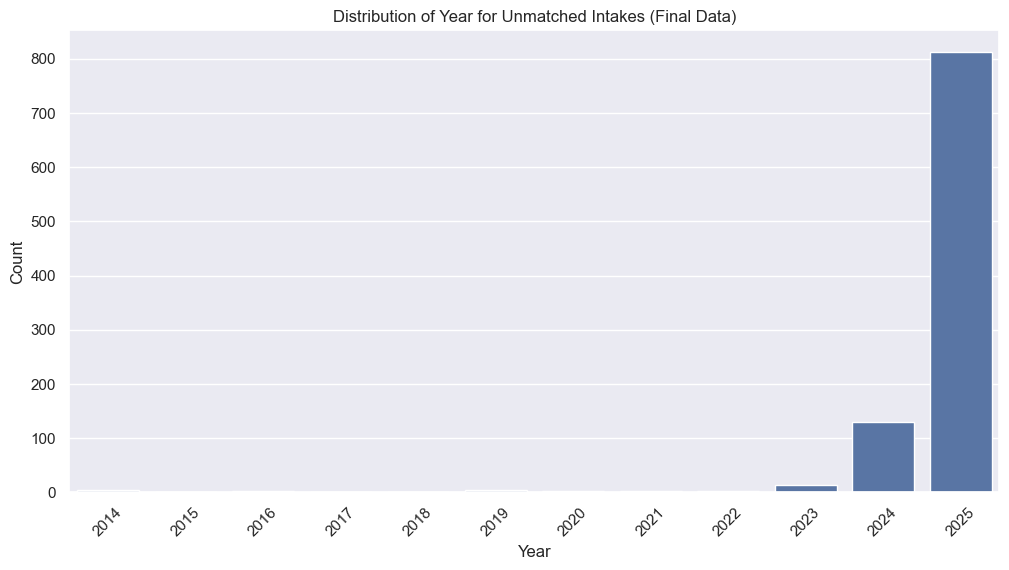

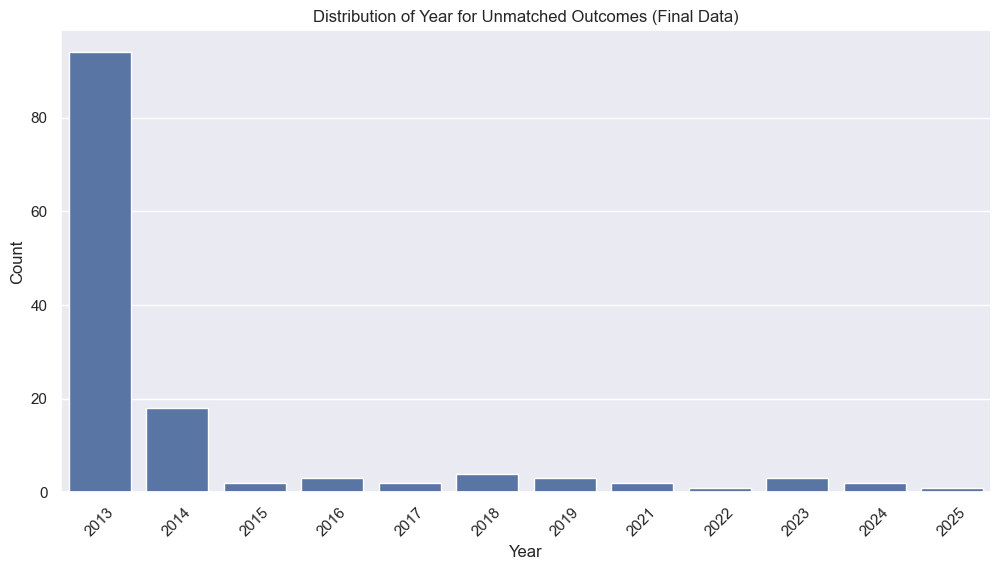

In [32]:
# Extract the year for unmatched intakes and outcomes
unmatched_intakes_df_final['Year'] = unmatched_intakes_df_final['DateTime'].dt.year
unmatched_outcomes_df_final['Year'] = unmatched_outcomes_df_final['DateTime'].dt.year

# Visualize the distribution of the year for unmatched intakes
plt.figure(figsize=(12, 6))
sns.countplot(data=unmatched_intakes_df_final, x='Year', order=sorted(unmatched_intakes_df_final['Year'].unique()))
plt.title('Distribution of Year for Unmatched Intakes (Final Data)')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Visualize the distribution of the year for unmatched outcomes
plt.figure(figsize=(12, 6))
sns.countplot(data=unmatched_outcomes_df_final, x='Year', order=sorted(unmatched_outcomes_df_final['Year'].unique()))
plt.title('Distribution of Year for Unmatched Outcomes (Final Data)')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [33]:
# Build visits_final from your prior visits plus the newly matched ones
visits_base = []
if 'visits_adjusted' in globals():
    visits_base = list(visits_adjusted)
elif 'visits' in globals():
    visits_base = list(visits)
else:
    visits_base = []

visits_final = list(visits_base) + list(newly_matched_visits)

# Create visit_list_final mirroring visit_list / visit_list_adjusted schema
visit_list_final = []

for visit in visits_final:
    intake_details = visit['Intake']
    outcome_details = visit.get('Outcome', None)

    # Most robust way to get Animal ID
    animal_id = visit.get('Animal ID', intake_details.get('Animal ID', None))

    visit_data = {
        'Animal ID': animal_id,
        'Intake_DateTime': intake_details['DateTime'],
        'Intake_Type': intake_details.get('Intake Type'),
        'Intake_Name': intake_details.get('Name'),
        'Intake_Condition': intake_details.get('Intake Condition'),
        'Intake_Animal_Type': intake_details.get('Animal Type'),
        'Intake_Sex': intake_details.get('Sex upon Intake'),
        'Intake_Age': intake_details.get('Age upon Intake'),
        'Intake_Breed': intake_details.get('Breed'),
        'Intake_Color': intake_details.get('Color'),
        'Outcome_Name': outcome_details.get('Name') if outcome_details else None,
        'Outcome_DateTime': outcome_details['DateTime'] if outcome_details else None,
        'Outcome_Type': outcome_details.get('Outcome Type') if outcome_details else None,
        'Outcome_Subtype': outcome_details.get('Outcome Subtype') if outcome_details else None,
        'Outcome_Animal_Type': outcome_details.get('Animal Type') if outcome_details else None,
        'Outcome_Sex': outcome_details.get('Sex upon Outcome') if outcome_details else None,
        'Outcome_Age': outcome_details.get('Age upon Outcome') if outcome_details else None,
        'Outcome_Breed': outcome_details.get('Breed') if outcome_details else None,
        'Outcome_Color': outcome_details.get('Color') if outcome_details else None,
    }

    # Duration of stay
    if visit_data['Outcome_DateTime'] is not None:
        visit_data['duration_of_stay'] = visit_data['Outcome_DateTime'] - visit_data['Intake_DateTime']
    else:
        visit_data['duration_of_stay'] = None

    visit_list_final.append(visit_data)

print(f"Visits base count: {len(visits_base)}")
print(f"Newly matched added: {len(newly_matched_visits)}")
print(f"visit_list_final total: {len(visit_list_final)}")


Visits base count: 172502
Newly matched added: 298
visit_list_final total: 172800


In [34]:
unmatched_intakes_df_final = pd.DataFrame(still_unmatched_intakes)
unmatched_outcomes_df_final = pd.DataFrame(still_unmatched_outcomes)

# Keep DateTime dtype + ordering consistent with earlier cells
for df in (unmatched_intakes_df_final, unmatched_outcomes_df_final):
    if 'DateTime' in df.columns:
        df['DateTime'] = pd.to_datetime(df['DateTime'], errors='coerce')
    if 'Animal ID' in df.columns and 'DateTime' in df.columns:
        df.sort_values(by=['Animal ID', 'DateTime'], inplace=True)

print(f"Number of remaining unmatched intakes (final): {len(unmatched_intakes_df_final)}")
print(f"Number of remaining unmatched outcomes (final): {len(unmatched_outcomes_df_final)}")

print("\nUnmatched intakes (final):")
display(unmatched_intakes_df_final.head(9))

print("\nUnmatched outcomes (final):")
display(unmatched_outcomes_df_final.head(9))

Number of remaining unmatched intakes (final): 9
Number of remaining unmatched outcomes (final): 9

Unmatched intakes (final):


,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color,Year
0,A681049,Patty,2019-04-30 07:15:00,April 2019,4434 Frontier Trail in Austin (TX),Owner Surrender,Injured,Dog,Spayed Female,7 years,German Shepherd Mix,Brown/Black,2019
1,A718498,Snoop Dog,2016-01-02 14:08:00,January 2016,6807 Wentworth Dr in Austin (TX),Owner Surrender,Injured,Dog,Intact Male,1 year,Labrador Retriever Mix,Black,2016
2,A721112,Bella,2016-11-19 18:39:00,November 2016,Montana St And Vasquez St in Austin (TX),Stray,Normal,Dog,Spayed Female,10 years,Australian Cattle Dog Mix,White/Tan,2016
3,A730626,Buster,2018-02-08 16:12:00,February 2018,Grayson Ln in Austin (TX),Stray,Injured,Dog,Intact Male,3 years,Pit Bull Mix,Brown/White,2018
4,A733964,Niko,2020-02-14 14:33:00,February 2020,Austin (TX),Owner Surrender,Normal,Dog,Neutered Male,5 years,German Shepherd,Black/Brown,2020
5,A753148,Dandelion,2019-07-09 17:06:00,July 2019,Austin (TX),Owner Surrender,Sick,Cat,Intact Female,13 years,Domestic Shorthair Mix,Torbie,2019
6,A766554,Roxy,2020-03-01 11:51:00,March 2020,Austin (TX),Owner Surrender,Normal,Dog,Spayed Female,3 years,German Shepherd,Black/Brown,2020
7,A788114,Luu,2019-04-01 11:57:00,April 2019,8515 Brodie Lane 2127 in Austin (TX),Stray,Normal,Dog,Intact Female,8 months,Beagle/German Shepherd,Black/Tan,2019
8,A807087,Opera,2019-12-02 11:59:00,December 2019,Aldea Drive And Matthews Lane in Austin (TX),Stray,Normal,Dog,Intact Female,3 years,Pit Bull,Red/White,2019



Unmatched outcomes (final):


,Animal ID,Date of Birth,Name,DateTime,MonthYear,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color,Year
0,A681049,2011-12-11,Patty,2019-01-12 15:17:33,01-2019,Transfer,Partner,Dog,Intact Female,7 years,German Shepherd Mix,Brown/Black,2019
1,A718498,2014-07-01,Snoop Dog,2015-12-31 14:04:00,12-2015,Return to Owner,NaN,Dog,Intact Male,1 year,Labrador Retriever Mix,Black,2015
2,A721112,2006-02-22,Bella,2016-02-22 12:47:00,02-2016,Return to Owner,NaN,Dog,Spayed Female,10 years,Australian Cattle Dog Mix,White/Tan,2016
3,A730626,2014-07-07,Buster,2016-07-24 19:25:00,07-2016,Return to Owner,NaN,Dog,Intact Male,2 years,Pit Bull Mix,Brown/White,2016
4,A733964,2014-08-30,Niko,2018-02-11 10:50:00,02-2018,Return to Owner,NaN,Dog,Intact Male,3 years,German Shepherd,Black/Brown,2018
5,A753148,2005-11-02,Dandelion,2018-10-18 11:26:00,10-2018,Return to Owner,NaN,Cat,Intact Female,12 years,Domestic Shorthair Mix,Torbie,2018
6,A766554,2017-02-11,Roxy,2018-02-11 10:50:00,02-2018,Return to Owner,NaN,Dog,Intact Female,1 year,German Shepherd,Black/Brown,2018
7,A788114,2018-07-26,Luu,2019-02-07 11:35:00,02-2019,Return to Owner,NaN,Dog,Intact Female,6 months,Beagle/German Shepherd,Black/Tan,2019
8,A807087,2016-10-20,Opera,2019-10-20 11:11:00,10-2019,Return to Owner,NaN,Dog,Intact Female,3 years,Pit Bull,Red/White,2019




## Finalize Visit data with more additional preprocessing




In [35]:
# Create a new DataFrame from the visit_list
final_df = pd.DataFrame(visit_list_final)

In [36]:
# Show samples where Intake_Sex and Outcome_Sex differ (case/whitespace-insensitive)
mask = final_df['Intake_Sex'].notna() & final_df['Outcome_Sex'].notna()
si = final_df.loc[mask, 'Intake_Sex'].str.strip().str.lower().str.replace(r'\s+', ' ', regex=True)
so = final_df.loc[mask, 'Outcome_Sex'].str.strip().str.lower().str.replace(r'\s+', ' ', regex=True)
diff = si != so

print(f"Differing rows: {int(diff.sum())}\n")

print("Top differing pairs:")
print(pd.DataFrame({'Intake_Sex_norm': si[diff], 'Outcome_Sex_norm': so[diff]})
        .value_counts()
        .head(10))

print("\nSample rows:")
print(final_df.loc[mask & diff, ['Animal ID','Intake_DateTime','Outcome_DateTime','Intake_Sex','Outcome_Sex']]
      .head(20)
      .to_string(index=False))


Differing rows: 71002

Top differing pairs:
Intake_Sex_norm  Outcome_Sex_norm
intact male      neutered male       36412
intact female    spayed female       34590
Name: count, dtype: int64

Sample rows:
Animal ID     Intake_DateTime    Outcome_DateTime    Intake_Sex   Outcome_Sex
  A378348 2013-12-12 11:07:00 2014-01-19 13:39:00   Intact Male Neutered Male
  A443085 2014-03-19 10:33:00 2014-07-21 16:23:00   Intact Male Neutered Male
  A476605 2014-09-22 20:24:00 2014-09-28 18:46:00   Intact Male Neutered Male
  A494120 2016-04-02 15:57:00 2016-04-07 19:38:00   Intact Male Neutered Male
  A501076 2015-04-12 17:34:00 2015-04-14 17:40:00 Intact Female Spayed Female
  A501255 2014-03-08 17:07:00 2014-03-10 17:08:00   Intact Male Neutered Male
  A504813 2014-11-25 14:52:00 2014-12-01 16:19:00 Intact Female Spayed Female
  A510475 2014-06-28 08:25:00 2014-07-04 17:55:00   Intact Male Neutered Male
  A524634 2015-01-02 18:54:00 2015-06-24 08:26:00 Intact Female Spayed Female
  A529310 2015-0

In [37]:
# Gender-only and Spay/Neutered features
def parse_sex(val):
    """
    Expects strings like 'Neutered Male', 'Spayed Female', 'Intact Male', 'Unknown'.
    Returns (Gender, SpayNeuterBool) where Gender in {'Male','Female','Unknown'},
    and SpayNeuterBool in {1, 0, <NA>}.
    """
    if pd.isna(val):
        return ("Unknown", pd.NA)
    s = str(val).strip().lower()
    ss = re.sub(r"\s+", " ", str(val).strip().lower())

    # Gender
    if re.search(r"\bfemale\b", ss):
        gender = "Female"
    elif re.search(r"\bmale\b", ss):
        gender = "Male"
    else:
        gender = "Unknown"



    # Spay/Neuter status
    if ("spayed" in s) or ("neutered" in s):
        sn = 1
    elif "intact" in s:
        sn = 0
    elif "unknown" in s:
        sn = pd.NA
    else:
        sn = pd.NA

    return (gender, sn)

if "Intake_Sex" in final_df:
    final_df[["Intake_Gender","Intake_SpayNeuter"]] = final_df["Intake_Sex"].apply(
        lambda x: pd.Series(parse_sex(x))
    )

if "Outcome_Sex" in final_df:
    final_df[["Outcome_Gender","Outcome_SpayNeuter"]] = final_df["Outcome_Sex"].apply(
      lambda x: pd.Series(parse_sex(x))
    )

print("Gender value counts (Intake):")
print(final_df["Intake_Gender"].value_counts(dropna=False))
print("\nSpayNeuter value counts (Intake):")
print(final_df["Intake_SpayNeuter"].value_counts(dropna=False))
print("Gender value counts (Outcome):")
print(final_df["Outcome_Gender"].value_counts(dropna=False))
print("\nSpayNeuter value counts (Outcome):")
print(final_df["Outcome_SpayNeuter"].value_counts(dropna=False))

Gender value counts (Intake):
Intake_Gender
Male       82737
Female     76565
Unknown    13498
Name: count, dtype: int64

SpayNeuter value counts (Intake):
Intake_SpayNeuter
0       114976
1        44326
<NA>     13498
Name: count, dtype: int64
Gender value counts (Outcome):
Outcome_Gender
Male       82737
Female     76565
Unknown    13498
Name: count, dtype: int64

SpayNeuter value counts (Outcome):
Outcome_SpayNeuter
1       115328
0        43974
<NA>     13498
Name: count, dtype: int64


In [38]:
# Breed mix boolean (intake & outcome)
def is_mix(breed):
    if pd.isna(breed):
        return np.nan
    s = str(breed).lower()
    return ("mix" in s) or ("/" in s)

if "Intake_Breed" in final_df:
    final_df["Intake_Breed_Is_Mix"] = final_df["Intake_Breed"].apply(is_mix)
if "Outcome_Breed" in final_df:
    final_df["Outcome_Breed_Is_Mix"] = final_df["Outcome_Breed"].apply(is_mix)

# Convert to integer (0/1)
for col in ["Intake_Breed_Is_Mix", "Outcome_Breed_Is_Mix"]:
    if col in final_df.columns:
        final_df[col] = final_df[col].map({True:1, False:0}).astype("Int64")

In [39]:
# Remove 'mix' from breeds to reduce values
def strip_mix(s):
    if pd.isna(s):
        return s
    s = str(s)
    # remove whole-word "mix" (case-insensitive)
    s = re.sub(r'\bmix\b', '', s, flags=re.I)
    # normalize slashes/spaces
    s = re.sub(r'\s*/\s*', ' / ', s)     # spaces around slash -> " / "
    s = re.sub(r'(?:\s*/\s*){2,}', ' / ', s)  # collapse repeated slashes
    s = re.sub(r'\s+', ' ', s).strip()   # collapse spaces
    s = s.strip('/')                     # drop leading/trailing slashes
    return s

for col in [c for c in ["Breed", "Intake_Breed", "Outcome_Breed"] if c in final_df.columns]:
    final_df[col] = final_df[col].apply(strip_mix)


In [40]:
# De-duplicate Intake/Outcome pairs in final_df

def _norm_str(x):
    if pd.isna(x): return np.nan
    return re.sub(r"\s+", " ", str(x).strip().lower())

def _equal_string(a, b):
    if pd.isna(a) and pd.isna(b): return True
    if pd.isna(a) or pd.isna(b):  return False
    return _norm_str(a) == _norm_str(b)

def _coalesce(a, b):
    # prefer Outcome (b), else Intake (a)
    return b if not pd.isna(b) else a

# Pairs to compare -> canonical output name
pairs = [
    ("Intake_Animal_Type", "Outcome_Animal_Type", "Animal_Type"),
    ("Intake_Gender",       "Outcome_Gender",       "Gender"),
    ("Intake_Breed_Is_Mix",  "Outcome_Breed_Is_Mix", "Breed_Is_Mix"),
    ("Intake_Breed",       "Outcome_Breed",       "Breed"),
    ("Intake_Color",       "Outcome_Color",       "Color"),
    ("Intake_Name",        "Outcome_Name",        "Name"),

]

dupe_summary = []
for a_col, b_col, out_col in pairs:
    if a_col not in final_df.columns or b_col not in final_df.columns:
        dupe_summary.append({"pair": f"{a_col} vs {b_col}", "status": "skipped (missing column)"})
        continue

    a = final_df[a_col]
    b = final_df[b_col]
    both = (~a.isna()) & (~b.isna())

    # rows where both present but different (case/space-insensitive)
    diff_count = int((both & ~a.combine(b, _equal_string)).sum())

    # Always create coalesced column for modeling
    final_df[out_col] = a.combine(b, _coalesce)

    if diff_count == 0:
        # identical -> collapse and drop originals
        final_df.drop(columns=[a_col, b_col], inplace=True)
        dupe_summary.append({"pair": f"{a_col} vs {b_col}", "status": f"collapsed → '{out_col}' (dropped originals)"})
    else:
        # not identical -> keep originals for audit, but you still get the unified feature
        dupe_summary.append({"pair": f"{a_col} vs {b_col}", "status": f"differences in {diff_count} rows; kept originals, created '{out_col}'"})

print("Duplicate check summary:")
display(pd.DataFrame(dupe_summary))
display(final_df.head())


Duplicate check summary:


,pair,status
0,Intake_Animal_Type vs Outcome_Animal_Type,collapsed → 'Animal_Type' (dropped originals)
1,Intake_Gender vs Outcome_Gender,collapsed → 'Gender' (dropped originals)
2,Intake_Breed_Is_Mix vs Outcome_Breed_Is_Mix,collapsed → 'Breed_Is_Mix' (dropped originals)
3,Intake_Breed vs Outcome_Breed,collapsed → 'Breed' (dropped originals)
4,Intake_Color vs Outcome_Color,collapsed → 'Color' (dropped originals)
5,Intake_Name vs Outcome_Name,collapsed → 'Name' (dropped originals)


,Animal ID,Intake_DateTime,Intake_Type,Intake_Condition,Intake_Sex,Intake_Age,Outcome_DateTime,Outcome_Type,Outcome_Subtype,Outcome_Sex,Outcome_Age,duration_of_stay,Intake_SpayNeuter,Outcome_SpayNeuter,Animal_Type,Gender,Breed_Is_Mix,Breed,Color,Name
0,A006100,2014-03-07 14:26:00,Public Assist,Normal,Neutered Male,6 years,2014-03-08 17:10:00,Return to Owner,NaN,Neutered Male,6 years,1 days 02:44:00,1,1,Dog,Male,1,Spinone Italiano,Yellow/White,Scamp
1,A006100,2014-12-19 10:21:00,Public Assist,Normal,Neutered Male,7 years,2014-12-20 16:35:00,Return to Owner,NaN,Neutered Male,7 years,1 days 06:14:00,1,1,Dog,Male,1,Spinone Italiano,Yellow/White,Scamp
2,A006100,2017-12-07 14:07:00,Stray,Normal,Neutered Male,10 years,2017-12-07 23:59:00,Return to Owner,NaN,Neutered Male,10 years,0 days 09:52:00,1,1,Dog,Male,1,Spinone Italiano,Yellow/White,Scamp
3,A047759,2014-04-02 15:55:00,Owner Surrender,Normal,Neutered Male,10 years,2014-04-07 15:12:00,Transfer,Partner,Neutered Male,10 years,4 days 23:17:00,1,1,Dog,Male,0,Dachshund,Tricolor,Oreo
4,A134067,2013-11-16 09:02:00,Public Assist,Injured,Neutered Male,16 years,2013-11-16 11:54:00,Return to Owner,NaN,Neutered Male,16 years,0 days 02:52:00,1,1,Dog,Male,0,Shetland Sheepdog,Brown/White,Bandit


In [41]:
# Ensure datetimes are proper dtype
for col in ["Intake_DateTime", "Outcome_DateTime"]:
    if col in final_df.columns:
        final_df[col] = pd.to_datetime(final_df[col], errors="coerce")

# converts age to days
def age_to_days(age_str):
    if age_str is None or (isinstance(age_str, float) and np.isnan(age_str)):
        return 0
    s = str(age_str).strip().lower()
    if s in {"", "unknown", "nan"}:
        return 0
    m = re.match(r"^\s*(\d+(?:\.\d+)?)\s*(year|years|yr|yrs|month|months|mo|mos|week|weeks|wk|wks|day|days)\s*$", s)
    if not m:
        return 0
    num = float(m.group(1))
    unit = m.group(2)
    if unit.startswith("year") or unit in {"yr","yrs"}:
        days = num * 365
    elif unit.startswith("month") or unit in {"mo","mos"}:
        days = num * 30
    elif unit.startswith("week") or unit in {"wk","wks"}:
        days = num * 7
    elif unit.startswith("day"):
        days = num
    else:
        days = 0

    # Convert negative days to positive
    return int(round(abs(days)))

# Categorizes ages in four groups

def categorize_age(age_in_days):
    d = 0 if age_in_days is None or (isinstance(age_in_days, float) and np.isnan(age_in_days)) else int(age_in_days)
    if d <= 180:        return "Puppy/Kitten"   # ~6 months
    elif d <= 730:      return "Juvenile"       # ~2 years
    elif d <= 3650:     return "Adult"          # ~10 years
    else:               return "Senior"

# compute from string age columns if present
for col, days_col, grp_col in [
    ("Intake_Age",         "age_in_days_intake",   "age_group_intake"),
    ("Outcome_Age",        "age_in_days_outcome",  "age_group_outcome"),
    ("Age upon Intake",    "age_in_days_intake",   "age_group_intake"),
    ("Age upon Outcome",   "age_in_days_outcome",  "age_group_outcome"),
]:
    if col in final_df.columns:
        final_df[days_col] = final_df[col].apply(age_to_days)
        final_df[grp_col]  = final_df[days_col].apply(categorize_age)


# Drop the original string age columns (keep the numeric features)
final_df = final_df.drop(columns=['Intake_Age', 'Outcome_Age'], errors='ignore')

In [42]:
# Duration of stay: clean + numeric feature
# Convert timedelta to numeric days; if negative, set to NaN (data error)
if "duration_of_stay" in final_df:
    # If it's already a timedelta, this will work; if it's object, coerce first
    if not np.issubdtype(final_df["duration_of_stay"].dtype, np.timedelta64):
        final_df["duration_of_stay"] = pd.to_timedelta(final_df["duration_of_stay"], errors="coerce")
    final_df["DurationDays"] = final_df["duration_of_stay"].dt.total_seconds() / 86400.0
    final_df.loc[final_df["DurationDays"] < 0, "DurationDays"] = np.nan
    # Drop the original timedelta column
    final_df = final_df.drop(columns=["duration_of_stay"], errors="ignore")
else:
    # Fallback: compute from datetimes if outcome present
    if {"Intake_DateTime","Outcome_DateTime"}.issubset(final_df.columns):
        final_df["DurationDays"] = (final_df["Outcome_DateTime"] - final_df["Intake_DateTime"]).dt.total_seconds() / 86400.0
        final_df.loc[final_df["DurationDays"] < 0, "DurationDays"] = np.nan

In [43]:
#  Missing value handling
for col in final_df.columns:
    if final_df[col].dtype == 'object':
        final_df[col] = final_df[col].fillna('unknown')
    elif str(final_df[col].dtype) in ['float64', 'int64', 'Int64']:
        final_df[col] = final_df[col].fillna(-1)


In [44]:
final_df = final_df.drop(columns=['Intake_Sex', 'Outcome_Sex'], errors='ignore')

In [45]:
def month_to_season(m):
    #  Winter(12,1,2), Spring(3-5), Summer(6-8), Fall(9-11)
    if pd.isna(m):
        return np.nan
    m = int(m)
    if m in (12, 1, 2):
        return "Winter"
    elif m in (3, 4, 5):
        return "Spring"
    elif m in (6, 7, 8):
        return "Summer"
    elif m in (9, 10, 11):
        return "Fall"
    return np.nan

SEASON_CODE = {"Winter": 0, "Spring": 1, "Summer": 2, "Fall": 3}

for prefix, dt_col in [("Intake", "Intake_DateTime"), ("Outcome", "Outcome_DateTime")]:
    if dt_col in final_df.columns:
        # Basic calendar features
        final_df[f"{prefix}_Month"]     = final_df[dt_col].dt.month
        final_df[f"{prefix}_DayOfWeek"] = final_df[dt_col].dt.dayofweek  # Monday=0, Sunday=6

        #Numeric season for modeling
        final_df[f"{prefix}_Season"]    = final_df[dt_col].dt.month.map(month_to_season)
        final_df[f"{prefix}_Season_Code"] = final_df[f"{prefix}_Season"].map(SEASON_CODE)

In [46]:
# Keep only the top N most common values; bucket the rest as OTHER. Then one-hot.

# def cap_rare(series: pd.Series, top_n=50, other_label="OTHER"):
#     s = series.astype(str)
#     top = s.value_counts().head(top_n).index
#     return np.where(s.isin(top), s, other_label)

# # Tune these caps
# final_df["Breed_Capped"] = cap_rare(final_df["Breed"], top_n=100)
# final_df["Color_Capped"] = cap_rare(final_df["Color"], top_n=30)

# print("Breed_Capped uniques:", pd.Series(final_df["Breed_Capped"]).nunique())
# print("Color_Capped uniques:", pd.Series(final_df["Color_Capped"]).nunique())


In [47]:
# Preview
print("\nFirst 5 rows of cleaned Final DataFrame:")
display(final_df.head())

print("\nCleaned final DataFrame Info:")
display(final_df.info())


First 5 rows of cleaned Final DataFrame:


,Animal ID,Intake_DateTime,Intake_Type,Intake_Condition,Outcome_DateTime,Outcome_Type,Outcome_Subtype,Intake_SpayNeuter,Outcome_SpayNeuter,Animal_Type,Gender,Breed_Is_Mix,Breed,Color,Name,age_in_days_intake,age_group_intake,age_in_days_outcome,age_group_outcome,DurationDays,Intake_Month,Intake_DayOfWeek,Intake_Season,Intake_Season_Code,Outcome_Month,Outcome_DayOfWeek,Outcome_Season,Outcome_Season_Code
0,A006100,2014-03-07 14:26:00,Public Assist,Normal,2014-03-08 17:10:00,Return to Owner,unknown,1,1,Dog,Male,1,Spinone Italiano,Yellow/White,Scamp,2190,Adult,2190,Adult,1.11,3,4,Spring,1,3,5,Spring,1
1,A006100,2014-12-19 10:21:00,Public Assist,Normal,2014-12-20 16:35:00,Return to Owner,unknown,1,1,Dog,Male,1,Spinone Italiano,Yellow/White,Scamp,2555,Adult,2555,Adult,1.26,12,4,Winter,0,12,5,Winter,0
2,A006100,2017-12-07 14:07:00,Stray,Normal,2017-12-07 23:59:00,Return to Owner,unknown,1,1,Dog,Male,1,Spinone Italiano,Yellow/White,Scamp,3650,Adult,3650,Adult,0.41,12,3,Winter,0,12,3,Winter,0
3,A047759,2014-04-02 15:55:00,Owner Surrender,Normal,2014-04-07 15:12:00,Transfer,Partner,1,1,Dog,Male,0,Dachshund,Tricolor,Oreo,3650,Adult,3650,Adult,4.97,4,2,Spring,1,4,0,Spring,1
4,A134067,2013-11-16 09:02:00,Public Assist,Injured,2013-11-16 11:54:00,Return to Owner,unknown,1,1,Dog,Male,0,Shetland Sheepdog,Brown/White,Bandit,5840,Senior,5840,Senior,0.12,11,5,Fall,3,11,5,Fall,3



Cleaned final DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172800 entries, 0 to 172799
Data columns (total 28 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Animal ID            172800 non-null  object        
 1   Intake_DateTime      172800 non-null  datetime64[ns]
 2   Intake_Type          172800 non-null  object        
 3   Intake_Condition     172800 non-null  object        
 4   Outcome_DateTime     172800 non-null  datetime64[ns]
 5   Outcome_Type         172800 non-null  object        
 6   Outcome_Subtype      172800 non-null  object        
 7   Intake_SpayNeuter    172800 non-null  object        
 8   Outcome_SpayNeuter   172800 non-null  object        
 9   Animal_Type          172800 non-null  object        
 10  Gender               172800 non-null  object        
 11  Breed_Is_Mix         172800 non-null  Int64         
 12  Breed                172800 non-null  obj

None

In [48]:
# Unique values per column in final_df


unique_counts = final_df.nunique(dropna=True)
summary = (pd.DataFrame({
    "unique_count_excl_NA": unique_counts,
    "dtype": final_df.dtypes.astype(str)
}).sort_values("unique_count_excl_NA", ascending=False))

print(summary.to_string())




                     unique_count_excl_NA           dtype
Animal ID                          155423          object
Outcome_DateTime                   145495  datetime64[ns]
Intake_DateTime                    119117  datetime64[ns]
DurationDays                        57086         float64
Name                                29675          object
Breed                                2703          object
Color                                 660          object
age_in_days_intake                     50           int64
age_in_days_outcome                    50           int64
Outcome_Subtype                        27          object
Intake_Condition                       20          object
Outcome_Type                           12          object
Outcome_Month                          12           int32
Intake_Month                           12           int32
Intake_DayOfWeek                        7           int32
Outcome_DayOfWeek                       7           int32
Intake_Type   

Counts by Is_DogOrCat (1=dog/cat, 0=other types):
Is_DogOrCat
1    162942
0      9858 



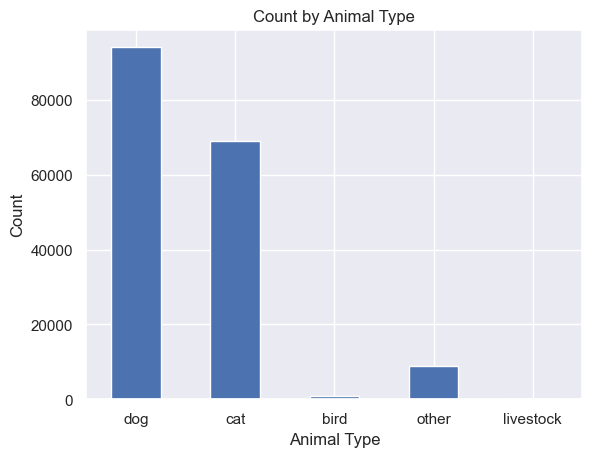

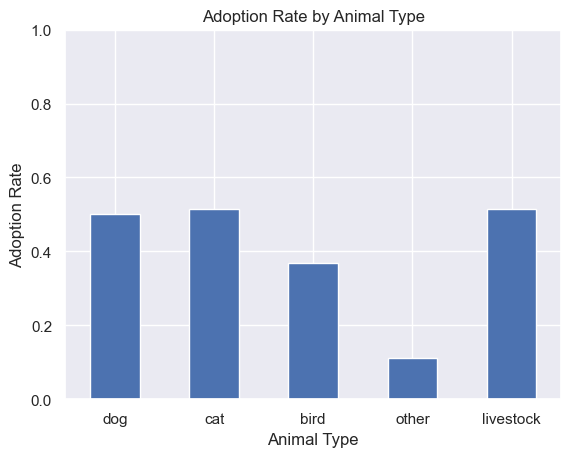

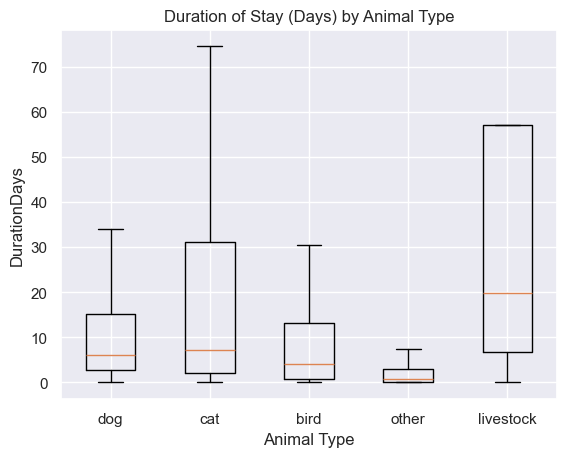

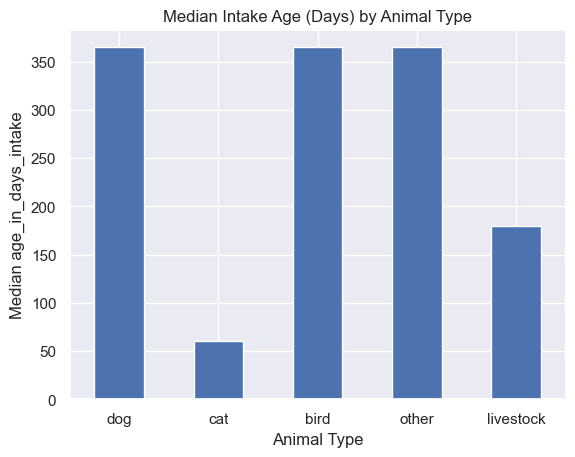


=== Summary by Animal Type ===
                  count  adoption_rate  median_duration_days  median_intake_age_days
Animal_Type_Norm                                                                    
dog               94025           0.50                  6.00                  365.00
cat               68917           0.51                  7.20                   60.00
bird                877           0.37                  4.17                  365.00
other              8948           0.11                  0.67                  365.00
livestock            33           0.52                 19.89                  180.00


In [49]:
df = final_df.copy()

# Normalize Animal_Type into the 5 buckets
def norm_type(x):
    if pd.isna(x): return "other"
    s = str(x).strip().lower()
    if "dog" in s:        return "dog"
    if "cat" in s:        return "cat"
    if "bird" in s:       return "bird"
    if "livestock" in s:  return "livestock"
    return "other"

df["Animal_Type_Norm"] = df["Animal_Type"].apply(norm_type)
type_order = ["dog","cat","bird","other","livestock"]
df = df[df["Animal_Type_Norm"].isin(type_order)].copy()

# Age at intake:
if "age_in_days_intake" not in df.columns:
    if "Intake_Age_Days" in df.columns:
        df["age_in_days_intake"] = df["Intake_Age_Days"]
    elif "Intake_Age_Years" in df.columns:
        df["age_in_days_intake"] = df["Intake_Age_Years"] * 365.25
    else:
        df["age_in_days_intake"] = np.nan

# dog/cat vs other split
df["Is_DogOrCat"] = df["Animal_Type_Norm"].isin(["dog","cat"]).astype(int)
print("Counts by Is_DogOrCat (1=dog/cat, 0=other types):")
print(df["Is_DogOrCat"].value_counts(dropna=False).to_string(), "\n")

# Count by Animal Type
counts = df["Animal_Type_Norm"].value_counts().reindex(type_order, fill_value=0)
plt.figure()
counts.plot(kind="bar")
plt.title("Count by Animal Type")
plt.xlabel("Animal Type")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

# Adoption Rate by Animal Type
if "Outcome_Type" in df.columns:
    adoption_rate = (
        df.groupby("Animal_Type_Norm")["Outcome_Type"]
          .apply(lambda s: (s == "Adoption").mean())
          .reindex(type_order, fill_value=0.0)
    )
    plt.figure()
    adoption_rate.plot(kind="bar")
    plt.title("Adoption Rate by Animal Type")
    plt.xlabel("Animal Type")
    plt.ylabel("Adoption Rate")
    plt.xticks(rotation=0)
    plt.ylim(0, 1)
    plt.show()
else:
    adoption_rate = pd.Series(index=type_order, dtype=float)

# Duration of Stay by Animal Type
if "DurationDays" in df.columns:
    data_for_box = [df.loc[df["Animal_Type_Norm"] == t, "DurationDays"].dropna().values for t in type_order]
    plt.figure()
    plt.boxplot(data_for_box, labels=type_order, showfliers=False)
    plt.title("Duration of Stay (Days) by Animal Type")
    plt.xlabel("Animal Type")
    plt.ylabel("DurationDays")
    plt.show()
else:
    data_for_box = [np.array([]) for _ in type_order]

# Median Intake Age by Animal Type
age_median = df.groupby("Animal_Type_Norm")["age_in_days_intake"].median().reindex(type_order, fill_value=np.nan)
plt.figure()
age_median.plot(kind="bar")
plt.title("Median Intake Age (Days) by Animal Type")
plt.xlabel("Animal Type")
plt.ylabel("Median age_in_days_intake")
plt.xticks(rotation=0)
plt.show()

# Compact summary table
summary_df = pd.DataFrame({
    "count": counts,
    "adoption_rate": adoption_rate,
    "median_duration_days": [np.nan if len(x)==0 else float(np.nanmedian(x)) for x in data_for_box],
    "median_intake_age_days": age_median
})
print("\n=== Summary by Animal Type ===")
print(summary_df.to_string())


<Figure size 640x480 with 0 Axes>

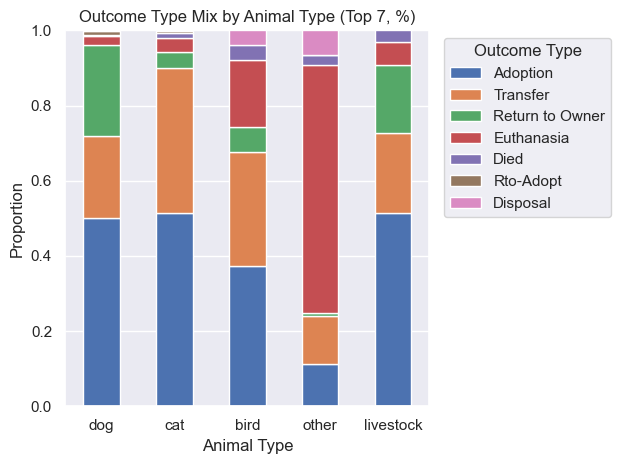

<Figure size 640x480 with 0 Axes>

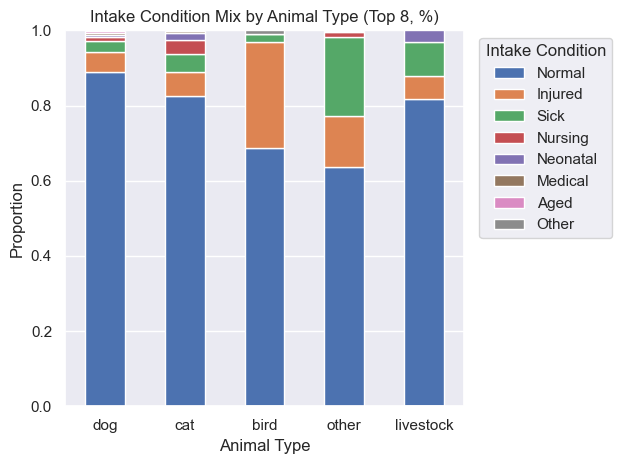

In [50]:

# Percent-stacked: Outcome Types by Animal Type
K_out = 7
top_outcomes = df["Outcome_Type"].fillna("unknown").value_counts().head(K_out).index

out_ctab = (
    df.assign(Outcome_Type=df["Outcome_Type"].fillna("unknown"))
      .groupby(["Animal_Type_Norm","Outcome_Type"]).size()
      .unstack(fill_value=0)
      .reindex(index=type_order, fill_value=0)
      .reindex(columns=top_outcomes, fill_value=0)
)

out_pct = out_ctab.div(out_ctab.sum(axis=1).replace(0, np.nan), axis=0)

plt.figure()
ax = out_pct.plot(kind="bar", stacked=True)
ax.set_title(f"Outcome Type Mix by Animal Type (Top {len(top_outcomes)}, %)")
ax.set_xlabel("Animal Type"); ax.set_ylabel("Proportion")
ax.set_xticks(range(len(type_order))); ax.set_xticklabels(type_order, rotation=0)
ax.legend(title="Outcome Type", bbox_to_anchor=(1.02,1), loc="upper left")
plt.ylim(0,1); plt.tight_layout(); plt.show()

# Percent-stacked: Intake Condition by Animal Type
K_in = 8
top_conditions = df["Intake_Condition"].fillna("unknown").value_counts().head(K_in).index

cond_ctab = (
    df.assign(Intake_Condition=df["Intake_Condition"].fillna("unknown"))
      .groupby(["Animal_Type_Norm","Intake_Condition"]).size()
      .unstack(fill_value=0)
      .reindex(index=type_order, fill_value=0)
      .reindex(columns=top_conditions, fill_value=0)
)

cond_pct = cond_ctab.div(cond_ctab.sum(axis=1).replace(0, np.nan), axis=0)

plt.figure()
ax = cond_pct.plot(kind="bar", stacked=True)
ax.set_title(f"Intake Condition Mix by Animal Type (Top {len(top_conditions)}, %)")
ax.set_xlabel("Animal Type"); ax.set_ylabel("Proportion")
ax.set_xticks(range(len(type_order))); ax.set_xticklabels(type_order, rotation=0)
ax.legend(title="Intake Condition", bbox_to_anchor=(1.02,1), loc="upper left")
plt.ylim(0,1); plt.tight_layout(); plt.show()



=== DurationDays (overall) summary ===
count    172800.00
min           0.00
p1            0.01
p5            0.07
p25           2.01
median        6.01
mean         21.05
p75          19.92
p95          84.81
p99         214.95
max        1912.94
std          48.41 

=== Overall outliers (IQR) ===
Q1=2.01, Q3=19.92, IQR=17.91 -> lower=-24.85, upper=46.78
Count: 21624

=== Overall outliers (MAD z-score) ===
median=6.01, MAD=5.17, |robust_z| > 3.5
Count: 30995

Top 20 longest stays (overall):
Animal ID Animal_Type_Norm     Intake_DateTime    Outcome_DateTime  DurationDays
  A642712              dog 2016-01-05 11:37:00 2021-04-01 10:08:00       1912.94
  A764237              cat 2017-12-26 12:08:00 2022-10-06 10:41:00       1744.94
  A722987              dog 2016-03-24 16:59:00 2020-05-24 16:30:00       1521.98
  A702369              cat 2015-05-12 16:45:00 2019-05-21 09:54:00       1469.71
  A707965              cat 2015-07-20 17:12:00 2019-05-28 09:45:00       1407.69
  A810081        

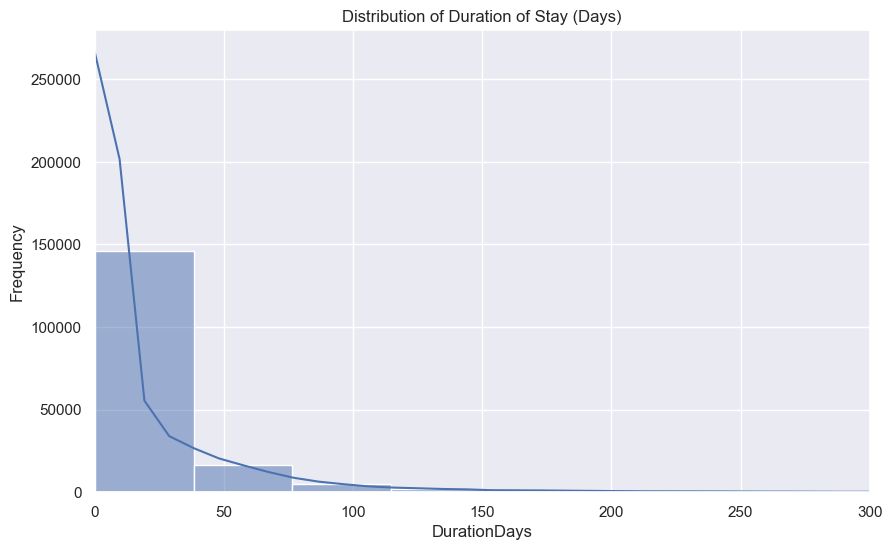

In [51]:
# Length of Stay (DurationDays) range + outlier detection


# Overall summary stats
dur = df["DurationDays"].dropna()
summary = pd.Series({
    "count": dur.size,
    "min": float(dur.min()),
    "p1": float(dur.quantile(0.01)),
    "p5": float(dur.quantile(0.05)),
    "p25": float(dur.quantile(0.25)),
    "median": float(dur.median()),
    "mean": float(dur.mean()),
    "p75": float(dur.quantile(0.75)),
    "p95": float(dur.quantile(0.95)),
    "p99": float(dur.quantile(0.99)),
    "max": float(dur.max()),
    "std": float(dur.std(ddof=1))
})
print("=== DurationDays (overall) summary ===")
print(summary.to_string(), "\n")

# Overall outliers (IQR + MAD)
Q1, Q3 = dur.quantile(0.25), dur.quantile(0.75)
IQR = Q3 - Q1
iqr_lower = Q1 - 1.5*IQR
iqr_upper = Q3 + 1.5*IQR

med = dur.median()
mad = (dur - med).abs().median()
if mad == 0:
    robust_z = pd.Series(np.zeros_like(dur), index=dur.index)
else:
    robust_z = 0.6745 * (dur - med) / mad

outliers_iqr = df[(df["DurationDays"] < iqr_lower) | (df["DurationDays"] > iqr_upper)]
outliers_mad = df[robust_z.abs() > 3.5]

print(f"=== Overall outliers (IQR) ===")
print(f"Q1={Q1:.2f}, Q3={Q3:.2f}, IQR={IQR:.2f} -> lower={iqr_lower:.2f}, upper={iqr_upper:.2f}")
print(f"Count: {len(outliers_iqr)}\n")

print(f"=== Overall outliers (MAD z-score) ===")
print(f"median={med:.2f}, MAD={mad:.2f}, |robust_z| > 3.5")
print(f"Count: {len(outliers_mad)}\n")

# Show a few extremes (highest stays) for inspection
print("Top 20 longest stays (overall):")
cols_show = ["Animal ID","Animal_Type_Norm","Intake_DateTime","Outcome_DateTime","DurationDays"]
print(df.sort_values("DurationDays", ascending=False)[cols_show].head(20).to_string(index=False), "\n")

# Per animal-type outliers (IQR)
def iqr_bounds(s):
    q1, q3 = s.quantile(0.25), s.quantile(0.75)
    iqr = q3 - q1
    return pd.Series({"low": q1 - 1.5*iqr, "high": q3 + 1.5*iqr})

bounds_by_type = df.groupby("Animal_Type_Norm")["DurationDays"].apply(iqr_bounds).unstack()
print("=== IQR bounds by Animal_Type_Norm ===")
print(bounds_by_type.to_string(), "\n")

def flag_iqr(group):
    low, high = bounds_by_type.loc[group.name, "low"], bounds_by_type.loc[group.name, "high"]
    return (group["DurationDays"] < low) | (group["DurationDays"] > high)

df["is_outlier_iqr_by_type"] = df.groupby("Animal_Type_Norm", group_keys=False).apply(flag_iqr).astype(bool)

print("Outlier counts by Animal_Type_Norm (IQR):")
print(df.groupby("Animal_Type_Norm")["is_outlier_iqr_by_type"].sum().to_string(), "\n")

# Show top 10 outliers per type
print("Top 10 outliers per Animal_Type_Norm (IQR):")
for t, sub in df[df["is_outlier_iqr_by_type"]].groupby("Animal_Type_Norm"):
    print(f"\n-- {t} --")
    print(sub.sort_values("DurationDays", ascending=False)[cols_show].head(10).to_string(index=False))

# Visualize the distribution of DurationDays with a histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='DurationDays', bins=50, kde=True)
plt.title('Distribution of Duration of Stay (Days)')
plt.xlabel('DurationDays')
plt.ylabel('Frequency')
plt.xlim(0, 300) # Limit x-axis to better visualize the main distribution
plt.show()

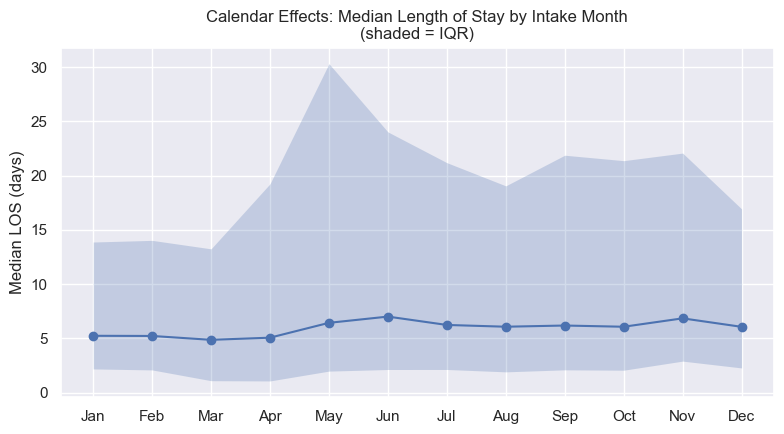

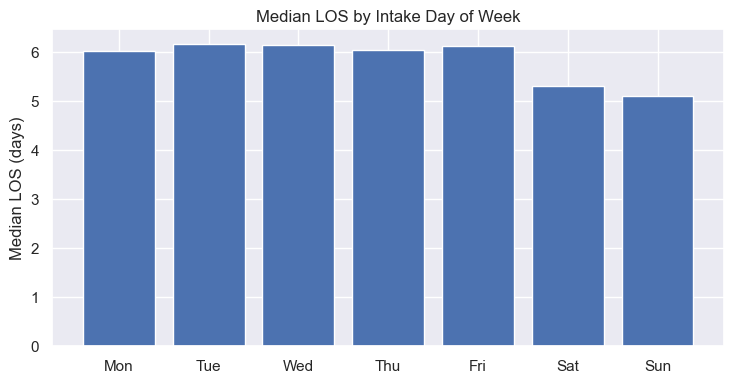

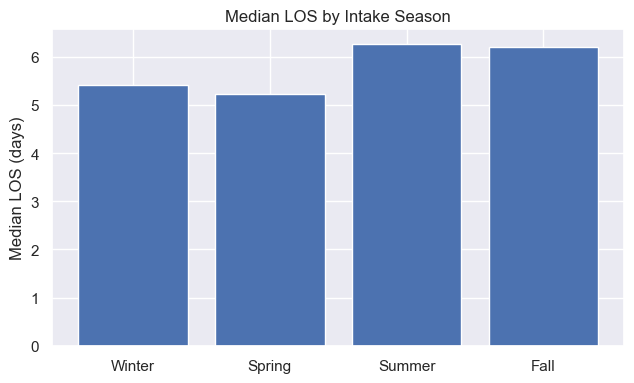

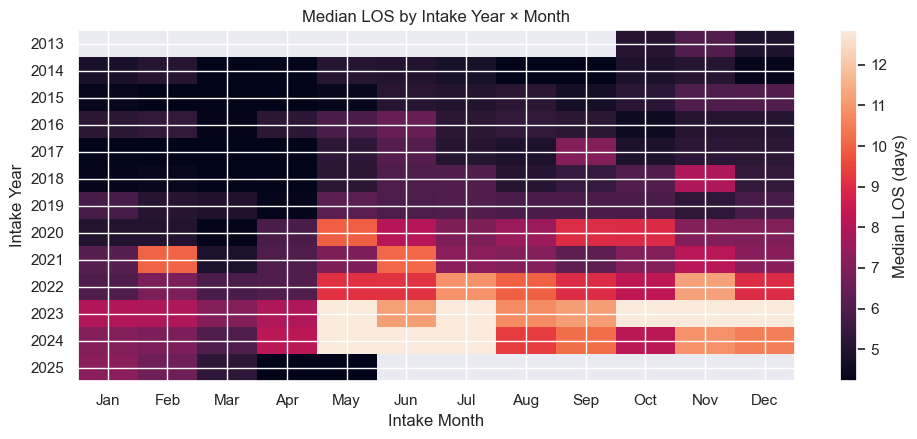

In [52]:
# === Calendar effects on Length of Stay (LOS) ===

try:
    base_df = final_df
except NameError:
    base_df = df

# Guard: required columns
_required = {"DurationDays", "Intake_Month", "Intake_DayOfWeek", "Intake_Season", "Intake_DateTime"}
missing = [c for c in _required if c not in base_df.columns]
if missing:
    raise ValueError(f"Missing expected columns for calendar EDA: {missing}")

cal = base_df.loc[:, ["DurationDays","Intake_Month","Intake_DayOfWeek","Intake_Season","Intake_DateTime"]].copy()
cal = cal.dropna(subset=["DurationDays"])

# 1) Monthly median LOS (with IQR band)

monthly = (
    cal.groupby("Intake_Month")["DurationDays"]
       .agg(median="median", p25=lambda s: s.quantile(0.25), p75=lambda s: s.quantile(0.75))
       .reindex(range(1, 13))
)
month_labels = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]

plt.figure(figsize=(8, 4.5))
plt.plot(range(1,13), monthly["median"].values, marker="o")
plt.fill_between(range(1,13), monthly["p25"].values, monthly["p75"].values, alpha=0.25, linewidth=0)
plt.xticks(range(1,13), month_labels, rotation=0)
plt.ylabel("Median LOS (days)")
plt.title("Calendar Effects: Median Length of Stay by Intake Month\n(shaded = IQR)")
plt.tight_layout()
plt.show()

# 2) Day-of-week median LOS (bar)

dow_order = list(range(7))
dow_labels = ["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]
dow = cal.groupby("Intake_DayOfWeek")["DurationDays"].median().reindex(dow_order)

plt.figure(figsize=(7.5, 4))
plt.bar(dow_labels, dow.values)
plt.ylabel("Median LOS (days)")
plt.title("Median LOS by Intake Day of Week")
plt.tight_layout()
plt.show()

# 3) Season median LOS (bar)

season_order = ["Winter","Spring","Summer","Fall"]
season = cal.groupby("Intake_Season")["DurationDays"].median().reindex(season_order)

plt.figure(figsize=(6.5, 4))
plt.bar(season.index.astype(str), season.values)
plt.ylabel("Median LOS (days)")
plt.title("Median LOS by Intake Season")
plt.tight_layout()
plt.show()

# 4) Year × Month median LOS (heatmap)

cal["Intake_Year"] = cal["Intake_DateTime"].dt.year
ym = pd.pivot_table(
    cal, index="Intake_Year", columns="Intake_Month", values="DurationDays", aggfunc="median"
).sort_index()


vmin = np.nanquantile(ym.values, 0.05)
vmax = np.nanquantile(ym.values, 0.95)

plt.figure(figsize=(10, max(4.5, 0.35 * ym.shape[0])))
im = plt.imshow(ym, aspect="auto", vmin=vmin, vmax=vmax)
plt.colorbar(im, label="Median LOS (days)")
plt.yticks(ticks=range(ym.shape[0]), labels=ym.index.astype(int))
plt.xticks(ticks=range(12), labels=month_labels, rotation=0)
plt.xlabel("Intake Month")
plt.ylabel("Intake Year")
plt.title("Median LOS by Intake Year × Month")
plt.tight_layout()
plt.show()


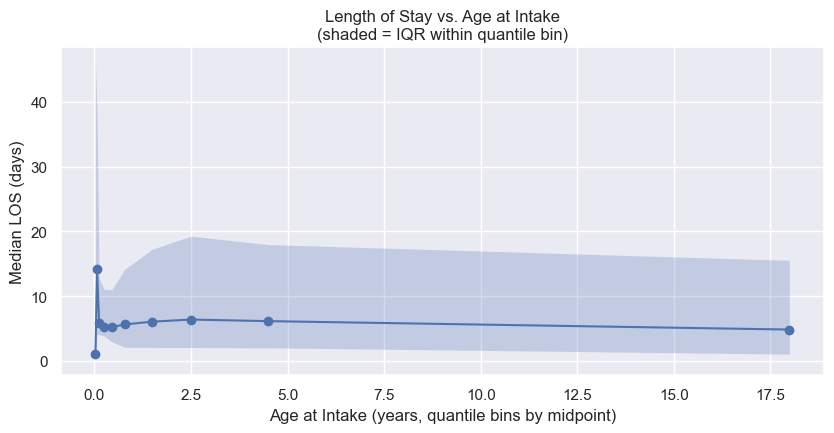

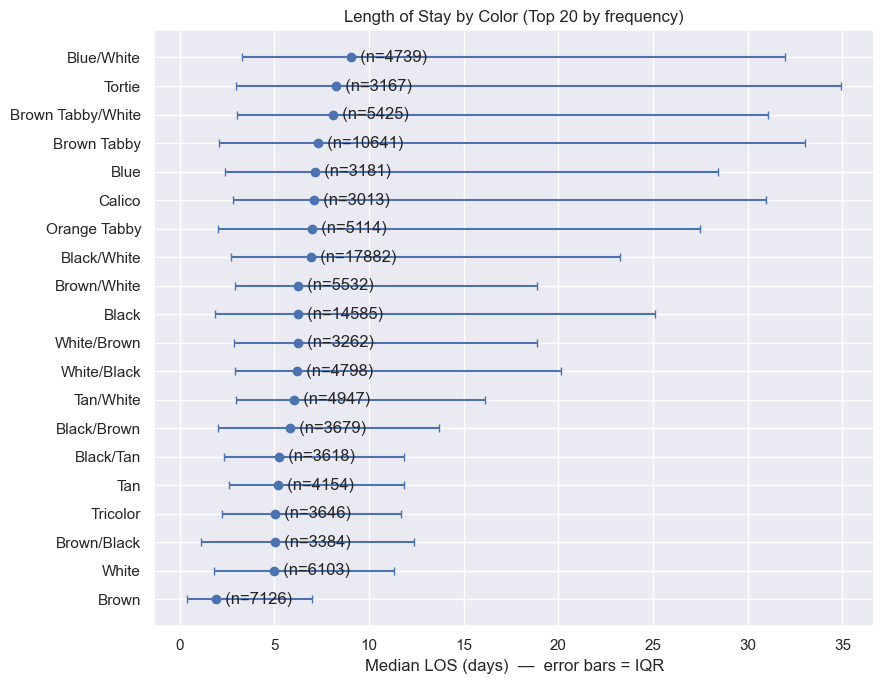

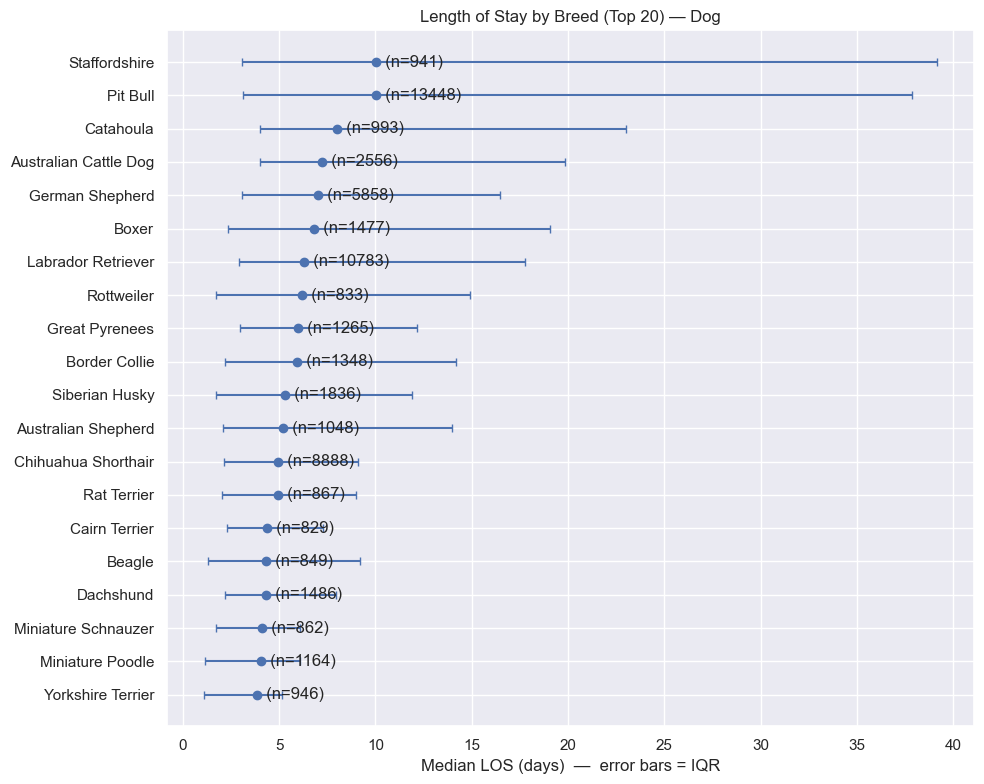

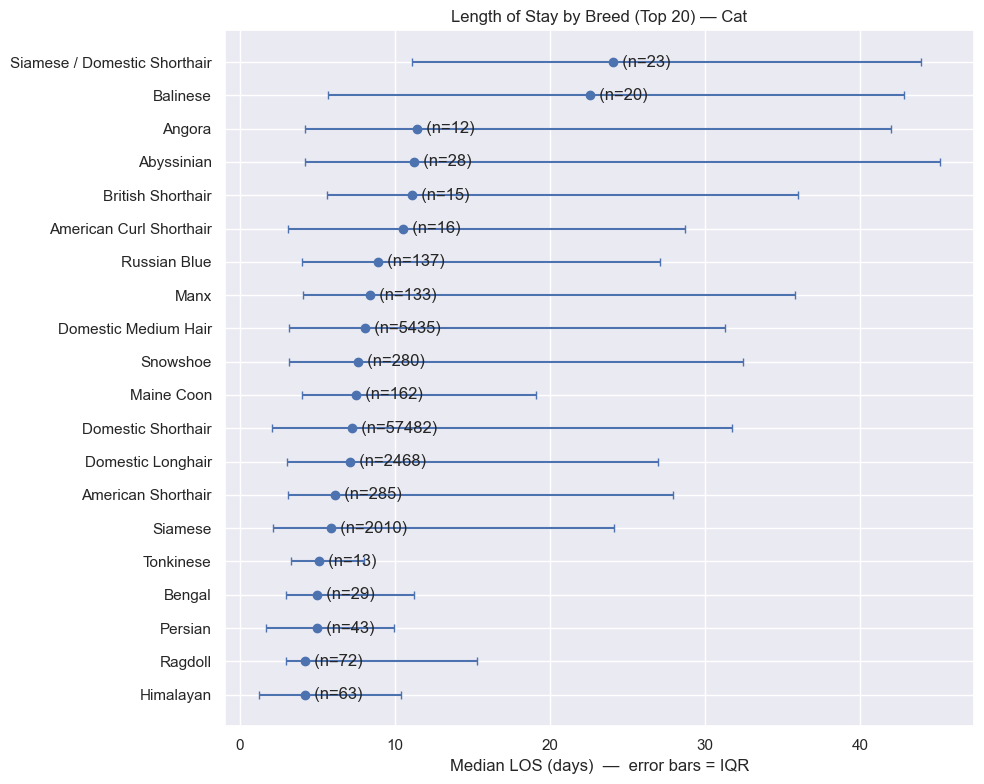

In [53]:
# === LOS vs Age-at-Intake, Color, and Breed ===

try:
    base_df = final_df
except NameError:
    base_df = df

req = {"DurationDays", "age_in_days_intake", "Color", "Breed"}
missing = [c for c in req if c not in base_df.columns]
if missing:
    raise ValueError(f"Missing expected columns: {missing}")

work = base_df.loc[:, ["DurationDays", "age_in_days_intake", "Color", "Breed", "Animal_Type"] \
                   if "Animal_Type" in base_df.columns else ["DurationDays", "age_in_days_intake", "Color", "Breed"]].copy()
work = work.dropna(subset=["DurationDays", "age_in_days_intake"])
work = work[(work["DurationDays"] >= 0) & (work["age_in_days_intake"] >= 0)]


# 1) LOS vs. Age at Intake (quantile-binned line with IQR band)

age = work.loc[:, ["DurationDays", "age_in_days_intake"]].copy()
age["age_years"] = age["age_in_days_intake"] / 365.25

# Build quantile bins (12 bins -> monthly-ish resolution without being noisy)
qgrid = np.linspace(0, 1, 13)
bins = np.unique(np.quantile(age["age_years"], qgrid))
# In case of duplicate quantiles (heavy mass at 0 etc.), drop duplicates via np.unique above
age["age_bin"] = pd.cut(age["age_years"], bins=bins, include_lowest=True, duplicates="drop")

age_summary = (
    age.groupby("age_bin")["DurationDays"]
       .agg(median="median",
            p25=lambda s: s.quantile(0.25),
            p75=lambda s: s.quantile(0.75),
            n="size")
       .reset_index()
)
# X positions = bin midpoints for a smooth line
def _midpoint(interval) -> float:
    return (interval.left + interval.right) / 2 if pd.api.types.is_interval(interval) else np.nan

age_summary["bin_mid"] = age_summary["age_bin"].apply(_midpoint)

plt.figure(figsize=(8.5, 4.5))
plt.plot(age_summary["bin_mid"], age_summary["median"], marker="o")
plt.fill_between(age_summary["bin_mid"], age_summary["p25"], age_summary["p75"], alpha=0.25, linewidth=0)
plt.xlabel("Age at Intake (years, quantile bins by midpoint)")
plt.ylabel("Median LOS (days)")
plt.title("Length of Stay vs. Age at Intake\n(shaded = IQR within quantile bin)")
plt.tight_layout()
plt.show()


# 2) LOS vs. Color (top-K; horizontal bars sorted by median)

K = 20  # adjust if you want more/less categories
top_colors = (work["Color"].fillna("unknown").value_counts().head(K).index)

color_df = (
    work[work["Color"].isin(top_colors)]
      .groupby("Color")["DurationDays"]
      .agg(median="median",
           p25=lambda s: s.quantile(0.25),
           p75=lambda s: s.quantile(0.75),
           n="size")
      .sort_values("median", ascending=False)
      .reset_index()
)

# Error bars: show IQR extent around the median (no box plots)
ypos = np.arange(len(color_df))
ylabels = color_df["Color"].astype(str)

err_low  = color_df["median"] - color_df["p25"]
err_high = color_df["p75"] - color_df["median"]
yerr = [err_low.values, err_high.values]

plt.figure(figsize=(9, max(5, 0.35 * len(color_df))))
plt.errorbar(color_df["median"], ypos, xerr=yerr, fmt="o", capsize=3)
plt.yticks(ypos, ylabels)
plt.gca().invert_yaxis()
plt.xlabel("Median LOS (days)  —  error bars = IQR")
plt.title(f"Length of Stay by Color (Top {K} by frequency)")
# optional counts on the right
for i, n in enumerate(color_df["n"].values):
    plt.text(color_df["median"].iloc[i], i, f"  (n={int(n)})", va="center", ha="left")
plt.tight_layout()
plt.show()

# 3) LOS vs. Breed (top-K; separate figures for Dogs and Cats if available)

def plot_breed_for_species(df, species_label=None, K=20):
    tmp = df.copy()
    if species_label is not None and "Animal_Type" in tmp.columns:
        tmp = tmp[tmp["Animal_Type"].str.lower() == species_label.lower()]
        subtitle = f"{species_label.title()}"
    else:
        subtitle = "All Species"

    # Defensive cleaning
    tmp["Breed"] = tmp["Breed"].fillna("unknown").astype(str).str.strip()

    top_breeds = tmp["Breed"].value_counts().head(K).index
    summ = (
        tmp[tmp["Breed"].isin(top_breeds)]
           .groupby("Breed")["DurationDays"]
           .agg(median="median",
                p25=lambda s: s.quantile(0.25),
                p75=lambda s: s.quantile(0.75),
                n="size")
           .sort_values("median", ascending=False)
           .reset_index()
    )

    ypos = np.arange(len(summ))
    err_low  = summ["median"] - summ["p25"]
    err_high = summ["p75"] - summ["median"]
    yerr = [err_low.values, err_high.values]

    plt.figure(figsize=(10, max(5, 0.4 * len(summ))))
    plt.errorbar(summ["median"], ypos, xerr=yerr, fmt="o", capsize=3)
    plt.yticks(ypos, summ["Breed"].astype(str))
    plt.gca().invert_yaxis()
    plt.xlabel("Median LOS (days)  —  error bars = IQR")
    plt.title(f"Length of Stay by Breed (Top {K}) — {subtitle}")
    for i, n in enumerate(summ["n"].values):
        plt.text(summ["median"].iloc[i], i, f"  (n={int(n)})", va="center", ha="left")
    plt.tight_layout()
    plt.show()

# Render breed plots
if "Animal_Type" in work.columns:
    plot_breed_for_species(work, species_label="dog", K=20)
    plot_breed_for_species(work, species_label="cat", K=20)
else:
    plot_breed_for_species(work, species_label=None, K=20)


In [54]:
# has_name: 1 if a real name appears; 0 if unknown/blank
final_df['has_name'] = (
    final_df['Name'].astype(str).str.strip().str.lower()
      .replace({'': np.nan, 'unknown': np.nan, 'unnamed': np.nan, 'no name': np.nan})
      .notna()
).astype('Int64')
final_df = final_df.drop(columns=['Name'], errors='ignore')

In [55]:
# --- Raw unique colors (just to see what's in there) ---
raw_unique_colors = (final_df.get('Color')
                     .dropna()
                     .astype(str)
                     .str.strip()
                     .unique()
                    )
print(f"Raw unique colors (count={len(raw_unique_colors)}):")
print(sorted(raw_unique_colors))

Raw unique colors (count=660):
['Agouti', 'Agouti/Brown Tabby', 'Agouti/Cream', 'Agouti/Gold', 'Agouti/Gray', 'Agouti/White', 'Apricot', 'Apricot/Brown', 'Apricot/Tricolor', 'Apricot/White', 'Black', 'Black Brindle', 'Black Brindle/Black', 'Black Brindle/Blue', 'Black Brindle/Blue Tick', 'Black Brindle/Brown', 'Black Brindle/Brown Brindle', 'Black Brindle/Tan', 'Black Brindle/White', 'Black Brindle/Yellow', 'Black Smoke', 'Black Smoke/Black', 'Black Smoke/Black Tabby', 'Black Smoke/Black Tiger', 'Black Smoke/Blue Tick', 'Black Smoke/Brown', 'Black Smoke/Brown Tabby', 'Black Smoke/Chocolate', 'Black Smoke/Gray', 'Black Smoke/White', 'Black Tabby', 'Black Tabby/Black', 'Black Tabby/Black Smoke', 'Black Tabby/Brown', 'Black Tabby/Gray', 'Black Tabby/Gray Tabby', 'Black Tabby/Orange', 'Black Tabby/White', 'Black Tiger', 'Black Tiger/White', 'Black/Black', 'Black/Black Brindle', 'Black/Black Smoke', 'Black/Black Tabby', 'Black/Blue', 'Black/Blue Merle', 'Black/Blue Tick', 'Black/Brown', 'Bl

,Breed,Count
0,Domestic Shorthair Mix,33656
1,Domestic Shorthair,24186
2,Pit Bull Mix,10089
3,Labrador Retriever Mix,8806
4,Chihuahua Shorthair Mix,6888
...,...,...
95,Cardigan Welsh Corgi Mix,170
96,Pomeranian Mix,166
97,Chinese Sharpei Mix,164
98,Cocker Spaniel Mix,161


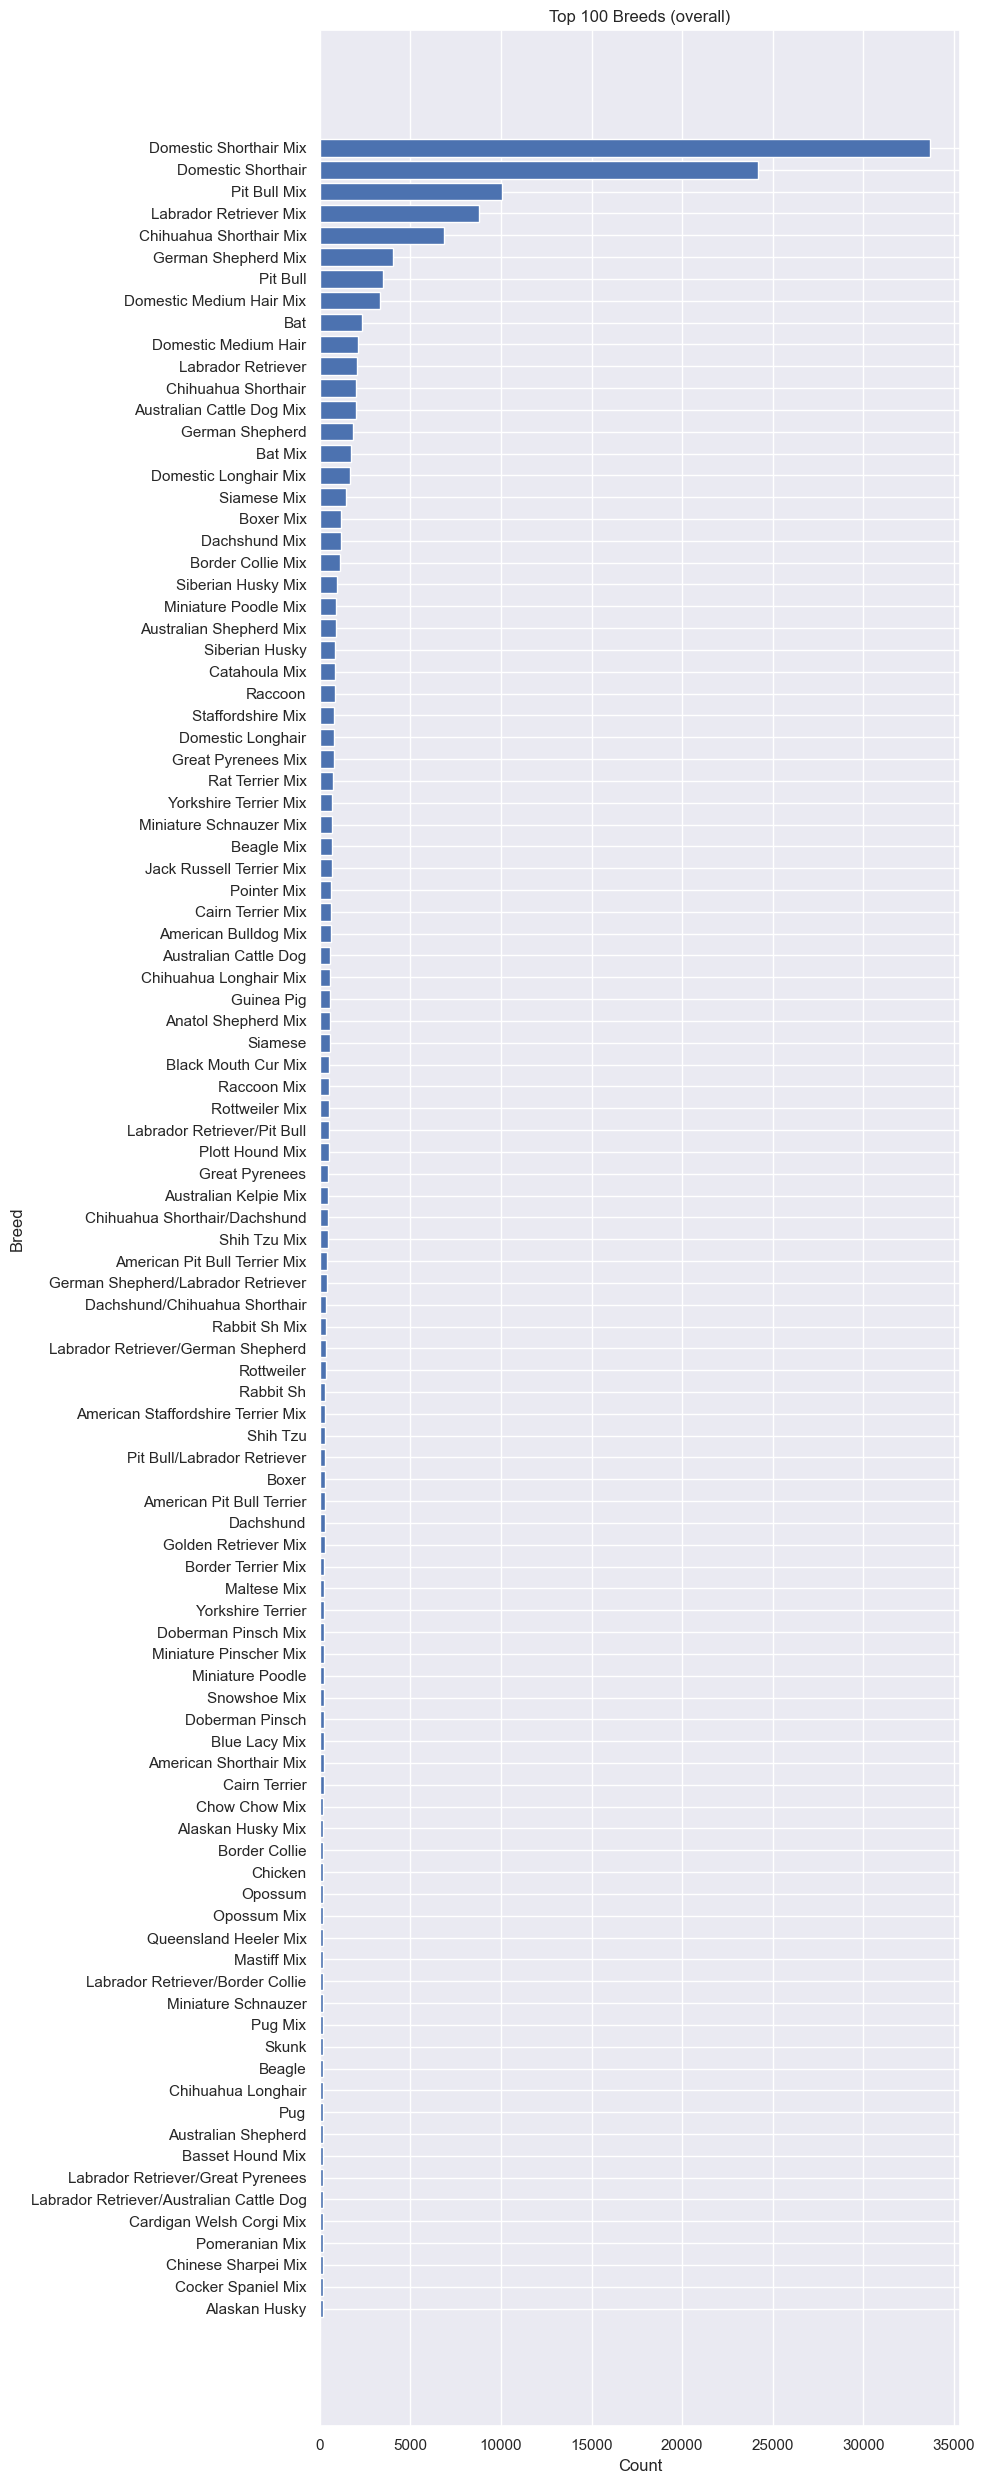

In [56]:
K = 100

breeds_series = (
    intakes_df['Breed']
    .dropna()
    .astype(str)
    .str.strip()
)

top_overall = breeds_series.value_counts().head(K).reset_index()
top_overall.columns = ['Breed', 'Count']

# quick table peek
display(top_overall)

# horizontal bar chart
plt.figure(figsize=(10, max(4, K*0.25)))
plt.barh(top_overall['Breed'][::-1], top_overall['Count'][::-1])
plt.xlabel('Count')
plt.ylabel('Breed')
plt.title(f'Top {K} Breeds (overall)')
plt.tight_layout()
plt.show()


,Breed,Count
0,Domestic Shorthair,57482
1,Pit Bull,13448
2,Labrador Retriever,10783
3,Chihuahua Shorthair,8888
4,German Shepherd,5858
5,Domestic Medium Hair,5435
6,Bat,4109
7,Australian Cattle Dog,2556
8,Domestic Longhair,2468
9,Siamese,2010


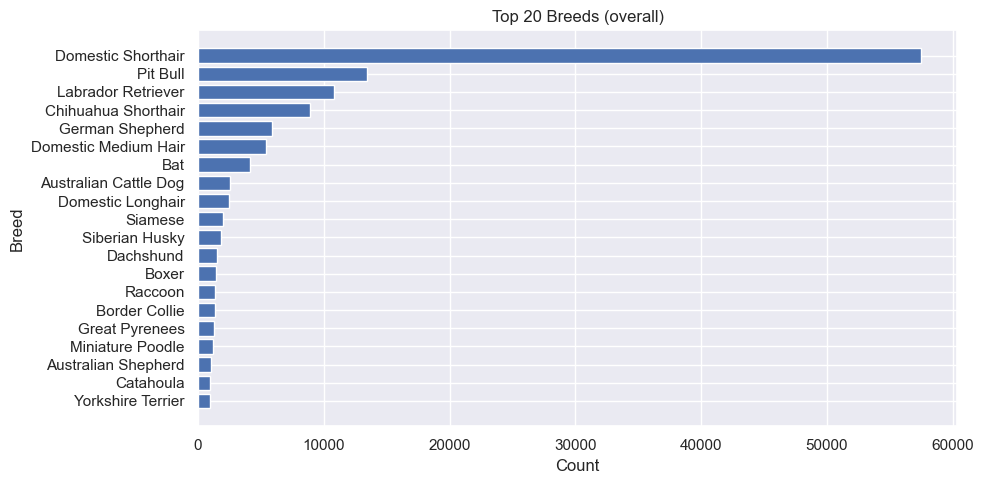

In [57]:
K = 20

breeds_series = (
    final_df['Breed']
    .dropna()
    .astype(str)
    .str.strip()
)

top_overall = breeds_series.value_counts().head(K).reset_index()
top_overall.columns = ['Breed', 'Count']

# quick table peek
display(top_overall)

# horizontal bar chart
plt.figure(figsize=(10, max(4, K*0.25)))
plt.barh(top_overall['Breed'][::-1], top_overall['Count'][::-1])
plt.xlabel('Count')
plt.ylabel('Breed')
plt.title(f'Top {K} Breeds (overall)')
plt.tight_layout()
plt.show()



Top 80 breeds — Dog


,Breed,Count
0,Pit Bull,13448
1,Labrador Retriever,10783
2,Chihuahua Shorthair,8888
3,German Shepherd,5858
4,Australian Cattle Dog,2556
...,...,...
75,Wire Hair Fox Terrier,133
76,Redbone Hound,133
77,Siberian Husky / German Shepherd,129
78,Pit Bull / Boxer,124


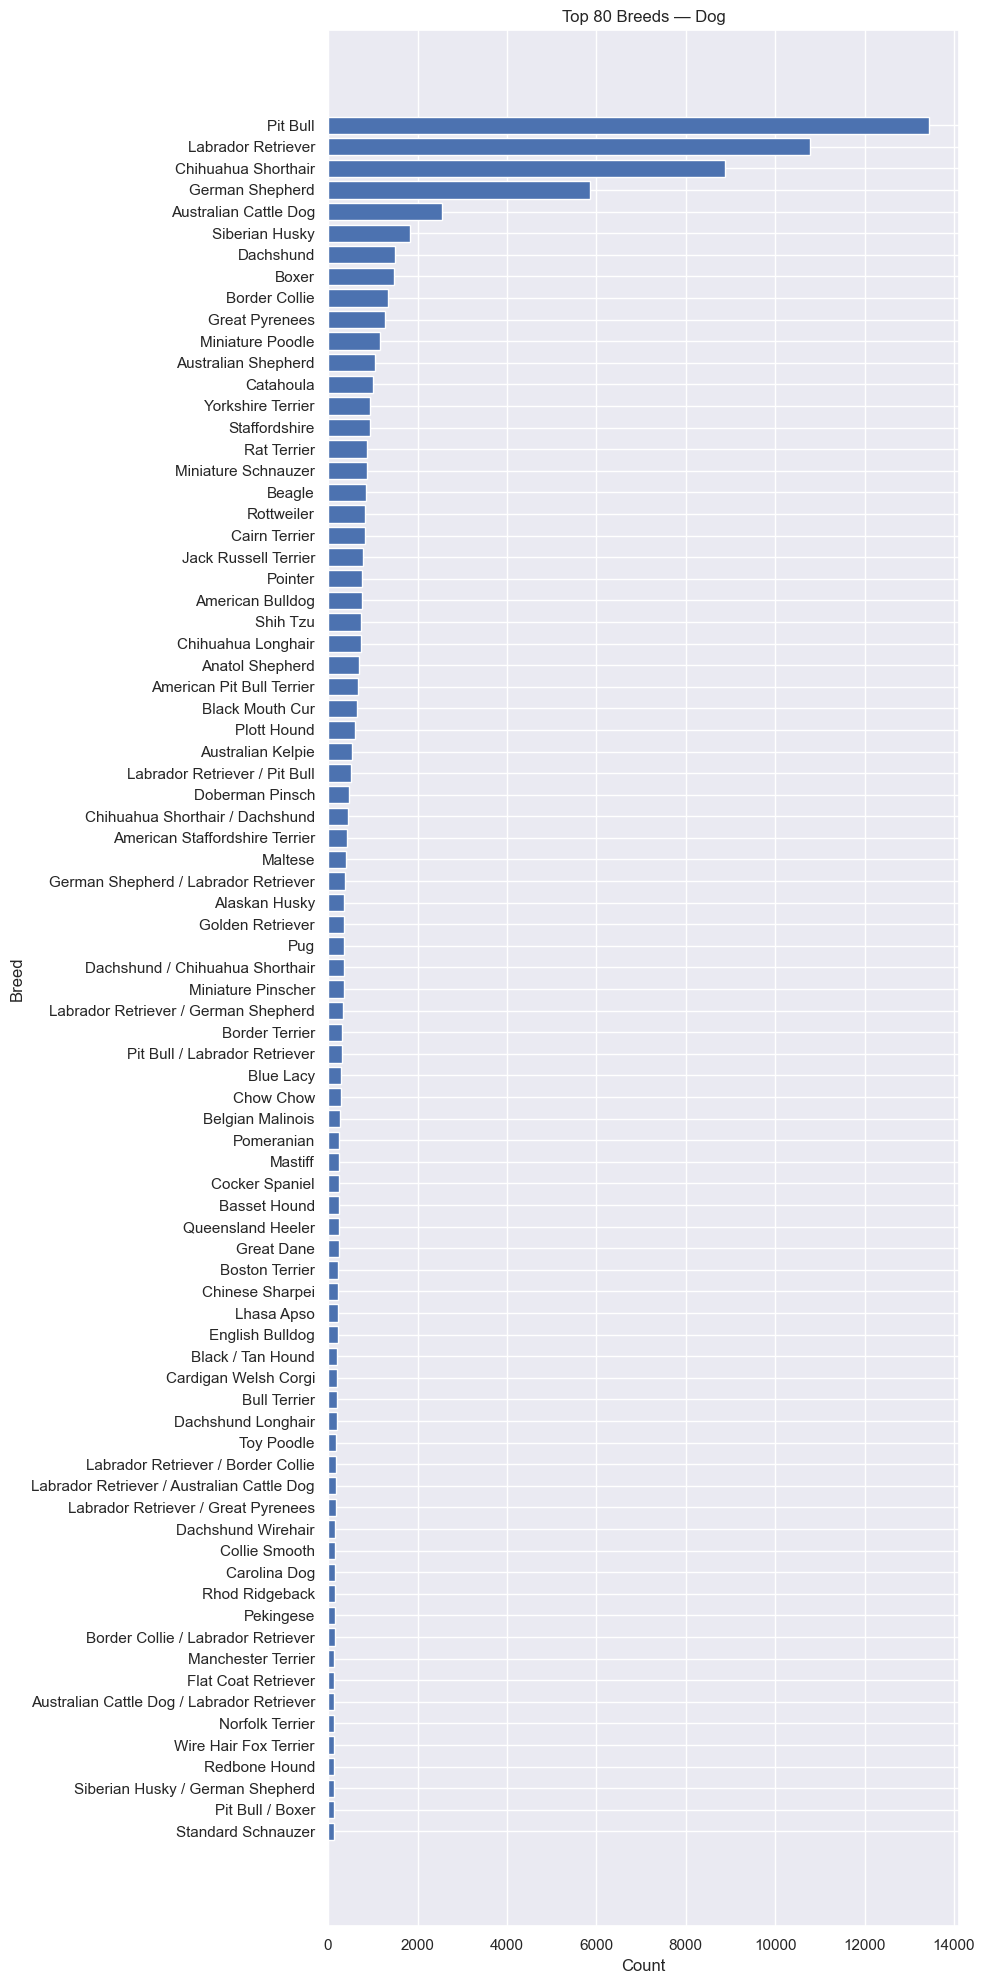


Top 80 breeds — Cat


,Breed,Count
0,Domestic Shorthair,57482
1,Domestic Medium Hair,5435
2,Domestic Longhair,2468
3,Siamese,2010
4,American Shorthair,285
...,...,...
75,Domestic Shorthair / Maine Coon,1
76,Ocicat,1
77,American Wirehair,1
78,Manx / Siamese,1


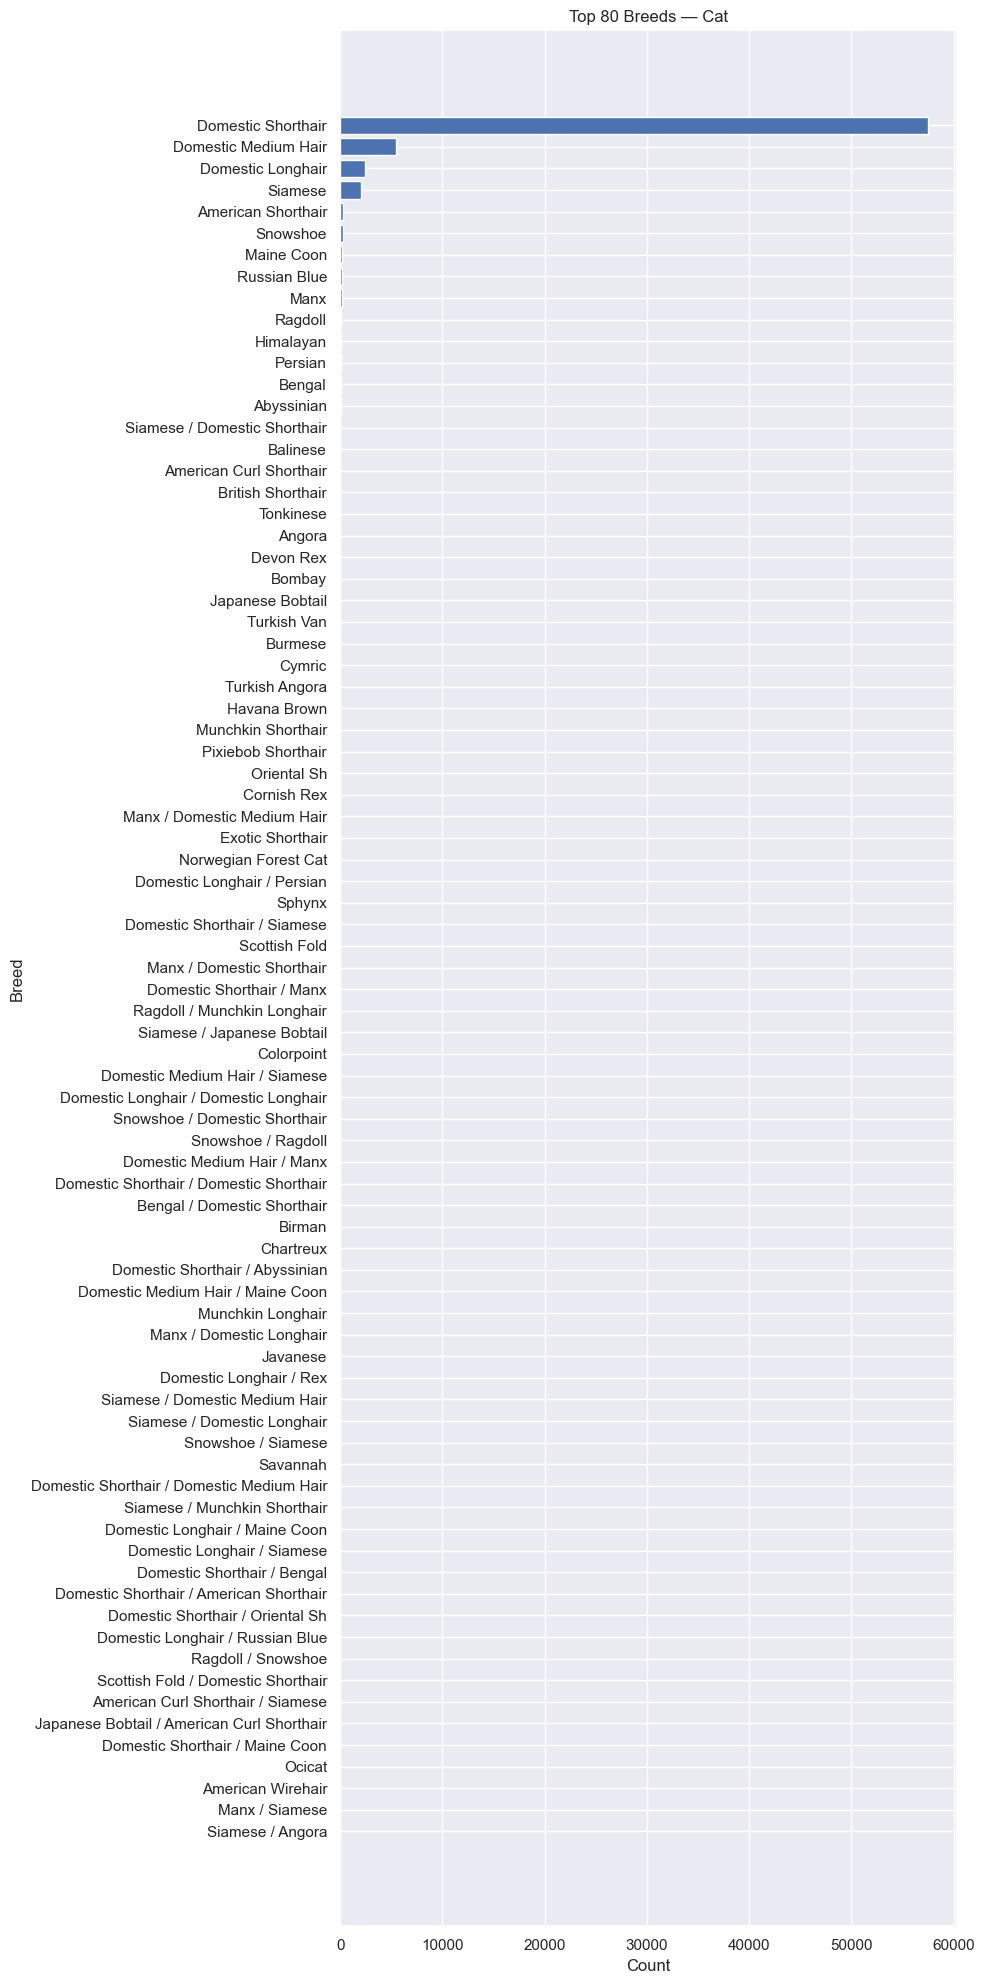

In [58]:
# ---- params ----
K = 80  # top-K per species
species_col = "Animal_Type"
breed_col   = "Breed"

# safety checks
assert species_col in final_df.columns, f"Missing column: {species_col}"
assert breed_col   in final_df.columns, f"Missing column: {breed_col}"

# prep (read-only)
df = final_df.dropna(subset=[species_col, breed_col]).copy()
df["__breed_tmp__"] = df[breed_col].astype(str).str.strip()
df["__species_tmp__"] = df[species_col].astype(str).str.strip()

def plot_top_k_for_species(df, species_value, K=20):
    sub = df[df["__species_tmp__"] == species_value]
    if sub.empty:
        print(f"No rows for species '{species_value}'.")
        return

    top = sub["__breed_tmp__"].value_counts().head(K).reset_index()
    top.columns = ["Breed", "Count"]

    # table preview
    print(f"\nTop {K} breeds — {species_value}")
    display(top)

    # horizontal bar chart
    plt.figure(figsize=(10, max(4, len(top)*0.25)))
    plt.barh(top["Breed"][::-1], top["Count"][::-1])
    plt.xlabel("Count")
    plt.ylabel("Breed")
    plt.title(f"Top {K} Breeds — {species_value}")
    plt.tight_layout()
    plt.show()

# plots
plot_top_k_for_species(df, "Dog", K=K)
plot_top_k_for_species(df, "Cat", K=K)


,Animal_Type,Episodes,Percent,CumPercent
0,Dog,94025,0.54,0.54
1,Cat,68917,0.40,0.94
2,Other,8948,0.05,0.99
3,Bird,877,0.01,1.00
4,Livestock,33,0.00,1.00


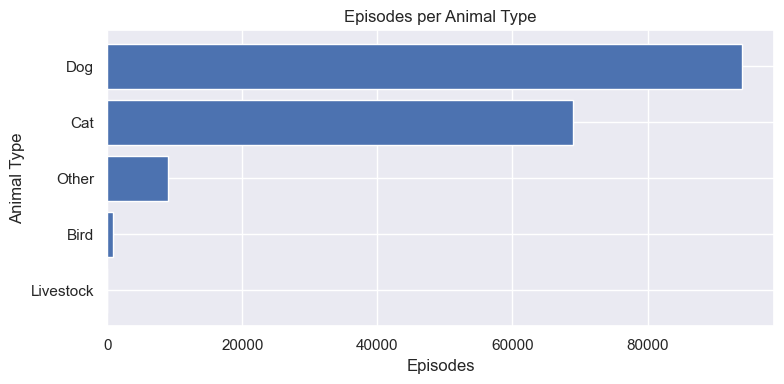

In [59]:
species_col = "Animal_Type"
assert species_col in final_df.columns, f"Missing column: {species_col}"

# Counts, percent, cumulative percent
counts = (final_df[species_col]
          .fillna("Unknown")
          .value_counts()
          .rename_axis("Animal_Type")
          .reset_index(name="Episodes"))
counts["Percent"] = counts["Episodes"] / len(final_df)
counts["CumPercent"] = counts["Percent"].cumsum()

display(counts)

# Horizontal bar chart
plt.figure(figsize=(8, max(4, 0.35*len(counts))))
plt.barh(counts["Animal_Type"][::-1], counts["Episodes"][::-1])
plt.xlabel("Episodes")
plt.ylabel("Animal Type")
plt.title("Episodes per Animal Type")
plt.tight_layout()
plt.show()


In [60]:
model_df = final_df.copy()

# OUTCOME-derived columns to drop

OUTCOME_COLS = [
    # canonical outcome fields
    "Outcome_DateTime",
    "Outcome_Type",
    "Outcome_Subtype",
    "Outcome_SpayNeuter",

    # calendar derived from outcome
    "Outcome_Month",
    "Outcome_DayOfWeek",
    "Outcome_Season",
    "Outcome_Season_Code",

    # age derived from outcome
    "age_in_days_outcome",
    "age_group_outcome"

]

to_drop = [c for c in OUTCOME_COLS if c in model_df.columns]
model_df = model_df.drop(columns=to_drop).copy()

print("Dropped outcome-derived columns:")
print(sorted(to_drop))


Dropped outcome-derived columns:
['Outcome_DateTime', 'Outcome_DayOfWeek', 'Outcome_Month', 'Outcome_Season', 'Outcome_Season_Code', 'Outcome_SpayNeuter', 'Outcome_Subtype', 'Outcome_Type', 'age_group_outcome', 'age_in_days_outcome']


In [61]:
# keep only Dogs & Cats for modeling

model_df = model_df[model_df["Animal_Type"].isin(["Dog", "Cat"])].copy()

# Split into Dog and Cat DataFrames

dog_df = model_df[model_df["Animal_Type"] == "Dog"].copy()
cat_df = model_df[model_df["Animal_Type"] == "Cat"].copy()

print(f"model_df shape (Dog+Cat): {model_df.shape}")
print(f"dog_df shape: {dog_df.shape}")
print(f"cat_df shape: {cat_df.shape}")


model_df shape (Dog+Cat): (162942, 18)
dog_df shape: (94025, 18)
cat_df shape: (68917, 18)


In [62]:
# quick sanity peek of remaining columns

print("\nRemaining columns (sample):")
print(sorted(model_df.columns.tolist()))


Remaining columns (sample):
['Animal ID', 'Animal_Type', 'Breed', 'Breed_Is_Mix', 'Color', 'DurationDays', 'Gender', 'Intake_Condition', 'Intake_DateTime', 'Intake_DayOfWeek', 'Intake_Month', 'Intake_Season', 'Intake_Season_Code', 'Intake_SpayNeuter', 'Intake_Type', 'age_group_intake', 'age_in_days_intake', 'has_name']


In [63]:
# Unique values per column in cat_df and dog_df


unique_counts = cat_df.nunique(dropna=True)
summary = (pd.DataFrame({
    "unique_count_excl_NA": unique_counts,
    "dtype": cat_df.dtypes.astype(str)
}).sort_values("unique_count_excl_NA", ascending=False))

print(summary.to_string())

unique_counts = dog_df.nunique(dropna=True)
summary = (pd.DataFrame({
    "unique_count_excl_NA": unique_counts,
    "dtype": dog_df.dtypes.astype(str)
}).sort_values("unique_count_excl_NA", ascending=False))

print(summary.to_string())

                    unique_count_excl_NA           dtype
Animal ID                          65861          object
Intake_DateTime                    39373  datetime64[ns]
DurationDays                       34190         float64
Color                                327          object
Breed                                 83          object
age_in_days_intake                    44           int64
Intake_Condition                      18          object
Intake_Month                          12           int32
Intake_DayOfWeek                       7           int32
Intake_Type                            5          object
age_group_intake                       4          object
Intake_Season                          4          object
Intake_Season_Code                     4           int64
Intake_SpayNeuter                      3          object
Gender                                 3          object
Breed_Is_Mix                           2           Int64
has_name                       

In [64]:

# Config: base colors & patterns

BASE_COLORS = [
    "black","white","brown","tan","gray","blue","red","fawn",
    "cream","yellow","gold","buff","orange","chocolate","liver","silver",
    "apricot", "lilac"
]
COLOR_ALIASES = {
    "grey": "gray",
    "golden": "gold",
}

PATTERNS = {
    # pattern : list of trigger phrases (lowercase)
    "Tabby":    ["tabby", "tiger"],
    "Brindle":  ["brindle"],
    "Merle":    ["merle"],
    "Tortie":   ["tortie"],
    "Torbie":   ["torbie"],
    "Calico":   ["calico"],
    # Expand Point to also match common tokens even if "point" is omitted
    "Point":    ["seal point", "lynx point", "flame point", "lilac point", "blue point", "point",
                 "lynx", "seal", "flame", "lilac"],
    "Tick":     ["tick"],      # catches 'red tick', 'blue tick', 'ticked'
    "Smoke":    ["smoke"],
    "Sable":    ["sable"],
    "Tricolor": ["tricolor", "tri color", "tri-color"],
}

def _get_color_text(df):
    """Pick Intake_Color if present else Color; returns a normalized lowercase Series."""
    if "Intake_Color" in df.columns:
        s = df["Intake_Color"].fillna("")
    elif "Color" in df.columns:
        s = df["Color"].fillna("")
    else:
        return pd.Series([""] * len(df), index=df.index, dtype=object)

    s = s.astype(str).str.lower()
    # normalize aliases (e.g., grey -> gray, golden -> gold)
    for src, dst in COLOR_ALIASES.items():
        s = s.str.replace(rf"\b{src}\b", dst, regex=True)
    return s

def add_color_pattern_booleans(df):
    """Adds one boolean column per base color and per pattern. Leaves all existing columns untouched."""
    df = df.copy()

    if not (("Intake_Color" in df.columns) or ("Color" in df.columns)):
        return df  # nothing to do

    s = _get_color_text(df)

    # Color booleans
    for col in BASE_COLORS:
        df[f"Color_{col.title()}"] = s.str.contains(rf"\b{col}\b", regex=True).astype("Int64")

    # Pattern booleans =
    for pat, triggers in PATTERNS.items():
        escaped = [re.escape(t) for t in triggers]
        regex = "|".join(escaped)
        df[f"Pattern_{pat}"] = s.str.contains(regex, regex=True).astype("Int64")

    return df

# Apply to split frames
cat_df = add_color_pattern_booleans(cat_df)
dog_df = add_color_pattern_booleans(dog_df)

# quick sanity check
def coverage_report(df, label):
    color_cols = [c for c in df.columns if c.startswith("Color_")]
    pattern_cols = [c for c in df.columns if c.startswith("Pattern_")]
    if len(df) == 0:
        print(f"{label}: empty")
        return
    any_color = (df[color_cols].fillna(0).astype(int).sum(axis=1) > 0).mean() if color_cols else 0
    any_pattern = (df[pattern_cols].fillna(0).astype(int).sum(axis=1) > 0).mean() if pattern_cols else 0
    print(f"{label}: matched any base color in {any_color:.0%} of rows; any pattern in {any_pattern:.0%} of rows")
    if color_cols:
        print(f"{label}: top colors\n", df[color_cols].mean().sort_values(ascending=False).head(8))
    if pattern_cols:
        print(f"{label}: top patterns\n", df[pattern_cols].mean().sort_values(ascending=False).head(8))

coverage_report(cat_df, "Cats")
coverage_report(dog_df, "Dogs")


Cats: matched any base color in 85% of rows; any pattern in 66% of rows
Cats: top colors
 Color_White    0.35
Color_Black    0.25
Color_Brown    0.25
Color_Blue     0.13
Color_Orange   0.12
Color_Cream    0.03
Color_Gray     0.02
Color_Silver   0.00
dtype: Float64
Cats: top patterns
 Pattern_Tabby      0.47
Pattern_Tortie     0.05
Pattern_Calico     0.05
Pattern_Point      0.04
Pattern_Torbie     0.04
Pattern_Smoke      0.00
Pattern_Tricolor   0.00
Pattern_Brindle    0.00
dtype: Float64
Dogs: matched any base color in 96% of rows; any pattern in 16% of rows
Dogs: top colors
 Color_White       0.54
Color_Black       0.36
Color_Brown       0.28
Color_Tan         0.20
Color_Blue        0.06
Color_Red         0.05
Color_Chocolate   0.03
Color_Gray        0.02
dtype: Float64
Dogs: top patterns
 Pattern_Brindle    0.07
Pattern_Tricolor   0.05
Pattern_Merle      0.02
Pattern_Sable      0.01
Pattern_Tick       0.01
Pattern_Tabby      0.00
Pattern_Smoke      0.00
Pattern_Calico     0.00
dtype: 

In [65]:
import re

def unmatched_tokens_report(df, n=20):
    s = (df["Intake_Color"] if "Intake_Color" in df.columns else df["Color"]).fillna("").astype(str).str.lower()
    for src, dst in COLOR_ALIASES.items():
        s = s.str.replace(rf"\b{src}\b", dst, regex=True)

    # tokens in any row with no color match yet
    color_cols = [c for c in df.columns if c.startswith("Color_")]
    no_match = df[color_cols].fillna(0).sum(axis=1).eq(0)
    tokens = s[no_match].str.replace("/", " ", regex=False).str.findall(r"[a-z]+")
    vc = pd.Series([t for row in tokens for t in row]).value_counts()

    # hide things we already intentionally handle as patterns
    pattern_triggers = set(t for lst in PATTERNS.values() for t in lst)
    known = set(BASE_COLORS) | pattern_triggers | set(COLOR_ALIASES.keys())
    print(vc[~vc.index.isin(known)].head(n))

print("Cats unmatched tokens:")
unmatched_tokens_report(cat_df)
print("\nDogs unmatched tokens:")
unmatched_tokens_report(dog_df)


Cats unmatched tokens:
agouti    21
pink       2
ruddy      1
green      1
Name: count, dtype: int64

Dogs unmatched tokens:
agouti    4
Name: count, dtype: int64


In [66]:

from typing import Optional

#  helpers
def topk_by_coverage(series: pd.Series, *, target: float = 0.80, min_k: int = 0, max_k: Optional[int] = None) -> list:
    """
    Return the Top-K categories from `series` such that cumulative frequency >= target,
    but at least `min_k`. If max_k is set, cap K at max_k.
    """
    vc = series.value_counts(dropna=True)
    if vc.empty:
        return []
    cum = (vc / vc.sum()).cumsum().values
    k_target = int(np.searchsorted(cum, target, side="left") + 1)
    k = max(min_k, k_target)
    if max_k is not None:
        k = min(k, max_k)
    k = min(k, len(vc))  # don't exceed unique count
    return vc.index[:k].tolist()

def make_topk_grouped(series: pd.Series, top_values: list, other_label: str = "Other") -> pd.Series:
    """Keep Top-K labels, map the rest to 'Other'. Returns an ordered categorical."""
    s = series.copy()
    grouped = s.where(s.isin(top_values), other_label)
    cats = list(top_values) + [other_label]
    return grouped.astype(pd.CategoricalDtype(categories=cats, ordered=False))

def report_topk(series: pd.Series, top_values: list, label: str):
    coverage = series.isin(top_values).mean() if len(series) else 0.0
    print(f"{label}: K={len(top_values)} | coverage={coverage:.0%} | first 10: {top_values[:10]}")

#  species-specific settings
TARGET_CATS = 0.85
TARGET_DOGS = 0.82
MIN_K_CATS  = 10
MIN_K_DOGS  = 60
MAXK_CATS   = 30
MAXK_DOGS   = 130

# safety checks
assert "Breed" in cat_df.columns and "Breed" in dog_df.columns, "Both frames must have a 'Breed' column."

# choose Top-K per species
cat_top = topk_by_coverage(cat_df["Breed"], target=TARGET_CATS, min_k=MIN_K_CATS, max_k=MAXK_CATS)
dog_top = topk_by_coverage(dog_df["Breed"], target=TARGET_DOGS, min_k=MIN_K_DOGS, max_k=MAXK_DOGS)

report_topk(cat_df["Breed"], cat_top, "Cats")
report_topk(dog_df["Breed"], dog_top, "Dogs")

# create grouped categorical columns (original Breed untouched)
cat_df["Breed_TopK"] = make_topk_grouped(cat_df["Breed"], cat_top, other_label="Other")
dog_df["Breed_TopK"] = make_topk_grouped(dog_df["Breed"], dog_top, other_label="Other")

# quick sanity peek
display(cat_df[["Breed","Breed_TopK"]].head(10))
display(dog_df[["Breed","Breed_TopK"]].head(10))



Cats: K=10 | coverage=99% | first 10: ['Domestic Shorthair', 'Domestic Medium Hair', 'Domestic Longhair', 'Siamese', 'American Shorthair', 'Snowshoe', 'Maine Coon', 'Russian Blue', 'Manx', 'Ragdoll']
Dogs: K=78 | coverage=82% | first 10: ['Pit Bull', 'Labrador Retriever', 'Chihuahua Shorthair', 'German Shepherd', 'Australian Cattle Dog', 'Siberian Husky', 'Dachshund', 'Boxer', 'Border Collie', 'Great Pyrenees']


,Breed,Breed_TopK
11,Domestic Longhair,Domestic Longhair
12,American Shorthair,American Shorthair
17,Domestic Shorthair,Domestic Shorthair
21,Snowshoe,Snowshoe
28,Domestic Shorthair,Domestic Shorthair
31,Domestic Shorthair,Domestic Shorthair
37,Domestic Shorthair,Domestic Shorthair
42,Domestic Shorthair,Domestic Shorthair
43,Domestic Longhair,Domestic Longhair
46,Domestic Shorthair,Domestic Shorthair


,Breed,Breed_TopK
0,Spinone Italiano,Other
1,Spinone Italiano,Other
2,Spinone Italiano,Other
3,Dachshund,Dachshund
4,Shetland Sheepdog,Other
5,Labrador Retriever / Pit Bull,Labrador Retriever / Pit Bull
6,Miniature Schnauzer,Miniature Schnauzer
7,Lhasa Apso,Lhasa Apso
9,Shetland Sheepdog,Other
10,Shetland Sheepdog,Other


In [67]:
# Unique values per column in cat_df and dog_df


unique_counts = cat_df.nunique(dropna=True)
summary = (pd.DataFrame({
    "unique_count_excl_NA": unique_counts,
    "dtype": cat_df.dtypes.astype(str)
}).sort_values("unique_count_excl_NA", ascending=False))

print(summary.to_string())

unique_counts = dog_df.nunique(dropna=True)
summary = (pd.DataFrame({
    "unique_count_excl_NA": unique_counts,
    "dtype": dog_df.dtypes.astype(str)
}).sort_values("unique_count_excl_NA", ascending=False))

print(summary.to_string())

                    unique_count_excl_NA           dtype
Animal ID                          65861          object
Intake_DateTime                    39373  datetime64[ns]
DurationDays                       34190         float64
Color                                327          object
Breed                                 83          object
age_in_days_intake                    44           int64
Intake_Condition                      18          object
Intake_Month                          12           int32
Breed_TopK                            11        category
Intake_DayOfWeek                       7           int32
Intake_Type                            5          object
age_group_intake                       4          object
Intake_Season                          4          object
Intake_Season_Code                     4           int64
Intake_SpayNeuter                      3          object
Gender                                 3          object
Breed_Is_Mix                   

In [68]:
def drop_constant_cols(df: pd.DataFrame, verbose=True):
    nunq = df.nunique(dropna=True)
    const_cols = nunq[nunq <= 1].index.tolist()
    if const_cols and verbose:
        print(f"Dropping constant cols: {const_cols}")
    return df.drop(columns=const_cols, errors="ignore")

dog_df = drop_constant_cols(dog_df)
cat_df = drop_constant_cols(cat_df)


Dropping constant cols: ['Animal_Type', 'Color_Lilac', 'Pattern_Torbie', 'Pattern_Point']
Dropping constant cols: ['Animal_Type']


In [69]:
# Unique values per column in cat_df and dog_df


unique_counts = cat_df.nunique(dropna=True)
summary = (pd.DataFrame({
    "unique_count_excl_NA": unique_counts,
    "dtype": cat_df.dtypes.astype(str)
}).sort_values("unique_count_excl_NA", ascending=False))

print(summary.to_string())

unique_counts = dog_df.nunique(dropna=True)
summary = (pd.DataFrame({
    "unique_count_excl_NA": unique_counts,
    "dtype": dog_df.dtypes.astype(str)
}).sort_values("unique_count_excl_NA", ascending=False))

print(summary.to_string())

                    unique_count_excl_NA           dtype
Animal ID                          65861          object
Intake_DateTime                    39373  datetime64[ns]
DurationDays                       34190         float64
Color                                327          object
Breed                                 83          object
age_in_days_intake                    44           int64
Intake_Condition                      18          object
Intake_Month                          12           int32
Breed_TopK                            11        category
Intake_DayOfWeek                       7           int32
Intake_Type                            5          object
Intake_Season                          4          object
Intake_Season_Code                     4           int64
age_group_intake                       4          object
Gender                                 3          object
Intake_SpayNeuter                      3          object
Breed_Is_Mix                   

                    unique_count_excl_NA           dtype
Animal ID                          79742          object
Intake_DateTime                    73669  datetime64[ns]
DurationDays                       36503         float64
Breed                               2469          object
Color                                400          object
Breed_TopK                            79        category
age_in_days_intake                    45           int64
Intake_Condition                      18          object
Intake_Month                          12           int32
Intake_DayOfWeek                       7           int32
Intake_Type                            6          object
age_group_intake                       4          object
Intake_Season                          4          object
Intake_Season_Code                     4           int64
Intake_SpayNeuter                      3          object
Gender                                 3          object
Breed_Is_Mix                   

In [70]:
print("Unique values for columns in cat_df:")
for col in cat_df.columns:
    print(f"Unique values for column: {col}")
    unique_values = cat_df[col].unique()
    if len(unique_values) > 50:
        print(unique_values[:50])
        print(f"... and {len(unique_values) - 50} more unique values.")
    else:
        print(unique_values)
    print("-" * 50)



Unique values for columns in cat_df:
Unique values for column: Animal ID
['A191351' 'A197810' 'A214991' 'A221174' 'A234161' 'A243903' 'A251268'
 'A258441' 'A260631' 'A261770' 'A276644' 'A279045' 'A282897' 'A283495'
 'A287217' 'A290917' 'A292482' 'A293138' 'A293383' 'A295822' 'A301824'
 'A302868' 'A304036' 'A307592' 'A310938' 'A312005' 'A317673' 'A317744'
 'A318574' 'A321325' 'A321341' 'A321820' 'A323090' 'A326898' 'A333314'
 'A341599' 'A346599' 'A348400' 'A349990' 'A349996' 'A350276' 'A350375'
 'A352261' 'A352713' 'A354540' 'A354597' 'A358260' 'A360450' 'A370507'
 'A371000']
... and 65811 more unique values.
--------------------------------------------------
Unique values for column: Intake_DateTime
<DatetimeArray>
['2015-11-13 15:57:00', '2014-12-08 12:30:00', '2013-12-14 11:51:00',
 '2018-05-09 11:05:00', '2013-12-27 12:13:00', '2013-12-31 16:26:00',
 '2018-01-27 15:06:00', '2014-11-28 12:20:00', '2014-10-16 18:17:00',
 '2014-11-07 13:40:00', '2016-12-27 14:51:00', '2015-02-02 16:30:

In [71]:
# Helpers
def _make_cyclical(df, month_col="Intake_Month", dow_col="Intake_DayOfWeek"):
    # Month: handle 0..11 or 1..12 safely
    if month_col in df.columns:
        m = df[month_col].astype(float)
        if m.min() == 0:
            m = m + 1
        df["Month_sin"] = np.sin(2*np.pi*(m-1)/12.0)
        df["Month_cos"] = np.cos(2*np.pi*(m-1)/12.0)
        df.drop(columns=[month_col], inplace=True)

    # Day of week: 0..6 (Mon=0)
    if dow_col in df.columns:
        d = df[dow_col].astype(float)
        df["DoW_sin"] = np.sin(2*np.pi*d/7.0)
        df["DoW_cos"] = np.cos(2*np.pi*d/7.0)
        df.drop(columns=[dow_col], inplace=True)

    return df

def _ensure_binary_int(df, prefix_list=("Color_", "Pattern_", "has_name", "Breed_Is_Mix")):
    for col in df.columns:
        if any(col == p or col.startswith(p) for p in prefix_list):
            df[col] = df[col].fillna(0).astype("int8")
    return df

def _prepare_for_dummies(df, cols):
    """Safely fill NaNs in categorical/object cols before get_dummies.
       - Breed_TopK -> fill with 'Other'
       - all others -> fill with 'Unknown'
       Adds category if needed for Categorical dtype.
    """
    df = df.copy()
    for c in [c for c in cols if c in df.columns]:
        fill = "Other" if c == "Breed_TopK" else "Unknown"
        s = df[c]
        # If Categorical, ensure fill value is in categories
        if pd.api.types.is_categorical_dtype(s):
            if fill not in s.cat.categories:
                s = s.cat.add_categories([fill])
            s = s.fillna(fill)
        else:
            s = s.fillna(fill).astype("object")
        df[c] = s
    return df

def _one_hot(df, cols, drop_original=True, dtype="int8"):
    present = [c for c in cols if c in df.columns]
    if not present:
        return df
    safe = _prepare_for_dummies(df[present], present)
    dummied = pd.get_dummies(safe, columns=present, dtype=dtype)
    if drop_original:
        df = df.drop(columns=present, errors="ignore")
    df = pd.concat([df, dummied], axis=1)
    return df


def _preprocess_features(df):
    """
    Assumes df has already been filtered to a single species (cat_df or dog_df).
    Returns (X, y, numeric_to_standardize).
    """
    df = df.copy()

    # Target
    if "DurationDays" not in df:
        raise ValueError("Expected column 'DurationDays' as target.")
    y = df["DurationDays"].astype("float32")

    # Drop raw text / duplicates / constant species / redundant age group
    drop_cols = [c for c in [
        "Color", "Breed", "Intake_Season_Code", "Animal ID", "Name",
        "Animal_Type",          # constant now that you've split cat/dog
        "age_group_intake"      # redundant with numeric age_in_days_intake
    ] if c in df.columns]
    df.drop(columns=drop_cols, inplace=True, errors="ignore")

    # Cyclical encodings for calendar fields
    df = _make_cyclical(df, month_col="Intake_Month", dow_col="Intake_DayOfWeek")

    # One-hot nominal categoricals (including Spay/Neuter with an Unknown dummy)
    df = _one_hot(
        df,
        ["Intake_Season", "Intake_Type", "Intake_Condition", "Breed_TopK", "Gender", "Intake_SpayNeuter"],
        drop_original=True
    )

    # Keep your Color_* and Pattern_* one-hots as-is (force them to int8)
    df = _ensure_binary_int(df)

    # Remove timestamp (not a feature)
    if "Intake_DateTime" in df.columns:
        df.drop(columns=["Intake_DateTime"], inplace=True)

    # Ensure numeric types are clean
    if "age_in_days_intake" in df.columns:
        df["age_in_days_intake"] = df["age_in_days_intake"].fillna(0).astype("float32")

    # Compact ints for simple binaries
    for bcol in ["Breed_Is_Mix", "has_name"]:
        if bcol in df.columns:
            df[bcol] = df[bcol].fillna(0).astype("int8")

    # Final feature matrix (drop target)
    X = df.drop(columns=["DurationDays"], errors="ignore")

    # (Safety) If anything non-numeric remains, one-hot it now
    nonnum = X.select_dtypes(exclude=[np.number]).columns.tolist()
    if nonnum:
        X = pd.get_dummies(X, columns=nonnum, dtype="int8")

    # Continuous numeric columns to standardize later
    numeric_to_standardize = [c for c in ["age_in_days_intake"] if c in X.columns]

    return X, y, numeric_to_standardize

def build_splits_and_features(df, year_col="Intake_DateTime"):
    """
    Split by year, preprocess each split, then align columns across splits.
    Train: 2013–2019, Val: 2020–2022, Test: 2023–2025
    """
    if year_col not in df.columns:
        raise ValueError(f"Expected '{year_col}' to split by year.")
    years = df[year_col].dt.year

    train_mask = (years >= 2013) & (years <= 2019)
    val_mask   = (years >= 2020) & (years <= 2022)
    test_mask  = (years >= 2023) & (years <= 2025)

    X_tr, y_tr, num_tr = _preprocess_features(df.loc[train_mask].copy())
    X_va, y_va, num_va = _preprocess_features(df.loc[val_mask].copy())
    X_te, y_te, num_te = _preprocess_features(df.loc[test_mask].copy())

    # Align columns across splits
    all_cols = sorted(set(X_tr.columns) | set(X_va.columns) | set(X_te.columns))
    X_tr = X_tr.reindex(columns=all_cols, fill_value=0)
    X_va = X_va.reindex(columns=all_cols, fill_value=0)
    X_te = X_te.reindex(columns=all_cols, fill_value=0)

    numeric_to_standardize = [c for c in set(num_tr) | set(num_va) | set(num_te) if c in all_cols]

    print(f"Train/Val/Test shapes: {X_tr.shape}, {X_va.shape}, {X_te.shape}")
    print(f"Numeric features to standardize later: {numeric_to_standardize}")

    return {
        "X_train": X_tr, "y_train": y_tr,
        "X_val":   X_va, "y_val":   y_va,
        "X_test":  X_te, "y_test":  y_te,
        "numeric_to_standardize": numeric_to_standardize,
        "feature_names": all_cols,
    }


# ----------------------------
# Run for cats and dogs
# ----------------------------
cat_splits = build_splits_and_features(cat_df)
dog_splits = build_splits_and_features(dog_df)

# Example: standardize numeric in Keras later (optional)
# from tensorflow.keras import layers
# norm = layers.Normalization(axis=-1)
# norm.adapt(cat_splits["X_train"][cat_splits["numeric_to_standardize"]].astype("float32").values)


Train/Val/Test shapes: (42742, 80), (13246, 80), (12929, 80)
Numeric features to standardize later: ['age_in_days_intake']


Train/Val/Test shapes: (64320, 146), (18124, 146), (11581, 146)
Numeric features to standardize later: ['age_in_days_intake']


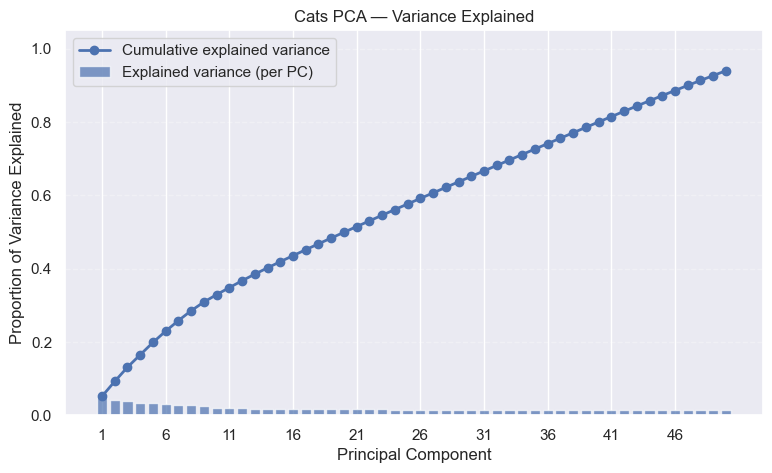

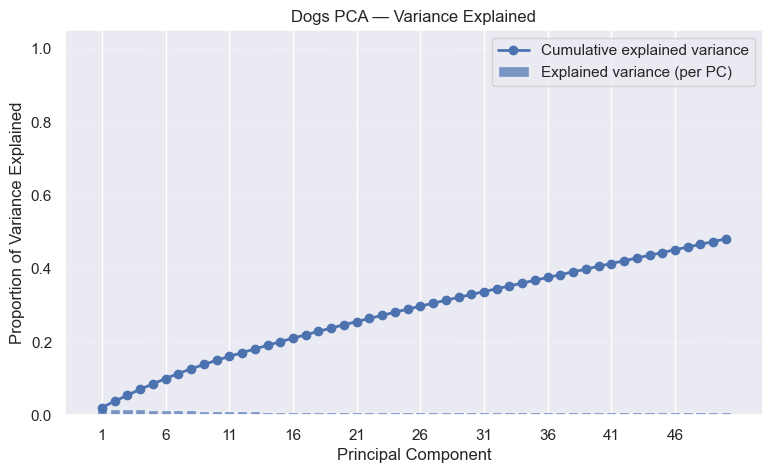

In [72]:
# PCA explained-variance visualization (scree plot) for any split dict like cat_splits/dog_splits

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def plot_pca_variance(splits, title_prefix=""):
    """
    splits: dict returned by build_splits_and_features(...)
            expects keys: X_train
    """
    Xtr = splits["X_train"].astype("float32").values  # (n_samples, n_features)

    # Standardize all features before PCA
    scaler = StandardScaler(with_mean=True, with_std=True)
    Xtr_std = scaler.fit_transform(Xtr)

    # Keep up to 50 PCs (or all if fewer than 50 features)
    n_comps = min(50, Xtr_std.shape[1])
    pca = PCA(n_components=n_comps, svd_solver="auto", random_state=42)
    pca.fit(Xtr_std)

    evr = pca.explained_variance_ratio_
    cum = np.cumsum(evr)

    # Scree plot
    plt.figure(figsize=(9, 5))
    x = np.arange(1, n_comps + 1)
    plt.bar(x, evr, alpha=0.7, label="Explained variance (per PC)")
    plt.plot(x, cum, marker="o", linewidth=2, label="Cumulative explained variance")
    plt.xlabel("Principal Component")
    plt.ylabel("Proportion of Variance Explained")
    plt.title(f"{title_prefix} PCA — Variance Explained")
    plt.xticks(x[::max(1, len(x)//10)])
    plt.ylim(0, 1.05)
    plt.grid(True, axis="y", linestyle="--", alpha=0.3)
    plt.legend()
    plt.show()

# Run for cats and dogs
plot_pca_variance(cat_splits, title_prefix="Cats")
plot_pca_variance(dog_splits, title_prefix="Dogs")


# Neural Network Models for Predicting Length of Stay

This section contains two neural network approaches:

1. **Baseline Neural Network** - Trained on all data (includes outliers)
2. **Optimized Neural Network with IQR Outlier Removal** - Trained on cleaned data

The IQR outlier removal significantly improves performance by removing extreme length-of-stay cases.

In [73]:
# ==== BASELINE Neural Network (No Outlier Removal) ====
# This model is trained on ALL data including outliers

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

np.random.seed(42)
tf.random.set_seed(42)

def prepare_for_nn(splits, scale_cyclical=True):
    """Prepare data for neural network training."""
    Xtr_df = splits["X_train"].copy()
    Xva_df = splits["X_val"].copy()
    Xte_df = splits["X_test"].copy()

    to_scale = list(splits.get("numeric_to_standardize", []))
    cyc = [c for c in ["Month_sin","Month_cos","DoW_sin","DoW_cos"] if c in Xtr_df.columns]
    if scale_cyclical:
        to_scale += cyc
    to_scale = [c for c in to_scale if c in Xtr_df.columns]

    scaler = None
    if to_scale:
        scaler = StandardScaler()
        scaler.fit(Xtr_df[to_scale].astype("float32"))
        Xtr_df[to_scale] = scaler.transform(Xtr_df[to_scale].astype("float32"))
        Xva_df[to_scale] = scaler.transform(Xva_df[to_scale].astype("float32"))
        Xte_df[to_scale] = scaler.transform(Xte_df[to_scale].astype("float32"))

    return {
        "X_train": Xtr_df.astype("float32").values,
        "y_train": splits["y_train"].astype("float32").values,
        "X_val": Xva_df.astype("float32").values,
        "y_val": splits["y_val"].astype("float32").values,
        "X_test": Xte_df.astype("float32").values,
        "y_test": splits["y_test"].astype("float32").values,
    }

def build_baseline_model(input_dim, hidden=[256, 128, 64], dropout=0.20, l2_reg=1e-6):
    """Build baseline MLP for regression."""
    reg = keras.regularizers.l2(l2_reg)
    
    inp = layers.Input(shape=(input_dim,), name="features")
    x = inp
    for i, h in enumerate(hidden):
        x = layers.Dense(h, activation="relu", kernel_regularizer=reg, name=f"dense_{i+1}")(x)
        x = layers.Dropout(dropout, name=f"dropout_{i+1}")(x)
    out = layers.Dense(1, name="pred_days")(x)

    model = keras.Model(inp, out)
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=1e-3),
        loss="mse",
        metrics=[
            tf.keras.metrics.RootMeanSquaredError(name="rmse"),
            tf.keras.metrics.MeanAbsoluteError(name="mae")
        ]
    )
    return model

def train_baseline_nn(splits, epochs=100, batch_size=1024, model_name="model"):
    """Train baseline neural network."""
    data = prepare_for_nn(splits)
    X_train, y_train = data["X_train"], data["y_train"]
    X_val, y_val = data["X_val"], data["y_val"]
    X_test, y_test = data["X_test"], data["y_test"]

    model = build_baseline_model(input_dim=X_train.shape[1])

    callbacks = [
        keras.callbacks.EarlyStopping(
            monitor="val_rmse", patience=10, mode="min", restore_best_weights=True
        ),
        keras.callbacks.ReduceLROnPlateau(
            monitor="val_rmse", factor=0.5, patience=5, min_lr=1e-5, mode="min"
        ),
    ]

    print(f"\n[{model_name}] Training baseline neural network...")
    print(f"  Train shape: {X_train.shape}, Val shape: {X_val.shape}, Test shape: {X_test.shape}")
    
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=epochs,
        batch_size=batch_size,
        callbacks=callbacks,
        verbose=1
    )

    # Get predictions for metrics
    y_pred_test = model.predict(X_test, verbose=0).reshape(-1)
    test_mae = mean_absolute_error(y_test, y_pred_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    
    print(f"\n[{model_name}] Test Results:")
    print(f"  MAE:  {test_mae:.2f} days")
    print(f"  RMSE: {test_rmse:.2f} days")

    return {
        "model": model,
        "history": history,
        "test_metrics": {"mae": test_mae, "rmse": test_rmse},
        "y_test": y_test,
        "y_pred_test": y_pred_test,
    }

# Train baseline models
print("="*70)
print("BASELINE NEURAL NETWORK (No Outlier Removal)")
print("="*70)

cat_baseline = train_baseline_nn(cat_splits, model_name="CatsNN_Baseline")
dog_baseline = train_baseline_nn(dog_splits, model_name="DogsNN_Baseline")


BASELINE NEURAL NETWORK (No Outlier Removal)

[CatsNN_Baseline] Training baseline neural network...
  Train shape: (42742, 80), Val shape: (13246, 80), Test shape: (12929, 80)
Epoch 1/100


 1/42 ━━━━━━━━━━━━━━━━━━━━ 24s 597ms/step - loss: 1559.4097 - mae: 21.3524 - rmse: 39.4894

15/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2047.2037 - mae: 21.0986 - rmse: 45.1510   

32/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2183.8467 - mae: 20.9957 - rmse: 46.6612

42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2178.9531 - mae: 21.2689 - rmse: 46.6267 - val_loss: 1926.9954 - val_mae: 24.5573 - val_rmse: 43.8975 - learning_rate: 0.0010


Epoch 2/100


 1/42 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1057.3385 - mae: 22.0540 - rmse: 32.5167

20/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1652.2765 - mae: 22.3807 - rmse: 40.4820 

40/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1768.0763 - mae: 22.6296 - rmse: 41.9424

42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1777.1710 - mae: 22.6373 - rmse: 42.0560 - val_loss: 1862.7452 - val_mae: 25.2008 - val_rmse: 43.1595 - learning_rate: 0.0010


Epoch 3/100


 1/42 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 998.6091 - mae: 21.4207 - rmse: 31.6008

18/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1550.0748 - mae: 21.9910 - rmse: 39.2025

36/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1686.2726 - mae: 21.9057 - rmse: 40.9454

42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1707.9126 - mae: 21.8336 - rmse: 41.2232 - val_loss: 1846.3424 - val_mae: 25.8030 - val_rmse: 42.9691 - learning_rate: 0.0010


Epoch 4/100


 1/42 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 937.1825 - mae: 19.9410 - rmse: 30.6134

19/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1517.8926 - mae: 20.1179 - rmse: 38.7774

39/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1648.8855 - mae: 20.1086 - rmse: 40.4862

42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1661.7614 - mae: 20.0970 - rmse: 40.6527 - val_loss: 1857.9817 - val_mae: 26.0386 - val_rmse: 43.1043 - learning_rate: 0.0010


Epoch 5/100


 1/42 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 915.6906 - mae: 18.9458 - rmse: 30.2604

17/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1457.2593 - mae: 19.2183 - rmse: 37.9875

32/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1603.6870 - mae: 19.4165 - rmse: 39.8987

42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1644.7168 - mae: 19.4305 - rmse: 40.4364 - val_loss: 1859.2523 - val_mae: 25.9744 - val_rmse: 43.1190 - learning_rate: 0.0010


Epoch 6/100


 1/42 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 920.7027 - mae: 18.9035 - rmse: 30.3431

19/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1491.5176 - mae: 19.0732 - rmse: 38.4334

33/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1602.4147 - mae: 19.2201 - rmse: 39.8896

42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1638.3700 - mae: 19.2455 - rmse: 40.3610 - val_loss: 1854.5970 - val_mae: 25.6993 - val_rmse: 43.0650 - learning_rate: 0.0010


Epoch 7/100


 1/42 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 895.2357 - mae: 18.3335 - rmse: 29.9205

17/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1447.1642 - mae: 18.8423 - rmse: 37.8525

34/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1599.3566 - mae: 19.0767 - rmse: 39.8508

42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1631.4142 - mae: 19.1045 - rmse: 40.2720 - val_loss: 1856.7876 - val_mae: 25.7236 - val_rmse: 43.0905 - learning_rate: 0.0010


Epoch 8/100


 1/42 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 902.4329 - mae: 18.6231 - rmse: 30.0405

21/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1511.5140 - mae: 18.9737 - rmse: 38.6901

41/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1618.6073 - mae: 19.0807 - rmse: 40.1122

42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1624.8524 - mae: 19.0883 - rmse: 40.1938 - val_loss: 1859.3535 - val_mae: 25.8231 - val_rmse: 43.1202 - learning_rate: 0.0010


Epoch 9/100


 1/42 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 904.0275 - mae: 18.6668 - rmse: 30.0670

21/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1497.1349 - mae: 18.9648 - rmse: 38.5060

42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1609.7416 - mae: 19.0816 - rmse: 40.0033

42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1612.8960 - mae: 19.0842 - rmse: 40.0445 - val_loss: 1861.9559 - val_mae: 25.7862 - val_rmse: 43.1504 - learning_rate: 5.0000e-04


Epoch 10/100


 1/42 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 898.6458 - mae: 18.6429 - rmse: 29.9774

18/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1457.5388 - mae: 19.0178 - rmse: 37.9922

35/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1588.7023 - mae: 19.1313 - rmse: 39.7262

42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1615.5944 - mae: 19.1294 - rmse: 40.0808 - val_loss: 1862.7292 - val_mae: 25.7287 - val_rmse: 43.1593 - learning_rate: 5.0000e-04


Epoch 11/100


 1/42 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 901.1012 - mae: 18.5518 - rmse: 30.0183

16/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1409.6046 - mae: 18.9494 - rmse: 37.3681

29/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1556.1705 - mae: 19.1188 - rmse: 39.2960

42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1610.7531 - mae: 19.1236 - rmse: 40.0197 - val_loss: 1865.1388 - val_mae: 25.8040 - val_rmse: 43.1872 - learning_rate: 5.0000e-04


Epoch 12/100


 1/42 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 891.3839 - mae: 18.5475 - rmse: 29.8560

19/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1471.5375 - mae: 19.0181 - rmse: 38.1698

37/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1596.1311 - mae: 19.1097 - rmse: 39.8207

42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1615.6483 - mae: 19.1124 - rmse: 40.0781 - val_loss: 1862.8503 - val_mae: 25.6614 - val_rmse: 43.1607 - learning_rate: 5.0000e-04


Epoch 13/100


 1/42 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 909.6467 - mae: 18.6302 - rmse: 30.1603

19/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1474.1788 - mae: 18.9908 - rmse: 38.2084

37/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1595.7638 - mae: 19.0912 - rmse: 39.8198

42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1614.4897 - mae: 19.0939 - rmse: 40.0672 - val_loss: 1865.9498 - val_mae: 25.7688 - val_rmse: 43.1966 - learning_rate: 5.0000e-04



[CatsNN_Baseline] Test Results:
  MAE:  21.81 days
  RMSE: 33.40 days



[DogsNN_Baseline] Training baseline neural network...
  Train shape: (64320, 146), Val shape: (18124, 146), Test shape: (11581, 146)
Epoch 1/100


 1/63 ━━━━━━━━━━━━━━━━━━━━ 24s 393ms/step - loss: 1757.0796 - mae: 16.8330 - rmse: 41.9175

16/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2272.6658 - mae: 16.3541 - rmse: 47.5599   

33/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2404.7117 - mae: 16.7499 - rmse: 48.9640

50/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2461.4436 - mae: 17.4984 - rmse: 49.5575

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2461.8064 - mae: 17.8642 - rmse: 49.5729 - val_loss: 4611.5977 - val_mae: 25.9999 - val_rmse: 67.9087 - learning_rate: 0.0010


Epoch 2/100


 1/63 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1447.1001 - mae: 19.2537 - rmse: 38.0408

18/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2018.5469 - mae: 19.5070 - rmse: 44.7771 

37/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2179.5151 - mae: 19.9000 - rmse: 46.5796

56/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2252.9377 - mae: 20.0072 - rmse: 47.3828

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2259.9341 - mae: 19.9988 - rmse: 47.4663 - val_loss: 4481.9175 - val_mae: 25.3973 - val_rmse: 66.9471 - learning_rate: 0.0010


Epoch 3/100


 1/63 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1427.9390 - mae: 18.3087 - rmse: 37.7881

21/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2021.9069 - mae: 18.6924 - rmse: 44.8193 

37/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2135.6724 - mae: 18.9886 - rmse: 46.1070

53/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2205.5190 - mae: 19.1129 - rmse: 46.8752

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2218.7214 - mae: 19.1262 - rmse: 47.0295 - val_loss: 4423.0464 - val_mae: 25.1487 - val_rmse: 66.5060 - learning_rate: 0.0010


Epoch 4/100


 1/63 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1376.3777 - mae: 17.8643 - rmse: 37.0996

18/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1942.3026 - mae: 18.2198 - rmse: 43.9112 

36/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2099.1543 - mae: 18.6404 - rmse: 45.7025

50/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2169.3098 - mae: 18.7819 - rmse: 46.4783

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2192.1995 - mae: 18.8200 - rmse: 46.7422 - val_loss: 4390.2354 - val_mae: 24.7855 - val_rmse: 66.2588 - learning_rate: 0.0010


Epoch 5/100


 1/63 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1398.3146 - mae: 17.8101 - rmse: 37.3940

16/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1895.1801 - mae: 17.9767 - rmse: 43.3838 

31/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2057.2708 - mae: 18.3658 - rmse: 45.2418

48/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2151.3518 - mae: 18.5522 - rmse: 46.2871

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2179.9958 - mae: 18.5961 - rmse: 46.6154 - val_loss: 4361.8130 - val_mae: 24.5544 - val_rmse: 66.0440 - learning_rate: 0.0010


Epoch 6/100


 1/63 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1381.4362 - mae: 17.6145 - rmse: 37.1677

16/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1870.8846 - mae: 17.8760 - rmse: 43.1043 

31/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2034.2780 - mae: 18.2423 - rmse: 44.9866

47/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2126.0830 - mae: 18.4163 - rmse: 46.0111

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2159.9775 - mae: 18.4697 - rmse: 46.3989 - val_loss: 4351.7944 - val_mae: 24.4363 - val_rmse: 65.9681 - learning_rate: 0.0010


Epoch 7/100


 1/63 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1403.2350 - mae: 17.7600 - rmse: 37.4598

19/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1924.8499 - mae: 17.8659 - rmse: 43.7218 

35/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2051.6958 - mae: 18.1563 - rmse: 45.1867

53/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2137.8481 - mae: 18.3236 - rmse: 46.1467

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2151.8777 - mae: 18.3496 - rmse: 46.3124 - val_loss: 4348.8008 - val_mae: 24.3177 - val_rmse: 65.9454 - learning_rate: 0.0010


Epoch 8/100


 1/63 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1371.6350 - mae: 17.1487 - rmse: 37.0356

19/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1916.7234 - mae: 17.6647 - rmse: 43.6229 

37/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2059.3110 - mae: 18.0180 - rmse: 45.2679

51/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2124.5417 - mae: 18.1585 - rmse: 45.9975

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2143.6194 - mae: 18.2007 - rmse: 46.2214 - val_loss: 4348.9209 - val_mae: 24.2562 - val_rmse: 65.9463 - learning_rate: 0.0010


Epoch 9/100


 1/63 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1368.7463 - mae: 17.3156 - rmse: 36.9966

17/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1872.1066 - mae: 17.6324 - rmse: 43.1131 

36/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2043.8013 - mae: 18.0297 - rmse: 45.0976

53/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2120.9771 - mae: 18.1888 - rmse: 45.9627

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2134.8079 - mae: 18.2167 - rmse: 46.1271 - val_loss: 4344.4863 - val_mae: 24.3183 - val_rmse: 65.9127 - learning_rate: 0.0010


Epoch 10/100


 1/63 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1378.7330 - mae: 17.4410 - rmse: 37.1313

18/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1889.7249 - mae: 17.5587 - rmse: 43.3190 

35/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2031.7605 - mae: 17.9239 - rmse: 44.9665

53/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2115.8442 - mae: 18.1094 - rmse: 45.9090

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2129.3113 - mae: 18.1431 - rmse: 46.0693 - val_loss: 4346.4834 - val_mae: 24.2955 - val_rmse: 65.9279 - learning_rate: 0.0010


Epoch 11/100


 1/63 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1375.2664 - mae: 17.3359 - rmse: 37.0846

18/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1884.6129 - mae: 17.4884 - rmse: 43.2599 

37/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2039.6139 - mae: 17.8922 - rmse: 45.0548

55/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2111.3433 - mae: 18.0649 - rmse: 45.8635

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2120.5842 - mae: 18.0889 - rmse: 45.9753 - val_loss: 4346.3140 - val_mae: 24.3085 - val_rmse: 65.9266 - learning_rate: 0.0010


Epoch 12/100


 1/63 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1375.5182 - mae: 17.4463 - rmse: 37.0880

21/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1921.6742 - mae: 17.5264 - rmse: 43.6877 

38/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2038.2139 - mae: 17.8297 - rmse: 45.0389

56/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2103.5989 - mae: 17.9927 - rmse: 45.7801

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2111.3682 - mae: 18.0145 - rmse: 45.8748 - val_loss: 4356.3218 - val_mae: 24.2129 - val_rmse: 66.0024 - learning_rate: 0.0010


Epoch 13/100


 1/63 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1355.9438 - mae: 17.2163 - rmse: 36.8231

19/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1884.3314 - mae: 17.4255 - rmse: 43.2588 

37/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2018.7452 - mae: 17.7845 - rmse: 44.8250

55/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2089.3145 - mae: 17.9587 - rmse: 45.6246

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2098.6089 - mae: 17.9846 - rmse: 45.7373 - val_loss: 4372.8862 - val_mae: 24.2063 - val_rmse: 66.1278 - learning_rate: 0.0010


Epoch 14/100


 1/63 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1397.4580 - mae: 17.1860 - rmse: 37.3826

18/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1863.0217 - mae: 17.4043 - rmse: 43.0202 

34/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1992.5880 - mae: 17.7667 - rmse: 44.5357

49/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2070.8333 - mae: 17.9514 - rmse: 45.4170

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2094.9912 - mae: 18.0127 - rmse: 45.6999 - val_loss: 4368.6313 - val_mae: 24.4057 - val_rmse: 66.0956 - learning_rate: 0.0010


Epoch 15/100


 1/63 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1378.4810 - mae: 17.4635 - rmse: 37.1279

18/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1855.6270 - mae: 17.4020 - rmse: 42.9325 

35/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1989.9333 - mae: 17.7759 - rmse: 44.5063

53/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2067.0579 - mae: 17.9401 - rmse: 45.3819

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2078.4717 - mae: 17.9671 - rmse: 45.5206 - val_loss: 4375.5566 - val_mae: 24.2668 - val_rmse: 66.1480 - learning_rate: 5.0000e-04


Epoch 16/100


 1/63 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1355.1130 - mae: 17.1259 - rmse: 36.8118

19/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1851.6464 - mae: 17.2406 - rmse: 42.8825 

37/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1985.4670 - mae: 17.6830 - rmse: 44.4538

57/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2056.9673 - mae: 17.8566 - rmse: 45.2728

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2062.8755 - mae: 17.8734 - rmse: 45.3464 - val_loss: 4379.5552 - val_mae: 24.2885 - val_rmse: 66.1782 - learning_rate: 5.0000e-04


Epoch 17/100


 1/63 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1380.4568 - mae: 17.3828 - rmse: 37.1545

15/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1781.1299 - mae: 17.2024 - rmse: 42.0660 

28/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1934.6305 - mae: 17.6031 - rmse: 43.8703

44/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2023.1652 - mae: 17.8218 - rmse: 44.8867

61/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2060.0994 - mae: 17.9143 - rmse: 45.3164

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2061.6890 - mae: 17.9171 - rmse: 45.3372 - val_loss: 4395.9243 - val_mae: 24.2265 - val_rmse: 66.3018 - learning_rate: 5.0000e-04


Epoch 18/100


 1/63 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1362.9622 - mae: 16.9499 - rmse: 36.9183

17/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1802.0120 - mae: 17.1616 - rmse: 42.3103 

34/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1945.6710 - mae: 17.6396 - rmse: 44.0089

51/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2025.4431 - mae: 17.8212 - rmse: 44.9204

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2042.5820 - mae: 17.8676 - rmse: 45.1259 - val_loss: 4384.5684 - val_mae: 24.3868 - val_rmse: 66.2161 - learning_rate: 5.0000e-04


Epoch 19/100


 1/63 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1347.6249 - mae: 17.1997 - rmse: 36.7100

19/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1846.6147 - mae: 17.3120 - rmse: 42.8300 

36/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1966.1648 - mae: 17.6659 - rmse: 44.2420

54/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2036.4401 - mae: 17.8188 - rmse: 45.0471

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2045.8284 - mae: 17.8441 - rmse: 45.1627 - val_loss: 4384.3208 - val_mae: 24.3656 - val_rmse: 66.2142 - learning_rate: 5.0000e-04



[DogsNN_Baseline] Test Results:
  MAE:  25.39 days
  RMSE: 51.78 days


## Optimized Neural Network with IQR Outlier Removal

This model removes outliers using the IQR (Interquartile Range) method before training.
This approach significantly improves RMSE by focusing on typical length-of-stay cases.

In [74]:
# ==== OPTIMIZED Neural Network with IQR Outlier Removal ====

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

np.random.seed(42)
tf.random.set_seed(42)

def remove_outliers_iqr(y, multiplier=1.5):
    """Remove outliers using IQR method."""
    Q1 = np.percentile(y, 25)
    Q3 = np.percentile(y, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    
    mask = (y >= lower_bound) & (y <= upper_bound)
    
    print(f"  IQR Outlier Removal:")
    print(f"    Q1={Q1:.2f}, Q3={Q3:.2f}, IQR={IQR:.2f}")
    print(f"    Bounds: [{lower_bound:.2f}, {upper_bound:.2f}] days")
    print(f"    Removed: {(~mask).sum():,} ({(~mask).sum()/len(y)*100:.1f}%)")
    print(f"    Kept: {mask.sum():,} ({mask.sum()/len(y)*100:.1f}%)")
    
    return mask, lower_bound, upper_bound

def prepare_data_iqr_removed(splits, iqr_multiplier=1.5):
    """Prepare data with IQR outlier removal."""
    Xtr = splits["X_train"].copy()
    Xva = splits["X_val"].copy()
    Xte = splits["X_test"].copy()
    
    y_train = splits["y_train"].astype("float32").values.copy()
    y_val = splits["y_val"].astype("float32").values.copy()
    y_test = splits["y_test"].astype("float32").values.copy()
    
    # Remove outliers from training data
    print("\n  Training set:")
    train_mask, lower, upper = remove_outliers_iqr(y_train, iqr_multiplier)
    
    Xtr_clean = Xtr[train_mask].copy()
    y_train_clean = y_train[train_mask]
    
    # Apply same bounds to val/test
    print("\n  Validation set:")
    val_mask = (y_val >= lower) & (y_val <= upper)
    print(f"    Kept: {val_mask.sum():,} ({val_mask.sum()/len(y_val)*100:.1f}%)")
    Xva_clean = Xva[val_mask].copy()
    y_val_clean = y_val[val_mask]
    
    print("\n  Test set:")
    test_mask = (y_test >= lower) & (y_test <= upper)
    print(f"    Kept: {test_mask.sum():,} ({test_mask.sum()/len(y_test)*100:.1f}%)")
    Xte_clean = Xte[test_mask].copy()
    y_test_clean = y_test[test_mask]
    
    # Scale numeric features
    to_scale = list(splits.get("numeric_to_standardize", []))
    cyc = [c for c in ["Month_sin","Month_cos","DoW_sin","DoW_cos"] if c in Xtr_clean.columns]
    to_scale = [c for c in to_scale + cyc if c in Xtr_clean.columns]
    
    if to_scale:
        scaler = StandardScaler()
        Xtr_clean[to_scale] = scaler.fit_transform(Xtr_clean[to_scale].astype("float32"))
        Xva_clean[to_scale] = scaler.transform(Xva_clean[to_scale].astype("float32"))
        Xte_clean[to_scale] = scaler.transform(Xte_clean[to_scale].astype("float32"))
    
    print(f"\n  Final shapes: Train={Xtr_clean.shape}, Val={Xva_clean.shape}, Test={Xte_clean.shape}")
    
    return {
        "X_train": Xtr_clean.astype("float32").values, "y_train": y_train_clean,
        "X_val": Xva_clean.astype("float32").values, "y_val": y_val_clean,
        "X_test": Xte_clean.astype("float32").values, "y_test": y_test_clean,
        "bounds": (lower, upper)
    }

def build_optimized_model(input_dim, hidden, dropout, l2_reg):
    """Build optimized neural network."""
    reg = keras.regularizers.l2(l2_reg) if l2_reg > 0 else None
    
    inp = layers.Input(shape=(input_dim,), name="features")
    x = inp
    
    for i, h in enumerate(hidden):
        x = layers.Dense(h, activation="relu", kernel_regularizer=reg, name=f"dense_{i+1}")(x)
        x = layers.Dropout(dropout, name=f"dropout_{i+1}")(x)
    
    out = layers.Dense(1, name="prediction")(x)
    
    model = keras.Model(inp, out)
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=1e-3),
        loss="mse",
        metrics=[
            tf.keras.metrics.RootMeanSquaredError(name="rmse"),
            tf.keras.metrics.MeanAbsoluteError(name="mae")
        ]
    )
    return model

def train_optimized_nn(splits, hidden, dropout, l2_reg, batch_size=128, 
                       patience=20, model_name="model"):
    """Train optimized neural network with IQR outlier removal."""
    print(f"\n{'='*70}")
    print(f"[{model_name}] OPTIMIZED NEURAL NETWORK WITH IQR OUTLIER REMOVAL")
    print(f"{'='*70}")
    print(f"  Architecture: {hidden}, Dropout: {dropout}, L2: {l2_reg}")
    
    # Prepare data with IQR removal
    data = prepare_data_iqr_removed(splits, iqr_multiplier=1.5)
    
    X_train, y_train = data["X_train"], data["y_train"]
    X_val, y_val = data["X_val"], data["y_val"]
    X_test, y_test = data["X_test"], data["y_test"]
    
    model = build_optimized_model(
        input_dim=X_train.shape[1],
        hidden=hidden,
        dropout=dropout,
        l2_reg=l2_reg
    )
    
    callbacks = [
        keras.callbacks.EarlyStopping(
            monitor="val_rmse", patience=patience, mode="min",
            restore_best_weights=True, verbose=1
        ),
        keras.callbacks.ReduceLROnPlateau(
            monitor="val_rmse", factor=0.5, patience=8,
            min_lr=1e-6, mode="min", verbose=1
        ),
    ]
    
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=200,
        batch_size=batch_size,
        callbacks=callbacks,
        verbose=1
    )
    
    # Evaluate
    y_pred_test = model.predict(X_test, verbose=0).reshape(-1)
    test_mae = mean_absolute_error(y_test, y_pred_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    
    print(f"\n[{model_name}] Test Results (IQR-cleaned data):")
    print(f"  MAE:  {test_mae:.2f} days")
    print(f"  RMSE: {test_rmse:.2f} days")
    
    return {
        "model": model,
        "history": history,
        "test_metrics": {"mae": test_mae, "rmse": test_rmse},
        "y_test": y_test,
        "y_pred_test": y_pred_test,
    }

# Train optimized models with best configurations found
print("="*70)
print("OPTIMIZED NEURAL NETWORK (With IQR Outlier Removal)")
print("="*70)

# CATS: Best config is simple [64, 32] architecture
cat_optimized = train_optimized_nn(
    cat_splits,
    hidden=[64, 32],
    dropout=0.15,
    l2_reg=1e-6,
    batch_size=128,
    patience=20,
    model_name="CatsNN_Optimized"
)

# DOGS: Best config is wider [256, 128, 64] architecture
dog_optimized = train_optimized_nn(
    dog_splits,
    hidden=[256, 128, 64],
    dropout=0.20,
    l2_reg=1e-5,
    batch_size=128,
    patience=25,
    model_name="DogsNN_Optimized"
)


OPTIMIZED NEURAL NETWORK (With IQR Outlier Removal)

[CatsNN_Optimized] OPTIMIZED NEURAL NETWORK WITH IQR OUTLIER REMOVAL
  Architecture: [64, 32], Dropout: 0.15, L2: 1e-06

  Training set:
  IQR Outlier Removal:
    Q1=1.21, Q3=28.11, IQR=26.90
    Bounds: [-39.14, 68.46] days
    Removed: 3,358 (7.9%)
    Kept: 39,384 (92.1%)

  Validation set:
    Kept: 11,910 (89.9%)

  Test set:
    Kept: 11,867 (91.8%)



  Final shapes: Train=(39384, 80), Val=(11910, 80), Test=(11867, 80)
Epoch 1/200


  1/308 ━━━━━━━━━━━━━━━━━━━━ 1:47 349ms/step - loss: 400.1855 - mae: 12.5792 - rmse: 20.0046

 99/308 ━━━━━━━━━━━━━━━━━━━━ 0s 512us/step - loss: 411.5382 - mae: 12.7983 - rmse: 20.2482  

216/308 ━━━━━━━━━━━━━━━━━━━━ 0s 467us/step - loss: 355.6514 - mae: 12.5918 - rmse: 18.7899

308/308 ━━━━━━━━━━━━━━━━━━━━ 1s 846us/step - loss: 333.0216 - mae: 12.4400 - rmse: 18.1748 - val_loss: 287.8060 - val_mae: 13.1715 - val_rmse: 16.9648 - learning_rate: 0.0010


Epoch 2/200


  1/308 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 210.5922 - mae: 10.6485 - rmse: 14.5118

105/308 ━━━━━━━━━━━━━━━━━━━━ 0s 483us/step - loss: 227.6738 - mae: 10.9116 - rmse: 15.0876

224/308 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step - loss: 222.3724 - mae: 10.7340 - rmse: 14.9106

308/308 ━━━━━━━━━━━━━━━━━━━━ 0s 609us/step - loss: 221.3704 - mae: 10.6805 - rmse: 14.8773 - val_loss: 290.1315 - val_mae: 13.2912 - val_rmse: 17.0332 - learning_rate: 0.0010


Epoch 3/200


  1/308 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 216.2367 - mae: 10.4399 - rmse: 14.7050

105/308 ━━━━━━━━━━━━━━━━━━━━ 0s 484us/step - loss: 221.4283 - mae: 10.5566 - rmse: 14.8791

199/308 ━━━━━━━━━━━━━━━━━━━━ 0s 508us/step - loss: 216.9992 - mae: 10.4371 - rmse: 14.7293

302/308 ━━━━━━━━━━━━━━━━━━━━ 0s 501us/step - loss: 216.1555 - mae: 10.3994 - rmse: 14.7011

308/308 ━━━━━━━━━━━━━━━━━━━━ 0s 677us/step - loss: 216.1210 - mae: 10.3976 - rmse: 14.7000 - val_loss: 290.3341 - val_mae: 13.2599 - val_rmse: 17.0392 - learning_rate: 0.0010


Epoch 4/200


  1/308 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 214.7093 - mae: 10.3904 - rmse: 14.6530

 99/308 ━━━━━━━━━━━━━━━━━━━━ 0s 512us/step - loss: 220.4071 - mae: 10.4518 - rmse: 14.8443

184/308 ━━━━━━━━━━━━━━━━━━━━ 0s 548us/step - loss: 215.3237 - mae: 10.3268 - rmse: 14.6717

291/308 ━━━━━━━━━━━━━━━━━━━━ 0s 519us/step - loss: 214.1279 - mae: 10.2872 - rmse: 14.6316

308/308 ━━━━━━━━━━━━━━━━━━━━ 0s 815us/step - loss: 214.0365 - mae: 10.2835 - rmse: 14.6286 - val_loss: 291.2036 - val_mae: 13.2477 - val_rmse: 17.0647 - learning_rate: 0.0010


Epoch 5/200


  1/308 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 210.2842 - mae: 10.5048 - rmse: 14.5012

 96/308 ━━━━━━━━━━━━━━━━━━━━ 0s 530us/step - loss: 219.4168 - mae: 10.3979 - rmse: 14.8114

146/308 ━━━━━━━━━━━━━━━━━━━━ 0s 755us/step - loss: 215.8908 - mae: 10.3117 - rmse: 14.6914

175/308 ━━━━━━━━━━━━━━━━━━━━ 0s 917us/step - loss: 214.4436 - mae: 10.2737 - rmse: 14.6419

255/308 ━━━━━━━━━━━━━━━━━━━━ 0s 826us/step - loss: 213.0730 - mae: 10.2346 - rmse: 14.5955

308/308 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step - loss: 212.6412 - mae: 10.2193 - rmse: 14.5809 - val_loss: 291.5722 - val_mae: 13.2075 - val_rmse: 17.0755 - learning_rate: 0.0010


Epoch 6/200


  1/308 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 213.5813 - mae: 10.3894 - rmse: 14.6144

107/308 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step - loss: 216.7265 - mae: 10.3283 - rmse: 14.7203

223/308 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step - loss: 212.3145 - mae: 10.2094 - rmse: 14.5696

308/308 ━━━━━━━━━━━━━━━━━━━━ 0s 601us/step - loss: 211.7185 - mae: 10.1842 - rmse: 14.5495 - val_loss: 291.2874 - val_mae: 13.1640 - val_rmse: 17.0671 - learning_rate: 0.0010


Epoch 7/200


  1/308 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 199.8059 - mae: 10.0395 - rmse: 14.1353

116/308 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step - loss: 214.7631 - mae: 10.2923 - rmse: 14.6533

234/308 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step - loss: 211.0100 - mae: 10.1860 - rmse: 14.5249

308/308 ━━━━━━━━━━━━━━━━━━━━ 0s 589us/step - loss: 210.5915 - mae: 10.1651 - rmse: 14.5107 - val_loss: 292.6617 - val_mae: 13.1793 - val_rmse: 17.1074 - learning_rate: 0.0010


Epoch 8/200


  1/308 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 200.0670 - mae: 10.1825 - rmse: 14.1445

117/308 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step - loss: 214.8615 - mae: 10.2602 - rmse: 14.6563

228/308 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step - loss: 210.5908 - mae: 10.1525 - rmse: 14.5100

308/308 ━━━━━━━━━━━━━━━━━━━━ 0s 604us/step - loss: 209.9461 - mae: 10.1300 - rmse: 14.4882 - val_loss: 293.6302 - val_mae: 13.2302 - val_rmse: 17.1356 - learning_rate: 0.0010


Epoch 9/200


  1/308 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 201.4228 - mae: 10.1040 - rmse: 14.1923

119/308 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step - loss: 213.8976 - mae: 10.2444 - rmse: 14.6236

236/308 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step - loss: 210.1378 - mae: 10.1383 - rmse: 14.4947


Epoch 9: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.


308/308 ━━━━━━━━━━━━━━━━━━━━ 0s 589us/step - loss: 209.5420 - mae: 10.1147 - rmse: 14.4744 - val_loss: 292.4380 - val_mae: 13.1328 - val_rmse: 17.1008 - learning_rate: 0.0010


Epoch 10/200


  1/308 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 196.4047 - mae: 9.9434 - rmse: 14.0144

115/308 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step - loss: 211.7421 - mae: 10.1550 - rmse: 14.5497

232/308 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step - loss: 208.1597 - mae: 10.0712 - rmse: 14.4264

308/308 ━━━━━━━━━━━━━━━━━━━━ 0s 592us/step - loss: 207.7162 - mae: 10.0558 - rmse: 14.4113 - val_loss: 295.9346 - val_mae: 13.3312 - val_rmse: 17.2027 - learning_rate: 5.0000e-04


Epoch 11/200


  1/308 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 206.9121 - mae: 10.4461 - rmse: 14.3844

120/308 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step - loss: 210.1864 - mae: 10.1780 - rmse: 14.4968

240/308 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step - loss: 207.1084 - mae: 10.0744 - rmse: 14.3903

308/308 ━━━━━━━━━━━━━━━━━━━━ 0s 574us/step - loss: 206.8450 - mae: 10.0568 - rmse: 14.3813 - val_loss: 295.3138 - val_mae: 13.2897 - val_rmse: 17.1847 - learning_rate: 5.0000e-04


Epoch 12/200


  1/308 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 200.4728 - mae: 10.0966 - rmse: 14.1588

116/308 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step - loss: 211.9424 - mae: 10.1976 - rmse: 14.5563

227/308 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step - loss: 207.9202 - mae: 10.0898 - rmse: 14.4177

308/308 ━━━━━━━━━━━━━━━━━━━━ 0s 828us/step - loss: 207.2971 - mae: 10.0660 - rmse: 14.3965 - val_loss: 296.3186 - val_mae: 13.3151 - val_rmse: 17.2139 - learning_rate: 5.0000e-04


Epoch 13/200


  1/308 ━━━━━━━━━━━━━━━━━━━━ 15s 50ms/step - loss: 194.6061 - mae: 10.2559 - rmse: 13.9501

 13/308 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 218.8741 - mae: 10.3598 - rmse: 14.7914  

 20/308 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 218.1423 - mae: 10.3487 - rmse: 14.7676

 37/308 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 216.2737 - mae: 10.3269 - rmse: 14.7049

 50/308 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 215.2705 - mae: 10.3132 - rmse: 14.6710

 60/308 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 214.6938 - mae: 10.3004 - rmse: 14.6514

 74/308 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 213.7214 - mae: 10.2756 - rmse: 14.6182

 89/308 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 212.4447 - mae: 10.2380 - rmse: 14.5743

108/308 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 210.9758 - mae: 10.1935 - rmse: 14.5236

134/308 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 209.5092 - mae: 10.1517 - rmse: 14.4729

171/308 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 207.7443 - mae: 10.1009 - rmse: 14.4117

240/308 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 206.7137 - mae: 10.0624 - rmse: 14.3762

308/308 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 206.3082 - mae: 10.0420 - rmse: 14.3624 - val_loss: 296.6746 - val_mae: 13.3274 - val_rmse: 17.2242 - learning_rate: 5.0000e-04


Epoch 14/200


  1/308 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 202.4053 - mae: 10.3305 - rmse: 14.2269

 96/308 ━━━━━━━━━━━━━━━━━━━━ 0s 530us/step - loss: 213.7807 - mae: 10.2581 - rmse: 14.6203

202/308 ━━━━━━━━━━━━━━━━━━━━ 0s 503us/step - loss: 209.0031 - mae: 10.1165 - rmse: 14.4556

305/308 ━━━━━━━━━━━━━━━━━━━━ 0s 497us/step - loss: 207.9998 - mae: 10.0760 - rmse: 14.4212

308/308 ━━━━━━━━━━━━━━━━━━━━ 0s 708us/step - loss: 207.9729 - mae: 10.0749 - rmse: 14.4203 - val_loss: 296.1986 - val_mae: 13.2949 - val_rmse: 17.2104 - learning_rate: 5.0000e-04


Epoch 15/200


  1/308 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 204.7286 - mae: 10.3374 - rmse: 14.3083

117/308 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step - loss: 210.3074 - mae: 10.1541 - rmse: 14.5009

161/308 ━━━━━━━━━━━━━━━━━━━━ 0s 628us/step - loss: 208.2285 - mae: 10.0986 - rmse: 14.4289

186/308 ━━━━━━━━━━━━━━━━━━━━ 0s 814us/step - loss: 207.4677 - mae: 10.0758 - rmse: 14.4025

247/308 ━━━━━━━━━━━━━━━━━━━━ 0s 817us/step - loss: 206.8457 - mae: 10.0532 - rmse: 14.3811

308/308 ━━━━━━━━━━━━━━━━━━━━ 0s 944us/step - loss: 206.5535 - mae: 10.0382 - rmse: 14.3711 - val_loss: 296.1857 - val_mae: 13.2901 - val_rmse: 17.2100 - learning_rate: 5.0000e-04


Epoch 16/200


  1/308 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 212.0756 - mae: 10.4993 - rmse: 14.5628

113/308 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step - loss: 210.7366 - mae: 10.1754 - rmse: 14.5154

226/308 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step - loss: 206.9158 - mae: 10.0592 - rmse: 14.3832

308/308 ━━━━━━━━━━━━━━━━━━━━ 0s 611us/step - loss: 206.3833 - mae: 10.0323 - rmse: 14.3650 - val_loss: 295.9529 - val_mae: 13.2662 - val_rmse: 17.2033 - learning_rate: 5.0000e-04


Epoch 17/200


  1/308 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 206.9852 - mae: 10.2851 - rmse: 14.3870

117/308 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step - loss: 211.7772 - mae: 10.1905 - rmse: 14.5509

239/308 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step - loss: 207.4591 - mae: 10.0676 - rmse: 14.4018


Epoch 17: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.


308/308 ━━━━━━━━━━━━━━━━━━━━ 0s 580us/step - loss: 206.8450 - mae: 10.0421 - rmse: 14.3808 - val_loss: 296.2508 - val_mae: 13.2597 - val_rmse: 17.2119 - learning_rate: 5.0000e-04


Epoch 18/200


  1/308 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 204.3824 - mae: 10.2154 - rmse: 14.2962

115/308 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step - loss: 208.4276 - mae: 10.0937 - rmse: 14.4357

231/308 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step - loss: 205.0017 - mae: 9.9926 - rmse: 14.3167 

308/308 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/step - loss: 204.5945 - mae: 9.9751 - rmse: 14.3027 - val_loss: 296.4214 - val_mae: 13.2495 - val_rmse: 17.2169 - learning_rate: 2.5000e-04


Epoch 19/200


  1/308 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 202.1965 - mae: 10.2986 - rmse: 14.2196

121/308 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step - loss: 209.2535 - mae: 10.1064 - rmse: 14.4637

244/308 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step - loss: 205.6477 - mae: 10.0069 - rmse: 14.3389

308/308 ━━━━━━━━━━━━━━━━━━━━ 0s 572us/step - loss: 205.2511 - mae: 9.9905 - rmse: 14.3253 - val_loss: 296.5534 - val_mae: 13.2447 - val_rmse: 17.2207 - learning_rate: 2.5000e-04


Epoch 20/200


  1/308 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 200.4951 - mae: 10.2015 - rmse: 14.1596

112/308 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step - loss: 209.5978 - mae: 10.1172 - rmse: 14.4761

222/308 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step - loss: 205.5925 - mae: 10.0060 - rmse: 14.3371

308/308 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step - loss: 204.8846 - mae: 9.9804 - rmse: 14.3127 - val_loss: 297.2486 - val_mae: 13.2776 - val_rmse: 17.2409 - learning_rate: 2.5000e-04


Epoch 21/200


  1/308 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 202.5437 - mae: 10.2850 - rmse: 14.2318

113/308 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step - loss: 209.6851 - mae: 10.1419 - rmse: 14.4790

228/308 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step - loss: 205.8565 - mae: 10.0210 - rmse: 14.3463

308/308 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step - loss: 205.3520 - mae: 9.9945 - rmse: 14.3290 - val_loss: 296.8974 - val_mae: 13.2547 - val_rmse: 17.2307 - learning_rate: 2.5000e-04


Epoch 21: early stopping


Restoring model weights from the end of the best epoch: 1.



[CatsNN_Optimized] Test Results (IQR-cleaned data):
  MAE:  12.46 days
  RMSE: 16.60 days

[DogsNN_Optimized] OPTIMIZED NEURAL NETWORK WITH IQR OUTLIER REMOVAL
  Architecture: [256, 128, 64], Dropout: 0.2, L2: 1e-05

  Training set:
  IQR Outlier Removal:
    Q1=2.12, Q3=11.77, IQR=9.64
    Bounds: [-12.34, 26.23] days
    Removed: 9,119 (14.2%)
    Kept: 55,201 (85.8%)

  Validation set:
    Kept: 14,242 (78.6%)

  Test set:
    Kept: 7,967 (68.8%)

  Final shapes: Train=(55201, 146), Val=(14242, 146), Test=(7967, 146)


Epoch 1/200


  1/432 ━━━━━━━━━━━━━━━━━━━━ 3:08 437ms/step - loss: 52.8688 - mae: 5.3786 - rmse: 7.2708

 33/432 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 44.5497 - mae: 4.7394 - rmse: 6.6605    

 78/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 38.7734 - mae: 4.4632 - rmse: 6.2076

125/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 36.3480 - mae: 4.3481 - rmse: 6.0110

178/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 34.7308 - mae: 4.2635 - rmse: 5.8767

230/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 33.6691 - mae: 4.2046 - rmse: 5.7870

284/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 32.9153 - mae: 4.1618 - rmse: 5.7229

338/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 32.3420 - mae: 4.1280 - rmse: 5.6737

393/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 31.8893 - mae: 4.1006 - rmse: 5.6346

432/432 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 31.6223 - mae: 4.0844 - rmse: 5.6115 - val_loss: 33.6761 - val_mae: 4.3961 - val_rmse: 5.8027 - learning_rate: 0.0010


Epoch 2/200


  1/432 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 27.4571 - mae: 3.9220 - rmse: 5.2395

 59/432 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step - loss: 27.8790 - mae: 3.8404 - rmse: 5.2791

119/432 ━━━━━━━━━━━━━━━━━━━━ 0s 858us/step - loss: 27.9956 - mae: 3.8417 - rmse: 5.2904

179/432 ━━━━━━━━━━━━━━━━━━━━ 0s 852us/step - loss: 27.8972 - mae: 3.8328 - rmse: 5.2811

239/432 ━━━━━━━━━━━━━━━━━━━━ 0s 848us/step - loss: 27.7813 - mae: 3.8240 - rmse: 5.2702

291/432 ━━━━━━━━━━━━━━━━━━━━ 0s 871us/step - loss: 27.7143 - mae: 3.8190 - rmse: 5.2638

344/432 ━━━━━━━━━━━━━━━━━━━━ 0s 882us/step - loss: 27.6480 - mae: 3.8141 - rmse: 5.2575

399/432 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step - loss: 27.5977 - mae: 3.8101 - rmse: 5.2528

432/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 27.5748 - mae: 3.8082 - rmse: 5.2506 - val_loss: 33.4927 - val_mae: 4.3714 - val_rmse: 5.7869 - learning_rate: 0.0010


Epoch 3/200


  1/432 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 26.3345 - mae: 3.8207 - rmse: 5.1312

 53/432 ━━━━━━━━━━━━━━━━━━━━ 0s 965us/step - loss: 27.1820 - mae: 3.7885 - rmse: 5.2130

 99/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 27.3423 - mae: 3.7956 - rmse: 5.2284  

147/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 27.3938 - mae: 3.7976 - rmse: 5.2333

196/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 27.2990 - mae: 3.7894 - rmse: 5.2243

248/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 27.2437 - mae: 3.7850 - rmse: 5.2190

296/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 27.1979 - mae: 3.7814 - rmse: 5.2146

351/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 27.1419 - mae: 3.7771 - rmse: 5.2092

404/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 27.1059 - mae: 3.7740 - rmse: 5.2058

432/432 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 27.0916 - mae: 3.7727 - rmse: 5.2044 - val_loss: 33.3914 - val_mae: 4.3691 - val_rmse: 5.7781 - learning_rate: 0.0010


Epoch 4/200


  1/432 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 25.6745 - mae: 3.8551 - rmse: 5.0665

 48/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 26.8036 - mae: 3.7751 - rmse: 5.1763 

 97/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 27.0481 - mae: 3.7778 - rmse: 5.2000

146/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 27.0917 - mae: 3.7777 - rmse: 5.2043

190/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 26.9895 - mae: 3.7690 - rmse: 5.1945

240/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 26.9077 - mae: 3.7621 - rmse: 5.1866

296/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 26.8436 - mae: 3.7565 - rmse: 5.1804

344/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 26.7874 - mae: 3.7516 - rmse: 5.1750

392/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 26.7478 - mae: 3.7480 - rmse: 5.1712

432/432 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 26.7254 - mae: 3.7458 - rmse: 5.1690 - val_loss: 33.3667 - val_mae: 4.3466 - val_rmse: 5.7759 - learning_rate: 0.0010


Epoch 5/200


  1/432 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 24.9159 - mae: 3.7209 - rmse: 4.9910

 47/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 26.1445 - mae: 3.7283 - rmse: 5.1121

 96/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 26.5373 - mae: 3.7424 - rmse: 5.1505

147/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 26.6284 - mae: 3.7444 - rmse: 5.1594

201/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 26.5548 - mae: 3.7349 - rmse: 5.1524

257/432 ━━━━━━━━━━━━━━━━━━━━ 0s 988us/step - loss: 26.5000 - mae: 3.7290 - rmse: 5.1471

316/432 ━━━━━━━━━━━━━━━━━━━━ 0s 964us/step - loss: 26.4501 - mae: 3.7240 - rmse: 5.1422

375/432 ━━━━━━━━━━━━━━━━━━━━ 0s 946us/step - loss: 26.4028 - mae: 3.7196 - rmse: 5.1377

432/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 26.3783 - mae: 3.7168 - rmse: 5.1353 - val_loss: 33.4633 - val_mae: 4.3447 - val_rmse: 5.7842 - learning_rate: 0.0010


Epoch 6/200


  1/432 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 24.8015 - mae: 3.6750 - rmse: 4.9795

 58/432 ━━━━━━━━━━━━━━━━━━━━ 0s 887us/step - loss: 25.9931 - mae: 3.6898 - rmse: 5.0974

111/432 ━━━━━━━━━━━━━━━━━━━━ 0s 917us/step - loss: 26.2251 - mae: 3.6990 - rmse: 5.1202

167/432 ━━━━━━━━━━━━━━━━━━━━ 0s 911us/step - loss: 26.2603 - mae: 3.6991 - rmse: 5.1237

222/432 ━━━━━━━━━━━━━━━━━━━━ 0s 914us/step - loss: 26.1777 - mae: 3.6921 - rmse: 5.1156

280/432 ━━━━━━━━━━━━━━━━━━━━ 0s 906us/step - loss: 26.1338 - mae: 3.6887 - rmse: 5.1114

337/432 ━━━━━━━━━━━━━━━━━━━━ 0s 903us/step - loss: 26.0860 - mae: 3.6854 - rmse: 5.1067

384/432 ━━━━━━━━━━━━━━━━━━━━ 0s 923us/step - loss: 26.0525 - mae: 3.6831 - rmse: 5.1034

429/432 ━━━━━━━━━━━━━━━━━━━━ 0s 944us/step - loss: 26.0349 - mae: 3.6817 - rmse: 5.1017

432/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 26.0334 - mae: 3.6815 - rmse: 5.1016 - val_loss: 33.5414 - val_mae: 4.3642 - val_rmse: 5.7909 - learning_rate: 0.0010


Epoch 7/200


  1/432 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 26.7726 - mae: 3.7873 - rmse: 5.1736

 55/432 ━━━━━━━━━━━━━━━━━━━━ 0s 927us/step - loss: 25.8200 - mae: 3.6624 - rmse: 5.0805

107/432 ━━━━━━━━━━━━━━━━━━━━ 0s 952us/step - loss: 26.1039 - mae: 3.6793 - rmse: 5.1083

161/432 ━━━━━━━━━━━━━━━━━━━━ 0s 947us/step - loss: 26.1429 - mae: 3.6815 - rmse: 5.1122

217/432 ━━━━━━━━━━━━━━━━━━━━ 0s 934us/step - loss: 26.0340 - mae: 3.6734 - rmse: 5.1015

272/432 ━━━━━━━━━━━━━━━━━━━━ 0s 930us/step - loss: 25.9769 - mae: 3.6701 - rmse: 5.0959

330/432 ━━━━━━━━━━━━━━━━━━━━ 0s 920us/step - loss: 25.9161 - mae: 3.6665 - rmse: 5.0900

381/432 ━━━━━━━━━━━━━━━━━━━━ 0s 928us/step - loss: 25.8689 - mae: 3.6636 - rmse: 5.0853

432/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 25.8406 - mae: 3.6616 - rmse: 5.0826 - val_loss: 33.7313 - val_mae: 4.3447 - val_rmse: 5.8072 - learning_rate: 0.0010


Epoch 8/200


  1/432 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 24.4705 - mae: 3.5834 - rmse: 4.9460

 58/432 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step - loss: 25.2048 - mae: 3.6217 - rmse: 5.0192

118/432 ━━━━━━━━━━━━━━━━━━━━ 0s 861us/step - loss: 25.5954 - mae: 3.6505 - rmse: 5.0581

178/432 ━━━━━━━━━━━━━━━━━━━━ 0s 856us/step - loss: 25.6502 - mae: 3.6541 - rmse: 5.0636

237/432 ━━━━━━━━━━━━━━━━━━━━ 0s 854us/step - loss: 25.5801 - mae: 3.6494 - rmse: 5.0567

293/432 ━━━━━━━━━━━━━━━━━━━━ 0s 863us/step - loss: 25.5391 - mae: 3.6468 - rmse: 5.0527

352/432 ━━━━━━━━━━━━━━━━━━━━ 0s 861us/step - loss: 25.4902 - mae: 3.6436 - rmse: 5.0479

410/432 ━━━━━━━━━━━━━━━━━━━━ 0s 863us/step - loss: 25.4621 - mae: 3.6416 - rmse: 5.0451

432/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 25.4551 - mae: 3.6410 - rmse: 5.0444 - val_loss: 33.9649 - val_mae: 4.3633 - val_rmse: 5.8272 - learning_rate: 0.0010


Epoch 9/200


  1/432 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 24.3885 - mae: 3.6376 - rmse: 4.9376

 51/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 25.1203 - mae: 3.6284 - rmse: 5.0109 

101/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 25.3678 - mae: 3.6386 - rmse: 5.0356

150/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 25.4200 - mae: 3.6412 - rmse: 5.0409

202/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 25.3387 - mae: 3.6341 - rmse: 5.0328

255/432 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step - loss: 25.2911 - mae: 3.6307 - rmse: 5.0281

309/432 ━━━━━━━━━━━━━━━━━━━━ 0s 983us/step - loss: 25.2485 - mae: 3.6276 - rmse: 5.0239

367/432 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step - loss: 25.2051 - mae: 3.6242 - rmse: 5.0195

424/432 ━━━━━━━━━━━━━━━━━━━━ 0s 954us/step - loss: 25.1847 - mae: 3.6222 - rmse: 5.0175

432/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 25.1824 - mae: 3.6219 - rmse: 5.0173 - val_loss: 34.1055 - val_mae: 4.3872 - val_rmse: 5.8392 - learning_rate: 0.0010


Epoch 10/200


  1/432 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 24.6291 - mae: 3.6334 - rmse: 4.9619

 57/432 ━━━━━━━━━━━━━━━━━━━━ 0s 903us/step - loss: 25.2485 - mae: 3.6402 - rmse: 5.0235

107/432 ━━━━━━━━━━━━━━━━━━━━ 0s 953us/step - loss: 25.4483 - mae: 3.6445 - rmse: 5.0435

161/432 ━━━━━━━━━━━━━━━━━━━━ 0s 944us/step - loss: 25.4626 - mae: 3.6417 - rmse: 5.0450

214/432 ━━━━━━━━━━━━━━━━━━━━ 0s 945us/step - loss: 25.3398 - mae: 3.6314 - rmse: 5.0328

269/432 ━━━━━━━━━━━━━━━━━━━━ 0s 942us/step - loss: 25.2577 - mae: 3.6252 - rmse: 5.0246

324/432 ━━━━━━━━━━━━━━━━━━━━ 0s 937us/step - loss: 25.1906 - mae: 3.6199 - rmse: 5.0180

379/432 ━━━━━━━━━━━━━━━━━━━━ 0s 933us/step - loss: 25.1329 - mae: 3.6156 - rmse: 5.0122

432/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 25.0996 - mae: 3.6128 - rmse: 5.0089 - val_loss: 34.2375 - val_mae: 4.3627 - val_rmse: 5.8505 - learning_rate: 0.0010


Epoch 11/200


  1/432 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 25.7414 - mae: 3.6789 - rmse: 5.0727

 55/432 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/step - loss: 24.8527 - mae: 3.6023 - rmse: 4.9841

112/432 ━━━━━━━━━━━━━━━━━━━━ 0s 911us/step - loss: 25.0872 - mae: 3.6139 - rmse: 5.0076

165/432 ━━━━━━━━━━━━━━━━━━━━ 0s 922us/step - loss: 25.1028 - mae: 3.6126 - rmse: 5.0092

219/432 ━━━━━━━━━━━━━━━━━━━━ 0s 925us/step - loss: 24.9827 - mae: 3.6027 - rmse: 4.9972

275/432 ━━━━━━━━━━━━━━━━━━━━ 0s 920us/step - loss: 24.9065 - mae: 3.5973 - rmse: 4.9895

330/432 ━━━━━━━━━━━━━━━━━━━━ 0s 920us/step - loss: 24.8414 - mae: 3.5926 - rmse: 4.9830

382/432 ━━━━━━━━━━━━━━━━━━━━ 0s 928us/step - loss: 24.7915 - mae: 3.5889 - rmse: 4.9780

432/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 24.7657 - mae: 3.5868 - rmse: 4.9754 - val_loss: 34.5146 - val_mae: 4.3703 - val_rmse: 5.8740 - learning_rate: 0.0010


Epoch 12/200


  1/432 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 22.9287 - mae: 3.5166 - rmse: 4.7873

 57/432 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step - loss: 24.3642 - mae: 3.5801 - rmse: 4.9345

117/432 ━━━━━━━━━━━━━━━━━━━━ 0s 872us/step - loss: 24.7225 - mae: 3.5972 - rmse: 4.9708

177/432 ━━━━━━━━━━━━━━━━━━━━ 0s 862us/step - loss: 24.7342 - mae: 3.5943 - rmse: 4.9721

235/432 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step - loss: 24.6432 - mae: 3.5859 - rmse: 4.9629

294/432 ━━━━━━━━━━━━━━━━━━━━ 0s 863us/step - loss: 24.5908 - mae: 3.5816 - rmse: 4.9577

351/432 ━━━━━━━━━━━━━━━━━━━━ 0s 867us/step - loss: 24.5383 - mae: 3.5770 - rmse: 4.9524

409/432 ━━━━━━━━━━━━━━━━━━━━ 0s 866us/step - loss: 24.5076 - mae: 3.5738 - rmse: 4.9493


Epoch 12: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.


432/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 24.4994 - mae: 3.5728 - rmse: 4.9485 - val_loss: 34.7688 - val_mae: 4.4070 - val_rmse: 5.8956 - learning_rate: 0.0010


Epoch 13/200


  1/432 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 23.2633 - mae: 3.5846 - rmse: 4.8221

 45/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 24.1966 - mae: 3.5868 - rmse: 4.9176 

 90/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 24.5043 - mae: 3.5874 - rmse: 4.9488

141/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 24.5900 - mae: 3.5869 - rmse: 4.9575

195/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 24.4834 - mae: 3.5756 - rmse: 4.9468

247/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 24.3928 - mae: 3.5677 - rmse: 4.9376

300/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 24.3261 - mae: 3.5620 - rmse: 4.9309

350/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 24.2590 - mae: 3.5559 - rmse: 4.9241

402/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 24.2074 - mae: 3.5510 - rmse: 4.9188

432/432 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 24.1838 - mae: 3.5487 - rmse: 4.9164 - val_loss: 35.1396 - val_mae: 4.3606 - val_rmse: 5.9269 - learning_rate: 5.0000e-04


Epoch 14/200


  1/432 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 23.2530 - mae: 3.4113 - rmse: 4.8210

 55/432 ━━━━━━━━━━━━━━━━━━━━ 0s 935us/step - loss: 23.5695 - mae: 3.5315 - rmse: 4.8534

110/432 ━━━━━━━━━━━━━━━━━━━━ 0s 926us/step - loss: 23.8987 - mae: 3.5435 - rmse: 4.8872

165/432 ━━━━━━━━━━━━━━━━━━━━ 0s 923us/step - loss: 23.9745 - mae: 3.5427 - rmse: 4.8950

221/432 ━━━━━━━━━━━━━━━━━━━━ 0s 917us/step - loss: 23.9027 - mae: 3.5331 - rmse: 4.8877

276/432 ━━━━━━━━━━━━━━━━━━━━ 0s 916us/step - loss: 23.8612 - mae: 3.5277 - rmse: 4.8835

334/432 ━━━━━━━━━━━━━━━━━━━━ 0s 908us/step - loss: 23.8200 - mae: 3.5227 - rmse: 4.8793

393/432 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step - loss: 23.7838 - mae: 3.5184 - rmse: 4.8756

432/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 23.7719 - mae: 3.5164 - rmse: 4.8744 - val_loss: 35.3014 - val_mae: 4.3548 - val_rmse: 5.9405 - learning_rate: 5.0000e-04


Epoch 15/200


  1/432 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 22.3029 - mae: 3.3099 - rmse: 4.7214

 50/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 23.5396 - mae: 3.5057 - rmse: 4.8500

 93/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 23.8629 - mae: 3.5231 - rmse: 4.8833

144/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 23.9718 - mae: 3.5302 - rmse: 4.8946

196/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 23.8866 - mae: 3.5220 - rmse: 4.8859

240/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 23.8209 - mae: 3.5161 - rmse: 4.8792

281/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 23.7766 - mae: 3.5125 - rmse: 4.8747

329/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 23.7306 - mae: 3.5087 - rmse: 4.8700

380/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 23.6866 - mae: 3.5049 - rmse: 4.8655

430/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 23.6617 - mae: 3.5025 - rmse: 4.8630

432/432 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 23.6605 - mae: 3.5023 - rmse: 4.8628 - val_loss: 35.2649 - val_mae: 4.3770 - val_rmse: 5.9374 - learning_rate: 5.0000e-04


Epoch 16/200


  1/432 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 22.6234 - mae: 3.3672 - rmse: 4.7552

 57/432 ━━━━━━━━━━━━━━━━━━━━ 0s 894us/step - loss: 23.1995 - mae: 3.4823 - rmse: 4.8150

109/432 ━━━━━━━━━━━━━━━━━━━━ 0s 932us/step - loss: 23.4629 - mae: 3.4977 - rmse: 4.8423

161/432 ━━━━━━━━━━━━━━━━━━━━ 0s 947us/step - loss: 23.5412 - mae: 3.4986 - rmse: 4.8505

217/432 ━━━━━━━━━━━━━━━━━━━━ 0s 934us/step - loss: 23.4646 - mae: 3.4896 - rmse: 4.8426

273/432 ━━━━━━━━━━━━━━━━━━━━ 0s 928us/step - loss: 23.4173 - mae: 3.4849 - rmse: 4.8378

330/432 ━━━━━━━━━━━━━━━━━━━━ 0s 922us/step - loss: 23.3724 - mae: 3.4809 - rmse: 4.8331

387/432 ━━━━━━━━━━━━━━━━━━━━ 0s 915us/step - loss: 23.3367 - mae: 3.4775 - rmse: 4.8294

432/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 23.3252 - mae: 3.4761 - rmse: 4.8283 - val_loss: 35.5490 - val_mae: 4.3718 - val_rmse: 5.9613 - learning_rate: 5.0000e-04


Epoch 17/200


  1/432 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 21.8397 - mae: 3.3244 - rmse: 4.6720

 49/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 22.7929 - mae: 3.4514 - rmse: 4.7726

 92/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 23.1503 - mae: 3.4685 - rmse: 4.8099

139/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 23.2961 - mae: 3.4764 - rmse: 4.8251

190/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 23.2640 - mae: 3.4714 - rmse: 4.8218

234/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 23.2075 - mae: 3.4659 - rmse: 4.8160

283/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 23.1723 - mae: 3.4625 - rmse: 4.8123

333/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 23.1420 - mae: 3.4596 - rmse: 4.8092

385/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 23.1140 - mae: 3.4573 - rmse: 4.8063

432/432 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 23.1034 - mae: 3.4563 - rmse: 4.8052 - val_loss: 35.7258 - val_mae: 4.3861 - val_rmse: 5.9761 - learning_rate: 5.0000e-04


Epoch 18/200


  1/432 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 22.3557 - mae: 3.3534 - rmse: 4.7269

 56/432 ━━━━━━━━━━━━━━━━━━━━ 0s 917us/step - loss: 22.9843 - mae: 3.4778 - rmse: 4.7925

110/432 ━━━━━━━━━━━━━━━━━━━━ 0s 927us/step - loss: 23.3038 - mae: 3.4937 - rmse: 4.8258

167/432 ━━━━━━━━━━━━━━━━━━━━ 0s 911us/step - loss: 23.3519 - mae: 3.4939 - rmse: 4.8308

225/432 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step - loss: 23.2533 - mae: 3.4836 - rmse: 4.8207

281/432 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step - loss: 23.1986 - mae: 3.4776 - rmse: 4.8150

335/432 ━━━━━━━━━━━━━━━━━━━━ 0s 904us/step - loss: 23.1483 - mae: 3.4723 - rmse: 4.8098

390/432 ━━━━━━━━━━━━━━━━━━━━ 0s 905us/step - loss: 23.1079 - mae: 3.4676 - rmse: 4.8056

432/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 23.0893 - mae: 3.4649 - rmse: 4.8037 - val_loss: 35.7166 - val_mae: 4.3884 - val_rmse: 5.9753 - learning_rate: 5.0000e-04


Epoch 19/200


  1/432 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 21.6948 - mae: 3.2735 - rmse: 4.6564

 53/432 ━━━━━━━━━━━━━━━━━━━━ 0s 964us/step - loss: 22.2770 - mae: 3.4037 - rmse: 4.7181

 92/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 22.6007 - mae: 3.4238 - rmse: 4.7522  

136/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 22.8056 - mae: 3.4375 - rmse: 4.7738

183/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 22.8495 - mae: 3.4391 - rmse: 4.7785

238/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 22.8201 - mae: 3.4358 - rmse: 4.7754

293/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 22.7981 - mae: 3.4340 - rmse: 4.7732

345/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 22.7682 - mae: 3.4317 - rmse: 4.7701

398/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 22.7496 - mae: 3.4299 - rmse: 4.7681

432/432 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 22.7450 - mae: 3.4293 - rmse: 4.7677 - val_loss: 35.7861 - val_mae: 4.3958 - val_rmse: 5.9810 - learning_rate: 5.0000e-04


Epoch 20/200


  1/432 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 21.9760 - mae: 3.3271 - rmse: 4.6865

 54/432 ━━━━━━━━━━━━━━━━━━━━ 0s 956us/step - loss: 22.4403 - mae: 3.4256 - rmse: 4.7354

110/432 ━━━━━━━━━━━━━━━━━━━━ 0s 928us/step - loss: 22.8097 - mae: 3.4482 - rmse: 4.7743

167/432 ━━━━━━━━━━━━━━━━━━━━ 0s 913us/step - loss: 22.8878 - mae: 3.4495 - rmse: 4.7825

225/432 ━━━━━━━━━━━━━━━━━━━━ 0s 905us/step - loss: 22.8358 - mae: 3.4418 - rmse: 4.7771

283/432 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step - loss: 22.7953 - mae: 3.4369 - rmse: 4.7729

342/432 ━━━━━━━━━━━━━━━━━━━━ 0s 889us/step - loss: 22.7536 - mae: 3.4326 - rmse: 4.7686

399/432 ━━━━━━━━━━━━━━━━━━━━ 0s 889us/step - loss: 22.7240 - mae: 3.4292 - rmse: 4.7655


Epoch 20: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.


432/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 22.7125 - mae: 3.4277 - rmse: 4.7643 - val_loss: 35.9822 - val_mae: 4.4149 - val_rmse: 5.9974 - learning_rate: 5.0000e-04


Epoch 21/200


  1/432 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 23.6694 - mae: 3.3956 - rmse: 4.8637

 56/432 ━━━━━━━━━━━━━━━━━━━━ 0s 913us/step - loss: 22.5714 - mae: 3.4186 - rmse: 4.7492

105/432 ━━━━━━━━━━━━━━━━━━━━ 0s 968us/step - loss: 22.7841 - mae: 3.4343 - rmse: 4.7716

155/432 ━━━━━━━━━━━━━━━━━━━━ 0s 982us/step - loss: 22.8377 - mae: 3.4374 - rmse: 4.7773

198/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 22.7598 - mae: 3.4302 - rmse: 4.7691  

249/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 22.6813 - mae: 3.4235 - rmse: 4.7609

299/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 22.6159 - mae: 3.4186 - rmse: 4.7540

346/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 22.5569 - mae: 3.4143 - rmse: 4.7478

391/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 22.5087 - mae: 3.4106 - rmse: 4.7428

432/432 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 22.4768 - mae: 3.4079 - rmse: 4.7394 - val_loss: 36.6945 - val_mae: 4.3926 - val_rmse: 6.0565 - learning_rate: 2.5000e-04


Epoch 22/200


  1/432 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 21.3317 - mae: 3.1974 - rmse: 4.6172

 58/432 ━━━━━━━━━━━━━━━━━━━━ 0s 882us/step - loss: 21.9967 - mae: 3.3804 - rmse: 4.6882

116/432 ━━━━━━━━━━━━━━━━━━━━ 0s 879us/step - loss: 22.3705 - mae: 3.4053 - rmse: 4.7279

174/432 ━━━━━━━━━━━━━━━━━━━━ 0s 874us/step - loss: 22.4287 - mae: 3.4074 - rmse: 4.7342

233/432 ━━━━━━━━━━━━━━━━━━━━ 0s 868us/step - loss: 22.3593 - mae: 3.4020 - rmse: 4.7269

285/432 ━━━━━━━━━━━━━━━━━━━━ 0s 887us/step - loss: 22.3221 - mae: 3.3995 - rmse: 4.7230

342/432 ━━━━━━━━━━━━━━━━━━━━ 0s 888us/step - loss: 22.2819 - mae: 3.3963 - rmse: 4.7188

399/432 ━━━━━━━━━━━━━━━━━━━━ 0s 887us/step - loss: 22.2501 - mae: 3.3934 - rmse: 4.7154

432/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 22.2393 - mae: 3.3924 - rmse: 4.7143 - val_loss: 36.7153 - val_mae: 4.3842 - val_rmse: 6.0582 - learning_rate: 2.5000e-04


Epoch 23/200


  1/432 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 22.0663 - mae: 3.2071 - rmse: 4.6960

 57/432 ━━━━━━━━━━━━━━━━━━━━ 0s 902us/step - loss: 21.6507 - mae: 3.3368 - rmse: 4.6512

 98/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 21.9734 - mae: 3.3633 - rmse: 4.6857  

142/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 22.1224 - mae: 3.3754 - rmse: 4.7016

189/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 22.1230 - mae: 3.3756 - rmse: 4.7018

235/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 22.0906 - mae: 3.3733 - rmse: 4.6984

286/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 22.0649 - mae: 3.3721 - rmse: 4.6957

336/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 22.0438 - mae: 3.3709 - rmse: 4.6935

386/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 22.0234 - mae: 3.3694 - rmse: 4.6913

432/432 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 22.0167 - mae: 3.3687 - rmse: 4.6906 - val_loss: 36.7357 - val_mae: 4.3938 - val_rmse: 6.0599 - learning_rate: 2.5000e-04


Epoch 24/200


  1/432 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 21.0206 - mae: 3.2176 - rmse: 4.5833

 50/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 21.6570 - mae: 3.3525 - rmse: 4.6518 

100/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 21.9932 - mae: 3.3799 - rmse: 4.6879

146/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 22.0753 - mae: 3.3871 - rmse: 4.6967

194/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 22.0261 - mae: 3.3824 - rmse: 4.6915

247/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 21.9798 - mae: 3.3776 - rmse: 4.6866

298/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 21.9400 - mae: 3.3740 - rmse: 4.6824

349/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 21.8962 - mae: 3.3702 - rmse: 4.6777

400/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 21.8645 - mae: 3.3670 - rmse: 4.6743

432/432 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 21.8511 - mae: 3.3655 - rmse: 4.6729 - val_loss: 36.9167 - val_mae: 4.3893 - val_rmse: 6.0748 - learning_rate: 2.5000e-04


Epoch 25/200


  1/432 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - loss: 21.7242 - mae: 3.2749 - rmse: 4.6594

 30/432 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 21.2632 - mae: 3.3322 - rmse: 4.6094  

 72/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 21.8016 - mae: 3.3548 - rmse: 4.6673

119/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 22.0105 - mae: 3.3696 - rmse: 4.6897

168/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 22.0637 - mae: 3.3726 - rmse: 4.6955

213/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 22.0125 - mae: 3.3680 - rmse: 4.6901

259/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 21.9846 - mae: 3.3659 - rmse: 4.6871

308/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 21.9560 - mae: 3.3637 - rmse: 4.6841

360/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 21.9226 - mae: 3.3613 - rmse: 4.6805

414/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 21.9037 - mae: 3.3596 - rmse: 4.6785

432/432 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 21.8992 - mae: 3.3592 - rmse: 4.6780 - val_loss: 36.8276 - val_mae: 4.3910 - val_rmse: 6.0674 - learning_rate: 2.5000e-04


Epoch 26/200


  1/432 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 20.5887 - mae: 3.1667 - rmse: 4.5359

 54/432 ━━━━━━━━━━━━━━━━━━━━ 0s 953us/step - loss: 21.3554 - mae: 3.3143 - rmse: 4.6192

105/432 ━━━━━━━━━━━━━━━━━━━━ 0s 974us/step - loss: 21.7025 - mae: 3.3406 - rmse: 4.6567

159/432 ━━━━━━━━━━━━━━━━━━━━ 0s 960us/step - loss: 21.8360 - mae: 3.3510 - rmse: 4.6711

214/432 ━━━━━━━━━━━━━━━━━━━━ 0s 947us/step - loss: 21.8143 - mae: 3.3486 - rmse: 4.6688

269/432 ━━━━━━━━━━━━━━━━━━━━ 0s 941us/step - loss: 21.7983 - mae: 3.3478 - rmse: 4.6672

325/432 ━━━━━━━━━━━━━━━━━━━━ 0s 935us/step - loss: 21.7759 - mae: 3.3468 - rmse: 4.6648

382/432 ━━━━━━━━━━━━━━━━━━━━ 0s 927us/step - loss: 21.7518 - mae: 3.3455 - rmse: 4.6622

432/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 21.7456 - mae: 3.3452 - rmse: 4.6616 - val_loss: 36.8941 - val_mae: 4.3984 - val_rmse: 6.0729 - learning_rate: 2.5000e-04


Epoch 27/200


  1/432 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 20.5795 - mae: 3.1471 - rmse: 4.5349

 52/432 ━━━━━━━━━━━━━━━━━━━━ 0s 981us/step - loss: 21.7574 - mae: 3.3448 - rmse: 4.6625

103/432 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step - loss: 22.0378 - mae: 3.3674 - rmse: 4.6926

159/432 ━━━━━━━━━━━━━━━━━━━━ 0s 961us/step - loss: 22.0925 - mae: 3.3729 - rmse: 4.6985

212/432 ━━━━━━━━━━━━━━━━━━━━ 0s 961us/step - loss: 21.9961 - mae: 3.3657 - rmse: 4.6883

255/432 ━━━━━━━━━━━━━━━━━━━━ 0s 996us/step - loss: 21.9521 - mae: 3.3627 - rmse: 4.6836

306/432 ━━━━━━━━━━━━━━━━━━━━ 0s 994us/step - loss: 21.9120 - mae: 3.3601 - rmse: 4.6793

356/432 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - loss: 21.8740 - mae: 3.3574 - rmse: 4.6753

410/432 ━━━━━━━━━━━━━━━━━━━━ 0s 988us/step - loss: 21.8495 - mae: 3.3553 - rmse: 4.6727

432/432 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 21.8425 - mae: 3.3547 - rmse: 4.6719 - val_loss: 36.8516 - val_mae: 4.3894 - val_rmse: 6.0694 - learning_rate: 2.5000e-04


Epoch 28/200


  1/432 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 20.6449 - mae: 3.1620 - rmse: 4.5421

 58/432 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step - loss: 21.4043 - mae: 3.3143 - rmse: 4.6244

116/432 ━━━━━━━━━━━━━━━━━━━━ 0s 877us/step - loss: 21.7341 - mae: 3.3437 - rmse: 4.6600

175/432 ━━━━━━━━━━━━━━━━━━━━ 0s 872us/step - loss: 21.8060 - mae: 3.3490 - rmse: 4.6678

233/432 ━━━━━━━━━━━━━━━━━━━━ 0s 873us/step - loss: 21.7476 - mae: 3.3444 - rmse: 4.6616

290/432 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step - loss: 21.7161 - mae: 3.3427 - rmse: 4.6583

347/432 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step - loss: 21.6781 - mae: 3.3402 - rmse: 4.6542

397/432 ━━━━━━━━━━━━━━━━━━━━ 0s 894us/step - loss: 21.6596 - mae: 3.3387 - rmse: 4.6523


Epoch 28: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.


432/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 21.6523 - mae: 3.3380 - rmse: 4.6515 - val_loss: 36.9358 - val_mae: 4.3964 - val_rmse: 6.0763 - learning_rate: 2.5000e-04


Epoch 29/200


  1/432 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 20.7988 - mae: 3.0806 - rmse: 4.5590

 47/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 21.5359 - mae: 3.3187 - rmse: 4.6388 

100/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 21.8057 - mae: 3.3435 - rmse: 4.6678

154/432 ━━━━━━━━━━━━━━━━━━━━ 0s 985us/step - loss: 21.8423 - mae: 3.3489 - rmse: 4.6718

211/432 ━━━━━━━━━━━━━━━━━━━━ 0s 960us/step - loss: 21.7480 - mae: 3.3431 - rmse: 4.6618

264/432 ━━━━━━━━━━━━━━━━━━━━ 0s 960us/step - loss: 21.6840 - mae: 3.3397 - rmse: 4.6549

319/432 ━━━━━━━━━━━━━━━━━━━━ 0s 952us/step - loss: 21.6236 - mae: 3.3366 - rmse: 4.6484

374/432 ━━━━━━━━━━━━━━━━━━━━ 0s 946us/step - loss: 21.5683 - mae: 3.3333 - rmse: 4.6425

431/432 ━━━━━━━━━━━━━━━━━━━━ 0s 938us/step - loss: 21.5335 - mae: 3.3311 - rmse: 4.6387

432/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 21.5325 - mae: 3.3310 - rmse: 4.6386 - val_loss: 36.9712 - val_mae: 4.3895 - val_rmse: 6.0792 - learning_rate: 1.2500e-04


Epoch 29: early stopping


Restoring model weights from the end of the best epoch: 4.



[DogsNN_Optimized] Test Results (IQR-cleaned data):
  MAE:  5.09 days
  RMSE: 6.77 days


FINAL MODEL COMPARISON

  CATS

Model                          MAE        RMSE       ±1 day     ±2 days    ±3 days    ±7 days   
------------------------------------------------------------------------------------------
Baseline NN (all data)         21.81      33.40      3.7       % 7.3       % 10.6      % 21.8      %
Optimized NN (IQR removed)     12.46      16.60      6.8       % 12.6      % 18.0      % 38.9      %

  DOGS

Model                          MAE        RMSE       ±1 day     ±2 days    ±3 days    ±7 days   
------------------------------------------------------------------------------------------
Baseline NN (all data)         25.39      51.78      5.9       % 11.6      % 17.3      % 37.4      %
Optimized NN (IQR removed)     5.09       6.77       14.1      % 28.0      % 41.0      % 75.3      %

IMPROVEMENT FROM IQR OUTLIER REMOVAL

Cats:
  RMSE: 33.40 → 16.60 days (16.8 days improvement)
  Within 1 day:  3.7% → 6.8%
  Within 3 days: 10.6% → 18.0%
  Within 7 days: 21.8% 

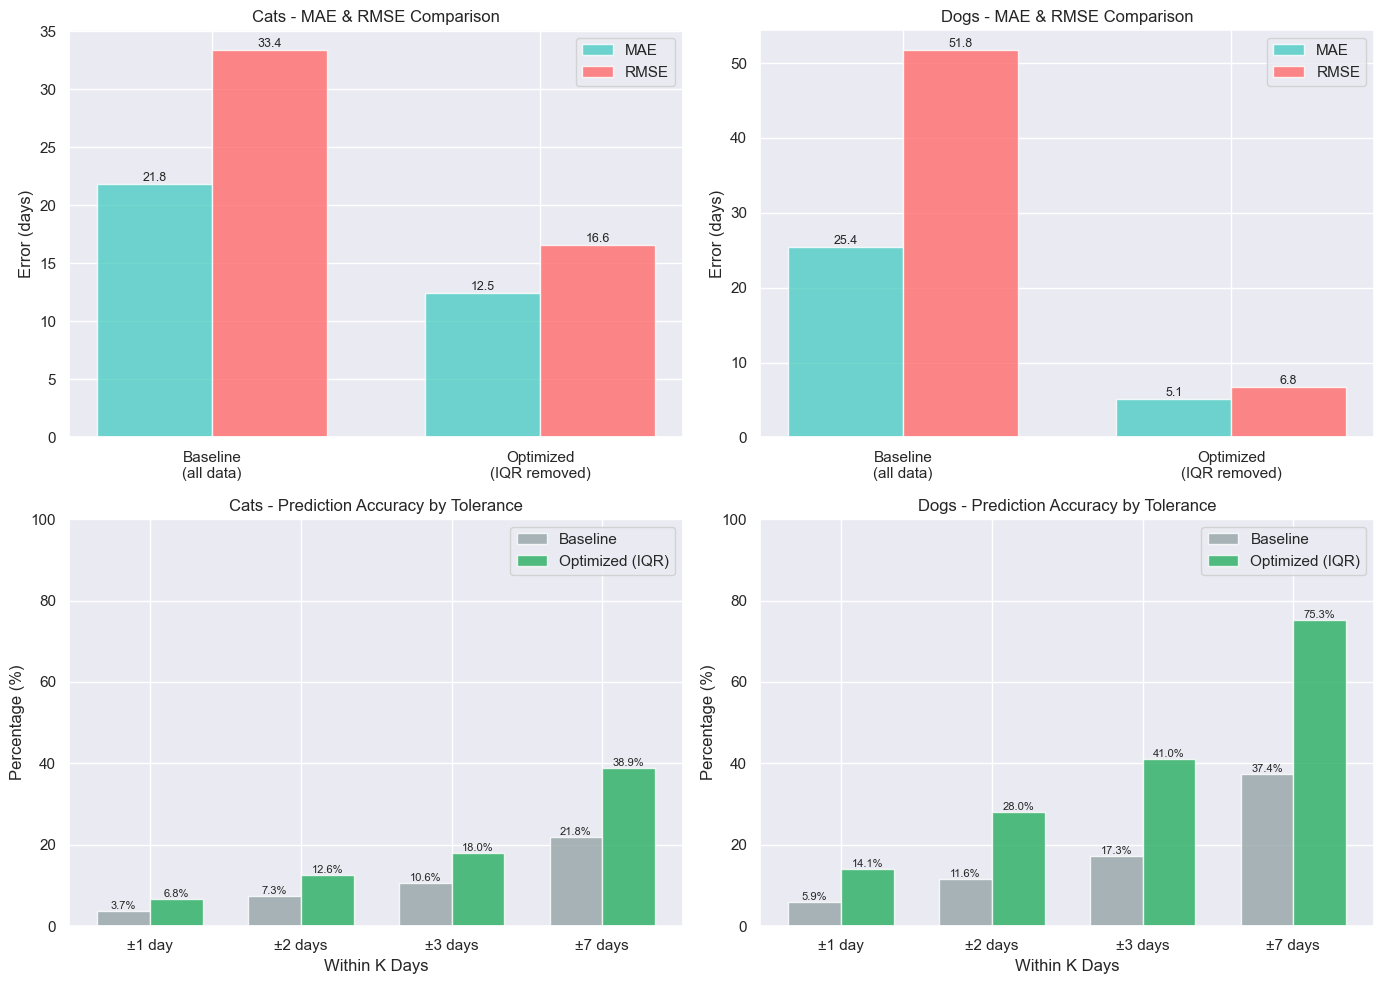


SUMMARY

The IQR outlier removal significantly improves all metrics:
- Lower RMSE and MAE
- Higher percentage of predictions within k days of actual

Note: The optimized model only predicts for ~85-88% of animals (those within 
the IQR bounds). Long-term shelter residents are excluded from these predictions.



In [75]:
# ==== FINAL COMPARISON WITH PERCENT WITHIN K DAYS ====

import matplotlib.pyplot as plt
import numpy as np

def percent_within_k_days(y_true, y_pred, k):
    """Calculate percentage of predictions within k days of actual."""
    errors = np.abs(y_true - y_pred)
    within_k = np.sum(errors <= k)
    return (within_k / len(y_true)) * 100

def calculate_all_metrics(y_true, y_pred):
    """Calculate MAE, RMSE, and percent within k days."""
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    
    within_1 = percent_within_k_days(y_true, y_pred, 1)
    within_2 = percent_within_k_days(y_true, y_pred, 2)
    within_3 = percent_within_k_days(y_true, y_pred, 3)
    within_7 = percent_within_k_days(y_true, y_pred, 7)
    
    return {
        "mae": mae,
        "rmse": rmse,
        "within_1_day": within_1,
        "within_2_days": within_2,
        "within_3_days": within_3,
        "within_7_days": within_7,
    }

print("="*80)
print("FINAL MODEL COMPARISON")
print("="*80)

# Calculate all metrics for each model
results = {
    "Cats": {
        "Baseline NN (all data)": calculate_all_metrics(
            cat_baseline["y_test"], cat_baseline["y_pred_test"]
        ),
        "Optimized NN (IQR removed)": calculate_all_metrics(
            cat_optimized["y_test"], cat_optimized["y_pred_test"]
        ),
    },
    "Dogs": {
        "Baseline NN (all data)": calculate_all_metrics(
            dog_baseline["y_test"], dog_baseline["y_pred_test"]
        ),
        "Optimized NN (IQR removed)": calculate_all_metrics(
            dog_optimized["y_test"], dog_optimized["y_pred_test"]
        ),
    }
}

# Print detailed results
for species, models in results.items():
    print(f"\n{'='*80}")
    print(f"  {species.upper()}")
    print(f"{'='*80}")
    
    # Header
    print(f"\n{'Model':<30} {'MAE':<10} {'RMSE':<10} {'±1 day':<10} {'±2 days':<10} {'±3 days':<10} {'±7 days':<10}")
    print("-"*90)
    
    for model_name, metrics in models.items():
        print(f"{model_name:<30} "
              f"{metrics['mae']:<10.2f} "
              f"{metrics['rmse']:<10.2f} "
              f"{metrics['within_1_day']:<10.1f}% "
              f"{metrics['within_2_days']:<10.1f}% "
              f"{metrics['within_3_days']:<10.1f}% "
              f"{metrics['within_7_days']:<10.1f}%")

# Print improvement summary
print("\n" + "="*80)
print("IMPROVEMENT FROM IQR OUTLIER REMOVAL")
print("="*80)

for species in ["Cats", "Dogs"]:
    baseline = results[species]["Baseline NN (all data)"]
    optimized = results[species]["Optimized NN (IQR removed)"]
    
    print(f"\n{species}:")
    print(f"  RMSE: {baseline['rmse']:.2f} → {optimized['rmse']:.2f} days "
          f"({baseline['rmse'] - optimized['rmse']:.1f} days improvement)")
    print(f"  Within 1 day:  {baseline['within_1_day']:.1f}% → {optimized['within_1_day']:.1f}%")
    print(f"  Within 3 days: {baseline['within_3_days']:.1f}% → {optimized['within_3_days']:.1f}%")
    print(f"  Within 7 days: {baseline['within_7_days']:.1f}% → {optimized['within_7_days']:.1f}%")

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Top row: MAE/RMSE comparison
for idx, species in enumerate(["Cats", "Dogs"]):
    ax = axes[0, idx]
    models_list = list(results[species].keys())
    mae_vals = [results[species][m]["mae"] for m in models_list]
    rmse_vals = [results[species][m]["rmse"] for m in models_list]
    
    x = np.arange(len(models_list))
    width = 0.35
    
    bars1 = ax.bar(x - width/2, mae_vals, width, label='MAE', color='#4ecdc4', alpha=0.8)
    bars2 = ax.bar(x + width/2, rmse_vals, width, label='RMSE', color='#ff6b6b', alpha=0.8)
    
    ax.set_ylabel('Error (days)')
    ax.set_title(f'{species} - MAE & RMSE Comparison')
    ax.set_xticks(x)
    ax.set_xticklabels(['Baseline\n(all data)', 'Optimized\n(IQR removed)'])
    ax.legend()
    ax.bar_label(bars1, fmt='%.1f', fontsize=9)
    ax.bar_label(bars2, fmt='%.1f', fontsize=9)

# Bottom row: Percent within k days
k_values = [1, 2, 3, 7]
for idx, species in enumerate(["Cats", "Dogs"]):
    ax = axes[1, idx]
    
    baseline_pcts = [results[species]["Baseline NN (all data)"][f"within_{k}_day{'s' if k > 1 else ''}"] for k in k_values]
    optimized_pcts = [results[species]["Optimized NN (IQR removed)"][f"within_{k}_day{'s' if k > 1 else ''}"] for k in k_values]
    
    x = np.arange(len(k_values))
    width = 0.35
    
    bars1 = ax.bar(x - width/2, baseline_pcts, width, label='Baseline', color='#95a5a6', alpha=0.8)
    bars2 = ax.bar(x + width/2, optimized_pcts, width, label='Optimized (IQR)', color='#27ae60', alpha=0.8)
    
    ax.set_ylabel('Percentage (%)')
    ax.set_xlabel('Within K Days')
    ax.set_title(f'{species} - Prediction Accuracy by Tolerance')
    ax.set_xticks(x)
    ax.set_xticklabels(['±1 day', '±2 days', '±3 days', '±7 days'])
    ax.legend()
    ax.set_ylim(0, 100)
    ax.bar_label(bars1, fmt='%.1f%%', fontsize=8)
    ax.bar_label(bars2, fmt='%.1f%%', fontsize=8)

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("SUMMARY")
print("="*80)
print("""
The IQR outlier removal significantly improves all metrics:
- Lower RMSE and MAE
- Higher percentage of predictions within k days of actual

Note: The optimized model only predicts for ~85-88% of animals (those within 
the IQR bounds). Long-term shelter residents are excluded from these predictions.
""")
